# Прогноз оттока пользователей кредитных карт
Данные были взяты с сайта https://leaps.analyttica.com/home. 

## Постановка задачи

Вы работаете в банке Thera в отделе аналитики данных. Ваш банк столкнулся с проблемой уменьшения количества клиентов, которые пользуются кредитными картами. Кредитные карты приносят банку доход за счет разных видов комиссий, которые банк взимает с клиентов за различные операции и услуги. Некоторые комиссии фиксированные, а некоторые зависят от ситуации.

Вы хотите помочь банку удержать своих клиентов и предотвратить их уход к конкурентам. Для этого вам нужно создать модель машинного обучения, которая будет классифицировать клиентов на тех, кто склонен отказаться от кредитной карты, и тех, кто останется верен банку. Также вам нужно выявить факторы, которые влияют на решение клиентов об отказе от кредитной карты, чтобы банк мог улучшить свое обслуживание.

**Ваша задача – подобрать наиболее подходящую модель, которая даст достаточно высокое качество предсказаний**



## Описание данных
* **CLIENTNUM**: Номер клиента. Уникальный идентификатор клиента, владеющего учетной записью 
* **Attrition_Flag**: переменная внутреннего события (активность клиента) - если учетная запись закрыта, то "Attrited Customer", иначе "Existing Customer". 
* **Customer_Age**: Возраст клиента в годах
* **Gender**: Пол владельца учетной записи
* **Dependent_count**: количество членов семьи клиента 
* **Education_Level**: Уровень образования владельца учетной записи - Graduate, High School, Uneducated, Post-Graduate, College, Doctorate
* **Marital_Status**: Семейное положение владельца учетной записи - Divorced, Single, Married
* **Income_Category**: Категория годового дохода владельца счета
* **Card_Category**: Тип карты
* **Months_on_book**: Период взаимоотношений с банком (в месяцах)
* **Total_Relationship_Count**: общее количество продуктов банка, которыми пользуется клиент
* **Months_Inactive_12_mon**: количество месяцев, неактивных за последние 12 месяцев
* **Contacts_Count_12_mon**: Количество обращений к банку за последние 12 месяцев
* **Credit_Limit**: Кредитный лимит на кредитной карте
* **Total_Revolving_Bal**: Общий возобновляемый баланс по кредитной карте
* **Avg_Open_To_Buy**: Средняя сумма доступных средств для покупок за последние 12 месяцев
* **Total_Amt_Chng_Q4_Q1**: Отношение суммы покупок (сравнение 4 и 1 кварталов) 
* **Total_Trans_Amt**: Общая сумма транзакций за последние 12 месяцев
* **Total_Trans_Ct**: Количество всех покупок за последние 12 месяцев
* **Total_Ct_Chng_Q4_Q1**: Отношение количества транзакций (Q4 по сравнению с Q1)
* **Avg_Utilization_Ratio**: Средний коэффициент использования кредитной карты

### Импорт библиотек

In [1]:
# Библиотеки, помогающие читать данные и манипулировать ими
import pandas as pd
import numpy as np
from scipy.stats import randint
from collections import Counter


#  Библиотеки, помогающие с визуализацией данных
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scikitplot as skplt
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA 
from yellowbrick.target import ClassBalance
from optuna.visualization import (
    plot_contour, 
    plot_edf, 
    plot_intermediate_values,
    plot_optimization_history,
    plot_parallel_coordinate,
    plot_param_importances,
    plot_slice,
    plot_timeline,
    plot_terminator_improvement
)

# Интерактивная визуализация
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display, Image
from ipywidgets import (
    interactive,
    IntSlider,
    FloatSlider,
    interact
)

from sklearn.utils import resample
from typing import Tuple, List

import shap
import ipywidgets
from subprocess import call
import matplotlib.image as mpimg

# Снимает ограничение на количество отображаемых столбцов
pd.set_option("display.max_columns", None)
# Устанавливает ограничение на количество отображаемых строк
pd.set_option("display.max_rows", 200)
# установка точности чисел с плавающей запятой до 5 десятичных знаков
pd.set_option("display.float_format", lambda x: "%.4f" % x)

# Для проверки на нормальность
from scipy.stats import shapiro
from statsmodels.multivariate.factor import Factor

# Для настройки модели, получения различных показателей и разделения данных
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    auc,
    roc_curve,
    classification_report,
    precision_recall_curve,
    silhouette_score,
    mean_squared_error,
    brier_score_loss
)


# Библиотеки для подбора гиперпараметров модели
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV, 
    RandomizedSearchCV
)

# Будет использоваться для масштабирования данных и кодирования категориальных признаков
from sklearn.preprocessing import ( 
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder, 
    LabelEncoder,
    OrdinalEncoder
)

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.base import ClassifierMixin
from sklearn.inspection import permutation_importance


# Для заолнения недостающих значений
from sklearn.impute import (
    SimpleImputer,
    KNNImputer,
    MissingIndicator
)

# Для построения моделей
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Ансамблевые методы
from catboost import (
    CatBoostClassifier,
    Pool,
    metrics,
    cv,
    MetricVisualizer
)

import optuna
from optuna.samplers import TPESampler

# Для подавления предупреждений
import warnings
warnings.filterwarnings("ignore")

# при выполнении ячейки в Jupyter Notebook будут отображаться результаты всех выражений в ячейке
from IPython.core.interactiveshell import InteractiveShell
from typing import List, Union
InteractiveShell.ast_node_interactivity = "all"

# зададим семя 42
rand = np.random.seed(42)

### Загрузка данных

In [2]:
churn = pd.read_csv("C:/Users/fourz/Downloads/BankChurners.csv")

In [3]:
# Посмотрим размерность наших данных
churn.shape

(10127, 21)

* Набор данных содержит 10127 строк и 21 столбец

In [4]:
# создадим копию данных
data = churn.copy()

In [5]:
# посмотрим первые 5 строк данных
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3    12691.0000                  777       11914.0000   
1                      2     8256.0000                  864        7392.0000   
2                      0     3418.0000                    0        3418.0000   
3                      1     3313.0000                 2517         796.0000   
4                      0     4716.0000                    0        4716.0000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                1.3350             1144              42               1.6250   
1                1.5410             1291              33               3.7140   
2                2.5940             1887              20               2.3330   
3                1.4050             1171              20               2.3330   
4                2.1750              816              28               2.5000   

   Avg_Utilization_Ratio  
0                 0.0610  
1                 0.1050  
2                 0.0000  
3                 0.7600  
4                 0.0000

In [6]:
# посмотрим последние 5 строк данных
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3     4003.0000                 1851   
10123                      3     4277.0000                 2186   
10124                      4     5409.0000                    0   
10125                      3     5281.0000                    0   
10126                      4    10388.0000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122        2152.0000                0.7030            15476             117   
10123        2091.0000                0.8040             8764              69   
10124        5409.0000                0.8190            10291              60   
10125        5281.0000                0.5350             8395              62   
10126        8427.0000                0.7030            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122               0.8570                 0.4620  
10123               0.6830                 0.5110  
10124               0.8180                 0.0000  
10125               0.7220                 0.0000  
10126               0.6490                 0.1890

In [7]:
# проверим типы данных столбцов в наборе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* В столбце Education_Level и Marital_Status присутствуют нулевые значения
* В данных присутствует 6 колонок с объектным типом данных

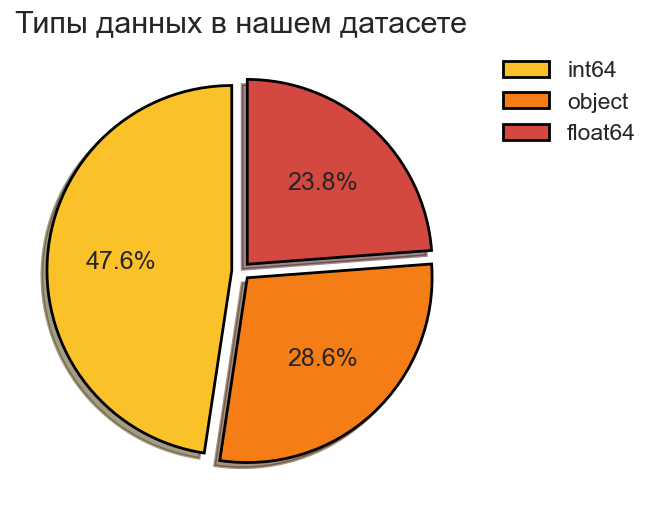

In [8]:
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.5, palette="inferno_r") 

data_types = data.dtypes.value_counts()

data_types.plot.pie(
    explode=[0.05, 0.05, 0.05],
    labels=None, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 2} 
)


plt.legend(
    labels=data_types.index,
    loc="upper right", 
    bbox_to_anchor=(1.4, 1), 
    frameon=False
)

plt.title('Типы данных в нашем датасете', fontsize=22)
plt.ylabel("")
plt.xlabel("")
plt.show();

In [9]:
# проверим, нет ли повторяющихся значений в данных
data.duplicated().sum()

0

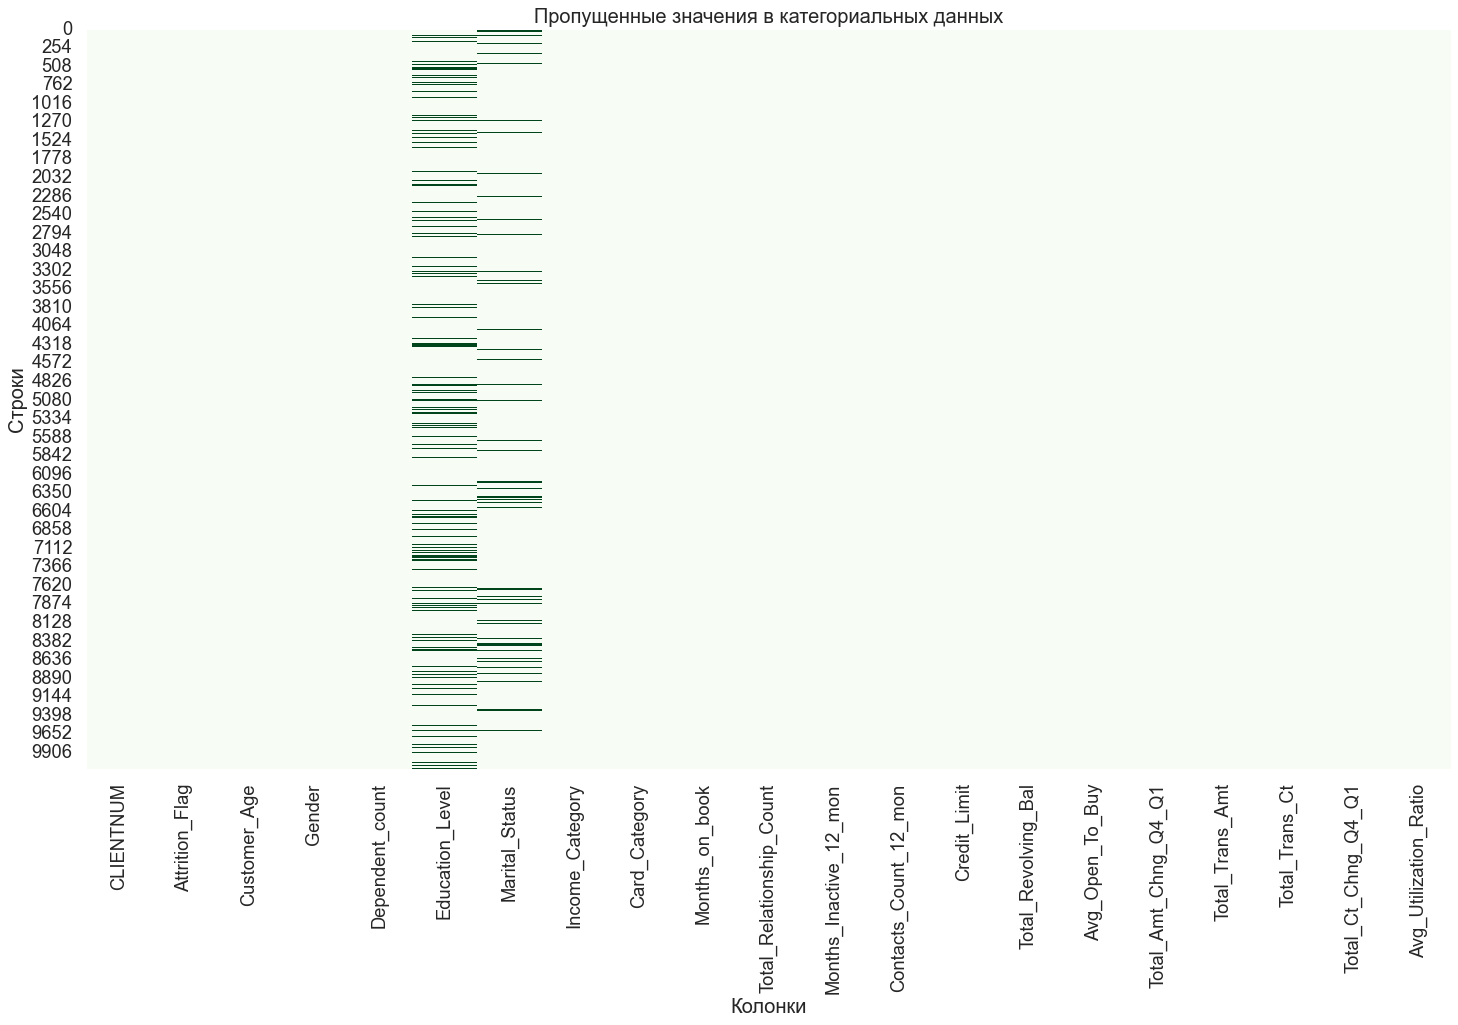

In [10]:
# проверим процент нулевых значений в данных
fig, ax = plt.subplots(1, 1, figsize=(22, 12), dpi=80, facecolor='w', edgecolor='k')

sns.heatmap(
    data.isna(),
    cmap="Greens",
    cbar=False,
    annot=False
)
plt.title("Пропущенные значения в категориальных данных")
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show();


In [11]:
null_value_stats = data.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Education_Level    1519
Marital_Status      749
dtype: int64

- Education_Level имеет 15% отсутствующих значений
- В Marital_Status отсутствует 7% значений

In [12]:
# Посмотрим общую статистику по всем числовым данным
data_stats = data.describe().T
{'subset': ['max'], 'cmap': 'plasma'}

style_settings = {
    'mean_bar': {'subset': ['mean'], 'color': 'lightsalmon'},
    'std_bg': {'subset': ['std'], 'cmap': 'plasma'},
    'percentile_bg': {'subset': ['75%'], 'cmap': 'plasma'},
    'max_bg': {'subset': ['max'], 'cmap': 'plasma'}
}

style = data_stats.style

for setting in style_settings.values():
    if 'color' in setting:
        style = style.bar(**setting)
    else:
        style = style.background_gradient(**setting)

style

{'subset': ['max'], 'cmap': 'plasma'}

#### первые выводы по дискриптивному анализу

* **CLIENTNUM**: это уникальный идентификатор для клиентов и может быть удален, поскольку он не добавит никакой информации к нашему анализу.
* **Возраст клиента**: Средний возраст клиентов составляет 46 лет, возраст клиентов имеет широкий диапазон от 26 до 73 лет.
* **Dependent_count**: В среднем клиенты в данных имеют 2 членеов семьи и максимум 5.
* **Months_on_book**: Все клиенты банка,пользовались услугами банга по крайней мере, 1 год, а 50% клиентов - не менее 3 лет.
* **Total_Relationship_Count**: все клиенты используют по крайней мере один продукт банка, в то время как 75% клиентов используют не меннее 3 продуктов банка.
* **Months_Inactive_12_mon**: В среднем клиенты были неактивны в течение двух месяцев за последние 12 месяцев - это показывает, что клиенты банка активны в транзакциях или использовании карт. Было бы интересно посмотреть, приводит ли высокая неактивность к оттоку клиентов.
* **Contacts_Count_12_mon**: В среднем банк и клиенты взаимодействовали дважды за последние 12 месяцев.
* **Credit_Limit**: существует огромная разница между третьим квартилем и максимальным значением. Диапазон кредитного лимита очень широк - от 1438 до 34516, что может сказать нам о наличии выбросов в наших данных
* **Total_Revolving_Bal**: Средний возобновляемый баланс клиентов составляет 1162, разница в третьем квартиле и максимальном значении невелика.
* **Avg_Open_To_Buy**: средняя сумма, которая остается неиспользованной клиентами, составляет 7469, диапазон для этой переменной очень широк, и экстремальные значения (min и max) могут быть отклонениями.
* **Total_Amt_Chng_Q4_Q1**: Для 75% клиентов сумма транзакции в 4 квартале была меньше суммы транзакции в 1 квартале (поскольку значение равно ~0,9).
* **Total_Trans_Amt**: Средняя сумма транзакции за последние 12 месяцев составляет 4404, некоторые клиенты потратили всего 510, в то время как некоторые клиенты совершили транзакцию на сумму более 18 тыс.
* **Total_Trans_Ct**: в среднем клиенты совершили 64 транзакции или меньше, в то время как 75% клиентов совершили 81 транзакцию.
* **Total_Ct_Chng_Q4_Q1**: Для 75% клиентов количество транзакций в 4 квартале было меньше, чем транзакций, совершенных в 1 квартале.
* **Avg_Utilization_Ratio**: В среднем клиенты использовали 27% от доступной суммы кредита на своей карте, при этом 75% клиентов использовали 50% или менее от доступной суммы кредита.

In [13]:
cm = sns.light_palette("green", as_cmap=True)
data.describe(include='object').T.style.bar(subset=['freq', 'count'], color='lightsalmon')

In [14]:
for i in data.describe(include= 'object').columns:
    print(f'Уникальные значения {i}:')
    print(data[i].value_counts())
    print('**' * 25)

Уникальные значения Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Уникальные значения Gender:
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Уникальные значения Education_Level:
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Уникальные значения Marital_Status:
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Уникальные значения Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************
Уникальны

#### вывод по категориальным переменным
- Большенство клиентов банка это женщины
- Большенсвто клиентов это выпускники вуза
- Большенство клиентов состоят в браке
- Большенство клиентов имеют доход ниже 40 тысяч в год

- **abc** в Income_Category скорее всего является пропущеными значениями, либо конфидециальной информмацией пользователя

## предобработка данных

In [15]:
# для упрощения название всех колонок поставлю в нижний регистр 
# Удалю индентификатор клиента, ибо в дальнейшем он нам не понадобится
data.rename(columns= lambda col_: col_.lower(), inplace=True)
data.drop(['clientnum'], axis=1, inplace=True)

In [16]:
# бинаризируем для анализа переменные 'attrition_flag' и 'gender'
data['attrition_flag'] = data['attrition_flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})
data['gender'] = data['gender'].replace({'F': 1, "M": 0})

In [17]:
data.sample(8)

attrition_flag  customer_age  gender  dependent_count education_level  \
3781               0            48       1                3      Uneducated   
2922               0            59       0                1      Uneducated   
5070               0            37       1                2        Graduate   
7246               0            47       0                3       Doctorate   
623                0            42       0                3             NaN   
3931               0            65       0                1        Graduate   
4767               0            52       1                3             NaN   
7094               0            58       1                2     High School   

     marital_status income_category card_category  months_on_book  \
3781         Single  Less than $40K          Blue              39   
2922         Single  Less than $40K          Blue              53   
5070       Divorced  Less than $40K          Blue              36   
7246       Divorced     $40K - $60K          Blue              36   
623          Single    $80K - $120K          Blue              33   
3931         Single  Less than $40K          Blue              56   
4767         Single             abc          Blue              36   
7094       Divorced             abc          Gold              36   

      total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
3781                         4                       3                      4   
2922                         5                       5                      4   
5070                         4                       3                      3   
7246                         4                       2                      3   
623                          3                       3                      2   
3931                         5                       3                      2   
4767                         3                       1                      2   
7094                         5                       4                      3   

      credit_limit  total_revolving_bal  avg_open_to_buy  \
3781     2991.0000                 1508        1483.0000   
2922     2192.0000                 1569         623.0000   
5070     1734.0000                  987         747.0000   
7246     4786.0000                 1516        3270.0000   
623      3714.0000                 2170        1544.0000   
3931     7636.0000                    0        7636.0000   
4767    10273.0000                 1657        8616.0000   
7094    34516.0000                 1864       32652.0000   

      total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
3781                0.7030             3734              64   
2922                0.7060             4010              79   
5070                0.8790             4727              67   
7246                0.9400             4973              74   
623                 0.5240             1454              35   
3931                0.8010             3880              67   
4767                0.7100             3778              70   
7094                0.6640             3595              52   

      total_ct_chng_q4_q1  avg_utilization_ratio  
3781               0.8820                 0.5040  
2922               0.7170                 0.7160  
5070               0.9140                 0.5690  
7246               0.8500                 0.3170  
623                0.5220                 0.5840  
3931               0.8110                 0.0000  
4767               0.5910                 0.1610  
7094               0.7330                 0.0540

## EDA

## Одномерный анализ


In [18]:
# Создане числовых и категориальных столбцов
num_col = data.select_dtypes(include=['int', 'float']).columns
obj_col = data.select_dtypes(include='object')

In [19]:
def plot_box_hist(
    data: pd.Series,
    var: str,
    color:str,
    title: str,
    xlabel: str,
    label: str
) -> None:
    """
    Функция, которая строит графики boxplot и distplot для заданной переменной из данных.

    Args:
    ----
        data - датафрейм, содержащий данные для анализа.
        var - строка, название переменной, по которой нужно построить графики.
        color - строка, цвет графиков.
        title - строка, заголовок графиков.

    Returns:
    ------
        None, но отображает графики на экране.
    """

    FIG_SIZE = (16, 6.5)

    # Создаем фигуру с двумя осями
    fig, (ax_box, ax_hist) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (1, 2)},
        figsize=FIG_SIZE
    )

    # Строим boxplot для переменной var
    sns.boxplot(
        data[var],
        orient="horizontal",
        ax=ax_box,
        color=color
    )

    # Строим distplot для переменной var
    sns.distplot(
        data[var],
        ax=ax_hist,
        label=label,
        kde=True
    )

    # Добавляем линии для среднего и медианы
    ax_hist.axvline(data[var].mean(), color="red", linestyle="--", label=f'Средние {label}')
    ax_hist.axvline(data[var].median(), color="black", linestyle="dotted", label=f'Медианная {label}')

    ax_box.set_title(title, fontsize=20)
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=xlabel)
    plt.xlabel(label, fontsize=20)
    plt.tick_params(labelsize=15)

    sns.despine()
    ax_hist.legend(fontsize=15, loc='upper right')
    plt.show();
    
    return None



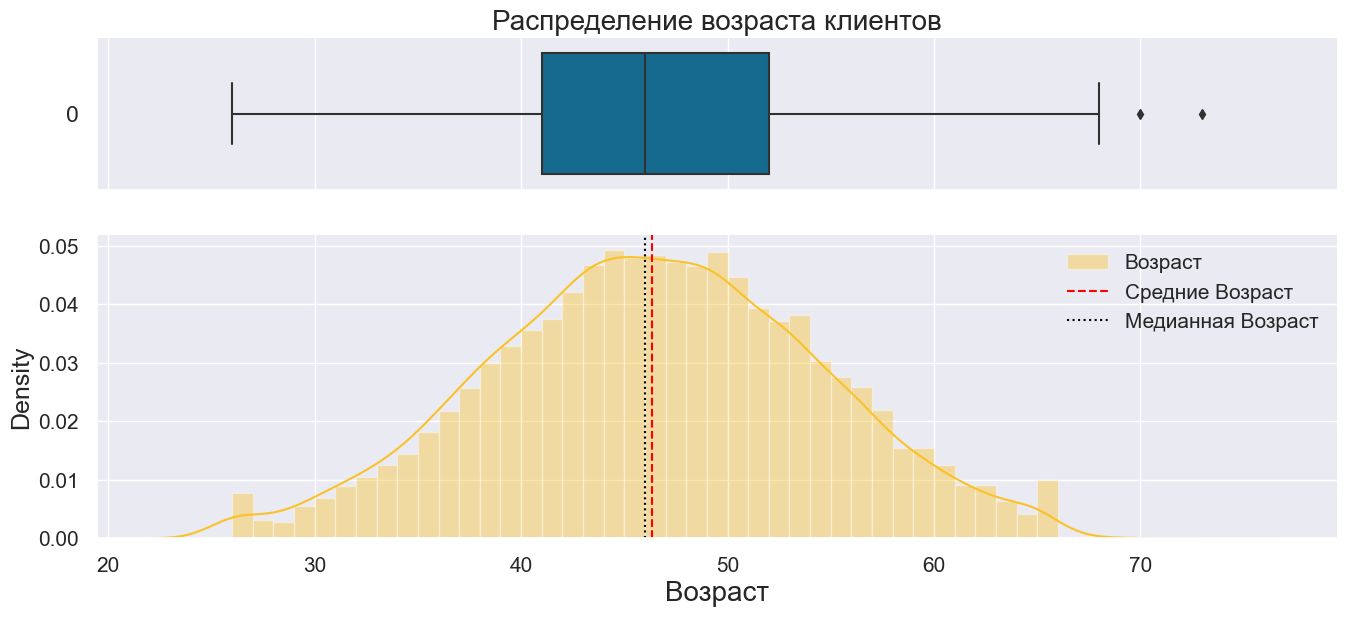

In [20]:
plot_box_hist(
    data=data,
    var="customer_age",
    color="b",
    title="Распределение возраста клиентов",
    xlabel='Возраст Клиента',
    label='Возраст'
)

#### Замечания по переменной "customer_age" 
- Большинство клиентов банка находятся в возрастном диапазоне от 40 до 50 лет. Это может означать, что банк предлагает кредитные карты, которые больше подходят для людей среднего и пожилого возраста, например, с низкими процентными ставками или высоким лимитом кредита.
- Средний возраст клиентов банка составляет около 46 лет. Это может означать, что банк имеет стабильную и лояльную клиентскую базу, которая пользуется кредитными картами длительное время.
- Есть небольшое количество клиентов, которые значительно моложе или старше среднего возраста. Это могут быть аномалии или особые случаи, которые требуют дополнительного изучения. Например, молодые клиенты могут быть студентами или начинающими предпринимателями, которым нужна кредитная карта для образования или бизнеса. Старшие клиенты могут быть пенсионерами или людьми с высоким доходом, которым нужна кредитная карта для путешествий или развлечений

### Рассмотрим переменную "months_on_book"

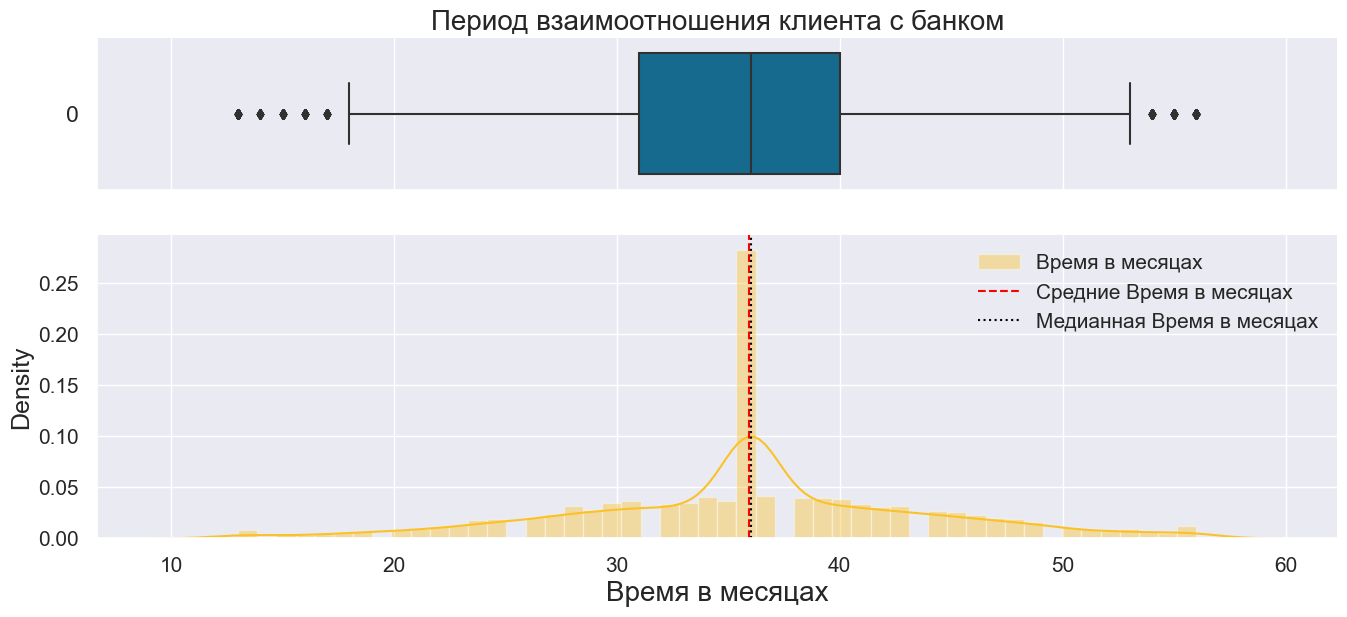

In [21]:
plot_box_hist(
    data=data,
    var="months_on_book",
    color="b",
    title="Период взаимоотношения клиента с банком",
    xlabel='Время',
    label='Время в месяцах'
)

#### Замечания по переменной months_on_book
- Наглядно видно на графике boxplot что присутствуют выбросы
- График boxplot показывает распределение периода взаимоотношений клиента с банком, то есть сколько времени клиент пользуется кредитной картой банка. По этому графику видно, что большинство клиентов имеют период взаимоотношений от 30 до 40 месяцев, то есть от 2.5 до 4 лет. Это может означать, что банк предлагает кредитные карты с хорошими условиями, которые удерживают клиентов на длительный срок.

### Рассмотрим переменную 'credit_limit'

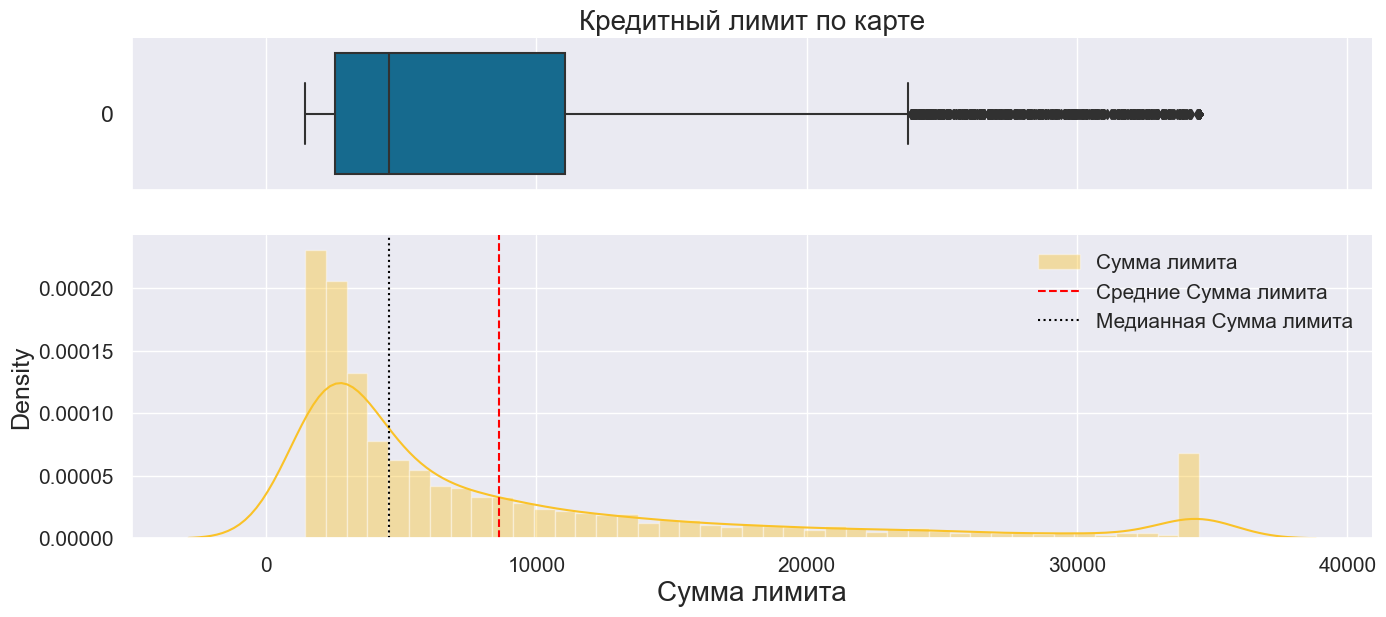

In [22]:
plot_box_hist(
    data=data,
    var="credit_limit",
    color="b",
    title="Кредитный лимит по карте",
    xlabel='Сумма',
    label='Сумма лимита'
)


#### Замечания по переменной credit_limit

* Распределение Credit_Limit имеет перекос вправо.
- Кредитный лимит по карте имеет широкий диапазон значений, от 0 до 20000. Это может означать, что банк предлагает кредитные карты для разных категорий клиентов, от тех, кто нуждается в небольшом кредите, до тех, кто может позволить себе большие расходы.
- Распределение кредитного лимита по карте имеет два пика, один около 5000 и другой около 35000. Это может означать, что банк имеет два основных сегмента клиентов, которые пользуются кредитными картами: те, кто имеют средний доход и те, кто имеют высокий доход. Между этими пиками есть промежуток, где плотность распределения низкая. Это может означать, что банк не предлагает кредитные карты для клиентов с низким доходом или для тех, кто находится на границе между средним и высоким доходом.
- Медианное значение кредитного лимита по карте примерно равно 5000. Это может означать, что половина клиентов банка имеют кредитный лимит ниже этого значения, а половина - выше. Медиана лучше характеризует типичный уровень кредита, который банк предоставляет своим клиентам, чем среднее значение.
* 50% клиентов банка имеют кредитный лимит менее < 10000.

### Рассмотрим переменную "total_revolving_bal"

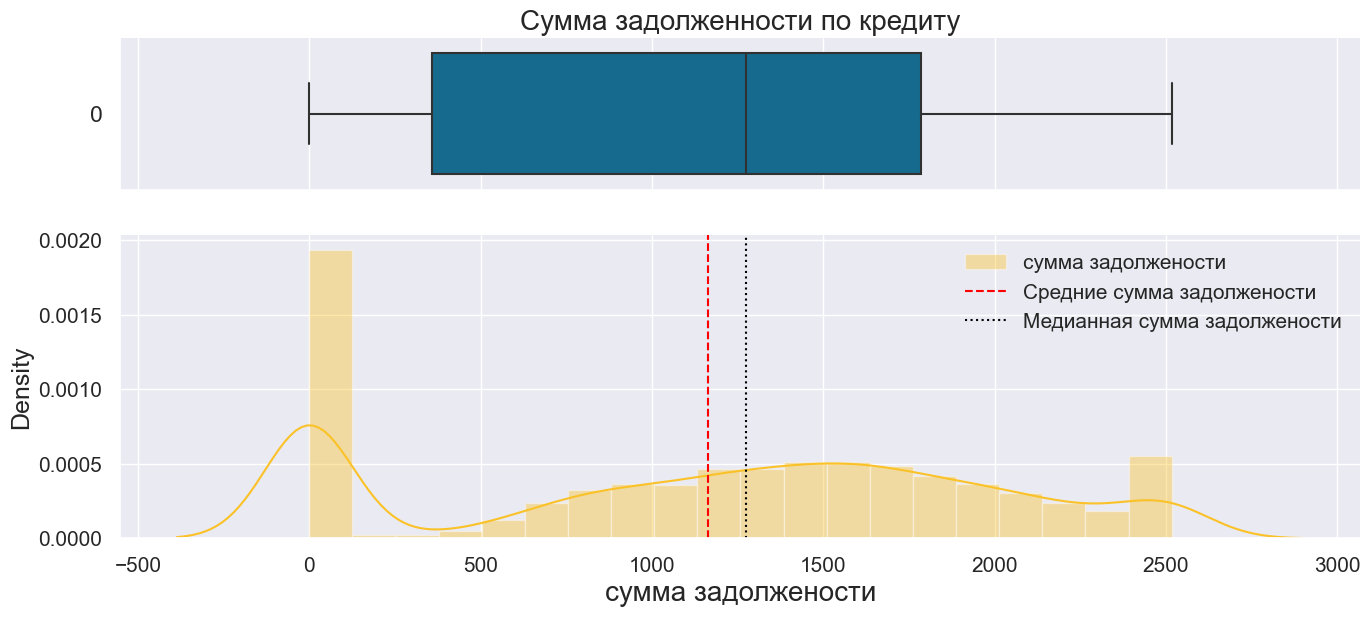

In [23]:
plot_box_hist(
    data=data,
    var="total_revolving_bal",
    color="b",
    title="Сумма задолженности по кредиту",
    xlabel='Сумма',
    label='сумма задолжености'
)


#### Замечания по переменной "total_revolving_bal"
- Большинство клиентов банка имеют небольшую или нулевую сумму задолженности по кредиту. Это может означать, что клиенты банка не используют весь свой кредитный лимит и имеют достаточно средств для своих нужд. Это также может означать, что клиенты банка ответственно пользуются кредитными картами и своевременно погашают свои долги.
- Есть некоторое количество клиентов банка, которые имеют большую сумму задолженности по кредиту. Это может означать, что эти клиенты имеют финансовые трудности или неэффективно управляют своими расходами. Это также может означать, что эти клиенты используют кредитные карты для больших покупок или инвестиций, которые требуют длительного погашения.
- Медианная сумма задолженности по кредиту составляет около 1200. Это может означать, что половина клиентов банка имеют сумму задолженности ниже этого значения, а половина - выше. Медиана лучше характеризует типичный уровень задолженности, который банк предоставляет своим клиентам, чем среднее значение.
- Средняя сумма задолженности по кредиту составляет около 1100. Это может означать, что банк старается удовлетворить потребности большинства своих клиентов и предлагает им разумный уровень кредита. Однако среднее значение не хорошо отражает распределение данных, так как оно сильно зависит от выбросов и асимметрии.

### Рассмотрим переменную avg_open_to_Buy


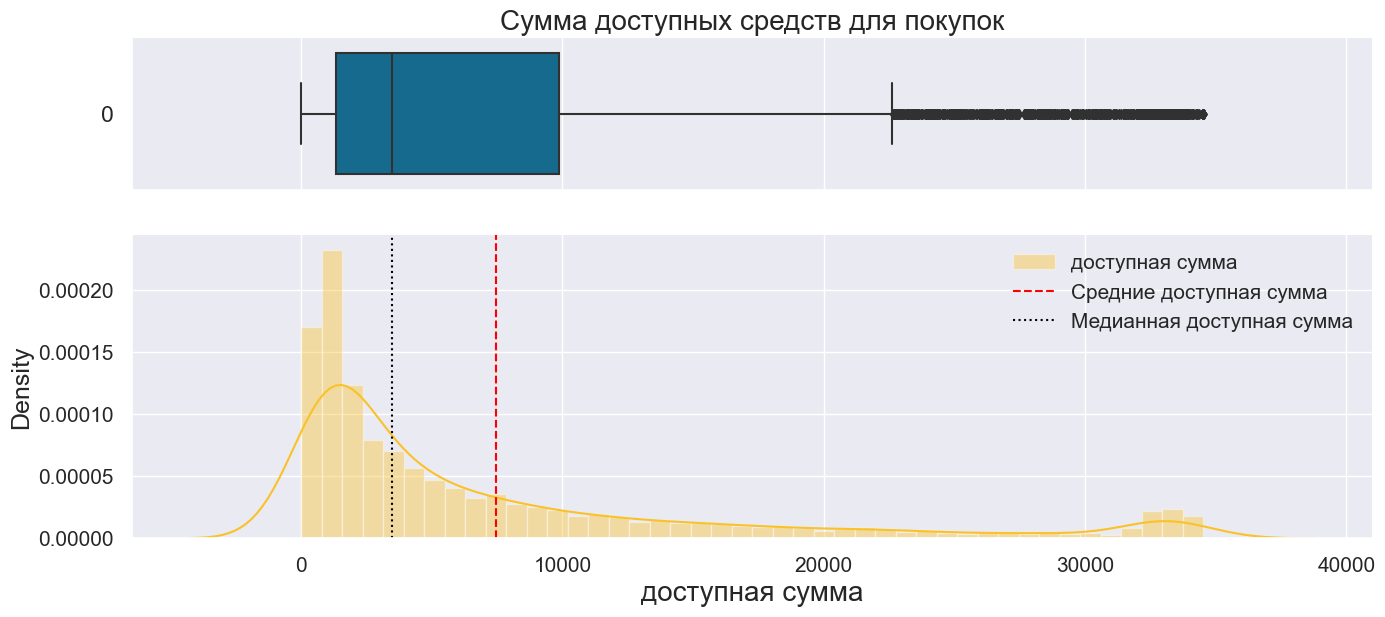

In [24]:
plot_box_hist(
    data=data,
    var="avg_open_to_buy",
    color="b",
    title="Cумма доступных средств для покупок",
    xlabel='Сумма',
    label='доступная сумма'
)


#### Замечания по переменной avg_open_to_buy
- Распредление имеет перекос вправо, это может указывать на то, что большинство клиентов использовали большую часть своего лимита, в то время как только у нескольких клиентов (в правой части списка) осталась большая часть суммы их лимита.
- так же данное распределение очень похоже на распределение переменной Credit_Limit, это может говорить нам о связи между этими величинами
- Большинство клиентов банка имеют небольшую или среднюю сумму доступных средств для покупок. Это может означать, что клиенты банка не используют весь свой кредитный лимит и имеют достаточно средств для своих нужд. Это также может означать, что клиенты банка ответственно пользуются кредитными картами и своевременно погашают свои долги.
- Есть некоторое количество клиентов банка, которые имеют большую сумму доступных средств для покупок. Это может означать, что эти клиенты имеют высокий доход или низкий уровень расходов. Это также может означать, что эти клиенты используют кредитные карты для больших покупок или инвестиций, которые требуют длительного погашения.
- Медианная сумма доступных средств для покупок составляет около 4000. Это может означать, что половина клиентов банка имеют сумму доступных средств ниже этого значения, а половина - выше. Медиана лучше характеризует типичный уровень доступных средств, который банк предоставляет своим клиентам, чем среднее значение.


###  Рассмотрим переменную total_ct_chng_q4_q1

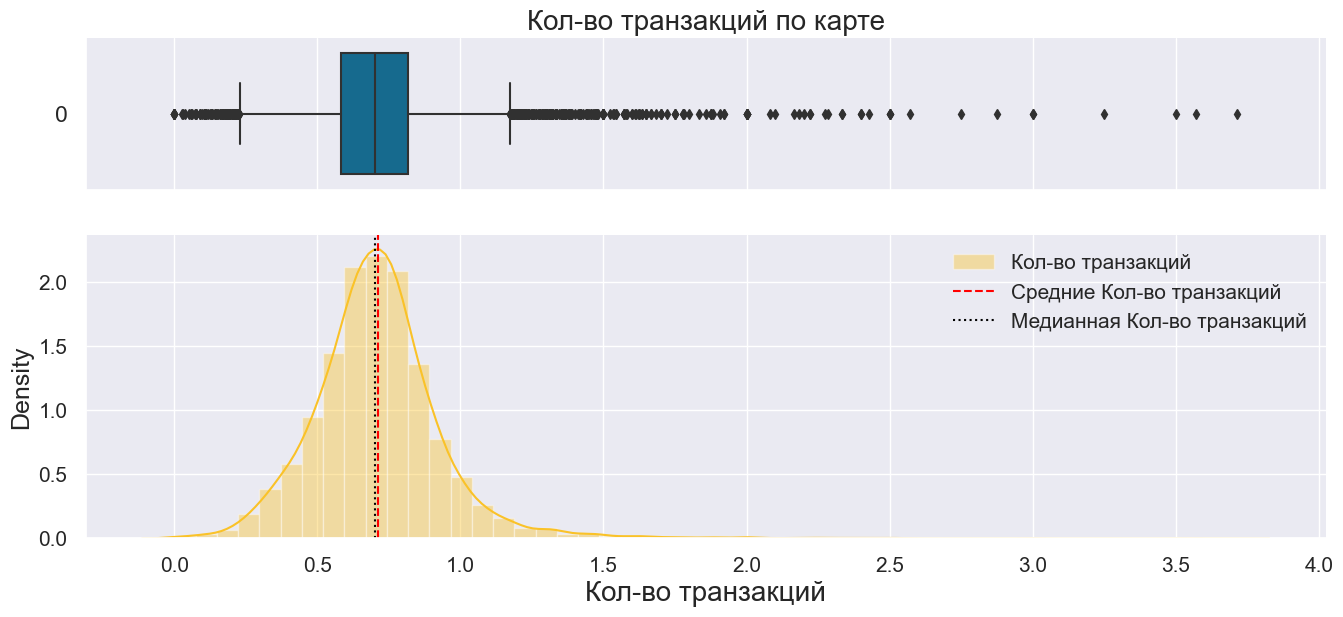

In [25]:
plot_box_hist(
    data=data,
    var="total_ct_chng_q4_q1",
    color="b",
    title="Кол-во транзакций по карте",
    xlabel='Кварталы',
    label='Кол-во транзакций'
)


#### Замечания по переменной total_ct_chng_q4_q1
- Распределение выглядит колокообразным, но имеются выбросы по обе стороны
- Основное кол-во транзакций совершенных по карте, были сделаны до конца первого квартала
- Большинство клиентов банка снизили  свои траты под конец года практически в 1.5 раза, ведь переменная total_ct_chng_q4_q1 порказывает отношение количества трат клиентов в 4 квартале по отношению к 1-у кварталу

### Рассмотрим переменную total_amt_chng_q4_q1

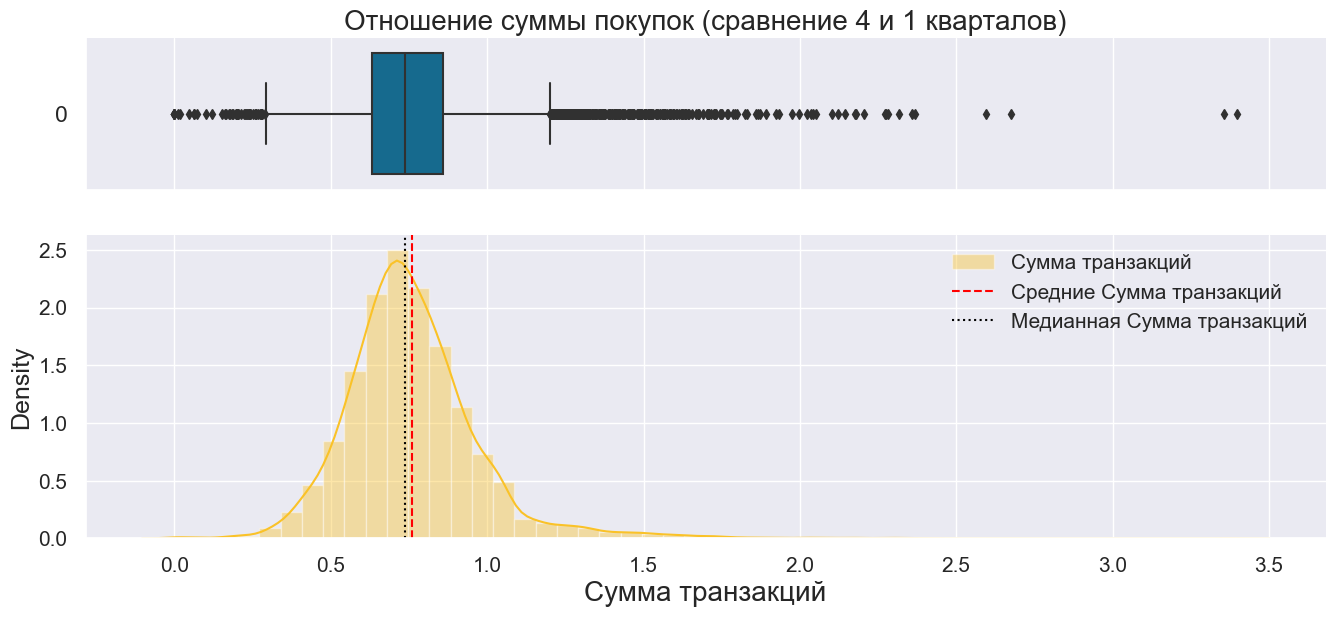

In [26]:
plot_box_hist(
    data=data,
    var="total_amt_chng_q4_q1",
    color="b",
    title="Отношение суммы покупок (сравнение 4 и 1 кварталов)",
    xlabel='Кварталы',
    label='Сумма транзакций'
)


#### Замечания по переменной total_amt_chng_q4_q1
- Распределение выглядит нормальным, но имеются выбросы по обе стороны
- На вид так же как и на предыдущем графике то есть к 4ому кварталу обычно траты снижаются в полтора раза

### Рассмотрим переменную total_trans_amt

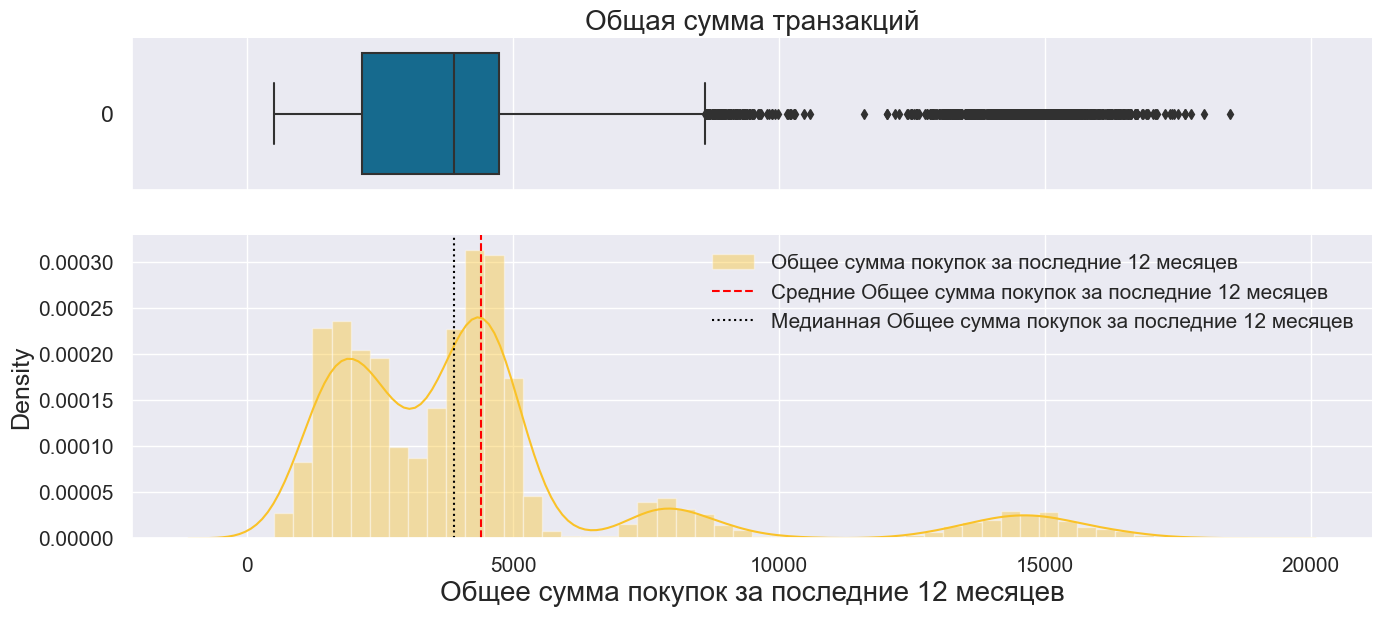

In [27]:
plot_box_hist(
    data=data,
    var="total_trans_amt",
    color="b",
    title="Общая сумма транзакций",
    xlabel='Cумма',
    label='Общее сумма покупок за последние 12 месяцев'
)

#### Замечания по переменной total_trans_amt
- Мы видим, что распределение годовых транзакций сильно варьируется. Это мультимодальное распределение, что означает, что мы можем создавать сегменты из наших данных.
- Исходя из графика можно предположить о 2 группах людей:
    - первая группа клиентов в среднем производит транзакции на ~2000 в год 
    - вторая группа клиентов в среднем производит транзакций на ~4500 в год 
- Из графика мы видим, что есть выбросы - клиенты с общей суммой транзакций более ~ 8000 будут рассматриваться рассматриваются как выбросы 


### Рассмотрим переменную total_trans_ct


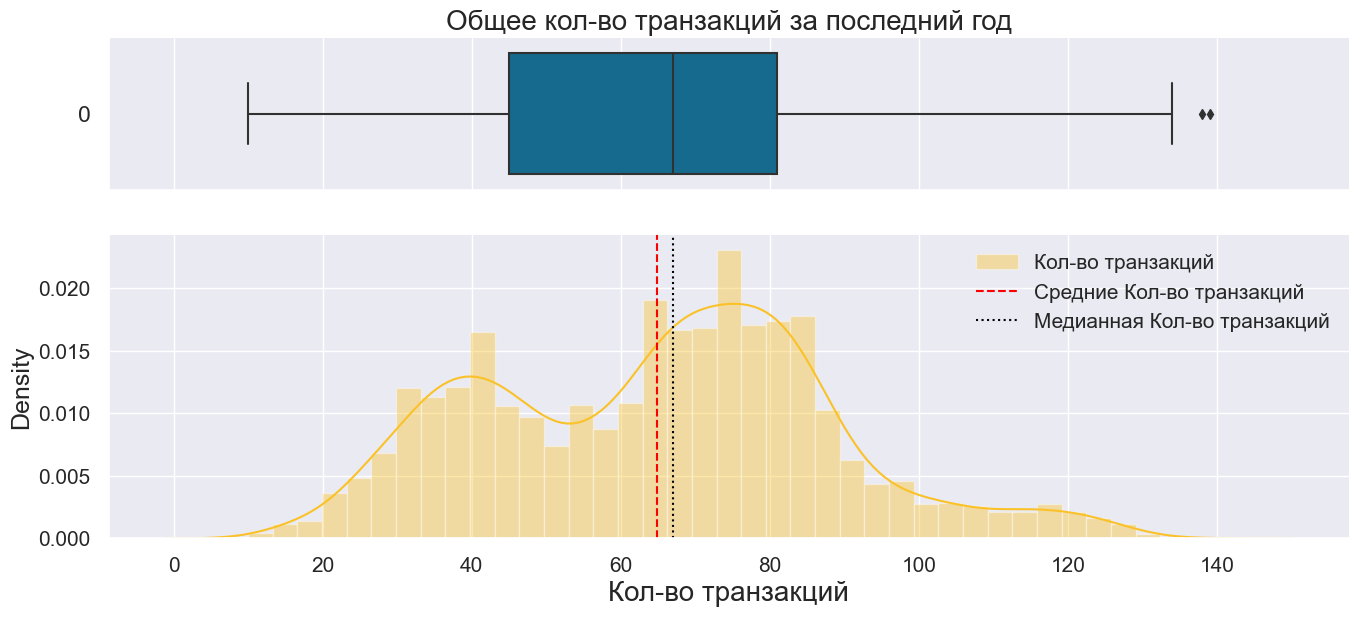

In [28]:
plot_box_hist(
    data=data,
    var="total_trans_ct",
    color="b",
    title="Общее кол-во транзакций за последний год",
    xlabel='Кол-во',
    label='Кол-во транзакций'
)


#### Замечания по переменной total_trans_ct
- Распределение Total_Trans_Ct бимодальное и имеет для максимума: 40 и 75 транзакций в год
- Можно попытаться найти причину бимодальности и проверить, можно ли разделить клиентов на 2 группы
- Медиана равна примерно 70 транзакциям в год, что может свидетельствовать о том, что в среднем клиенты банка используют свою кредитную карту чуть больше одного раза в неделю, скорее всего для основных покупок, таких как продукты питания и товары для дома. Поэтому у большинства клиентов затраты по кредитной карте за последний год не превысили 5000 долларов. То есть кредитная карта служит им в основном для повседневных расходов.

###  Рассмотрим переменную avg_utilization_ratio


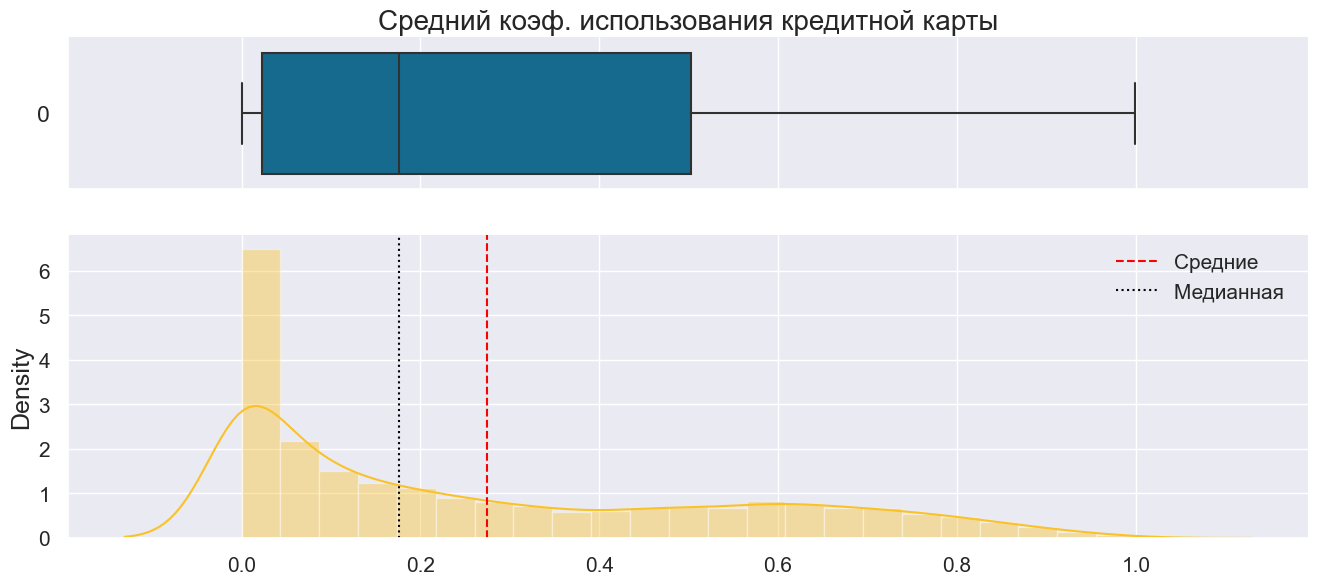

In [29]:
plot_box_hist(
    data=data,
    var="avg_utilization_ratio",
    color="b",
    title="Средний коэф. использования кредитной карты",
    xlabel='(avg_open_to_buy / credit_limit)',
    label=''
)


#### Замечания по переменной Avg_Utilization_Ratio
*Средний коэффициент использования кредитной карты - это отношение суммы долга по кредитной карте к кредитному лимиту. Это показывает, какой процент доступного кредита клиент использовал. Это влияет на кредитный рейтинг клиента, так как чем выше коэффициент, тем больше риск невозврата долга.*
- Распределение Avg_Utilization_Ratio смещено вправо.
- Такое распределение не является положительным знаком для банка, поскольку большинство клиентов не используют сумму своего кредита. Это также может означать, что клиенты банка ответственно пользуются кредитными картами и своевременно выплачивают свои долги. Это положительно сказывается на их кредитном рейтинге и финансовом состоянии.

**Credit_Limit, avg_open_to_buy, и avg_utilization_ratio смещены вправо**

1. avg_open_to_buy означает, сколько средств осталось у клиента
   * Низкие значения данной переменной могут означать следующее:
       * Клиенты имеют низкие кредитные лимиты
       * Клиенты тратят много, поэтому они менее открыты для покупок



2. avg_utilization_ratio = (avg_open_to_buy / Credit_Limit)
   * Низкие значения среднего коэффициента использования кредитной карты могут говорить о том:
        * что клиенты тратят меньше, используя свои кредитные карты
        * либо клиент вовсе не пользуется кредитной картой


3. Кредитный лимит также смещен вправо, что означает - большинство клиентов имеют низкие кредитные лимиты
    * Низкие значения данной переменной могут означать следующее:
        * Низкий или нестабильный доход заемщика
        * Плохая кредитная история
        * Первое обращение за кредиткой
---
Рассматривая 3 переменные, мы можем сделать вывод, что большинство клиентов имеют низкие кредитные лимиты и не часто используют свои кредитные карты

**Теперь это утверждение оправдывает правильную асимметрию для всех 3 переменных**

## Двумерный анализ

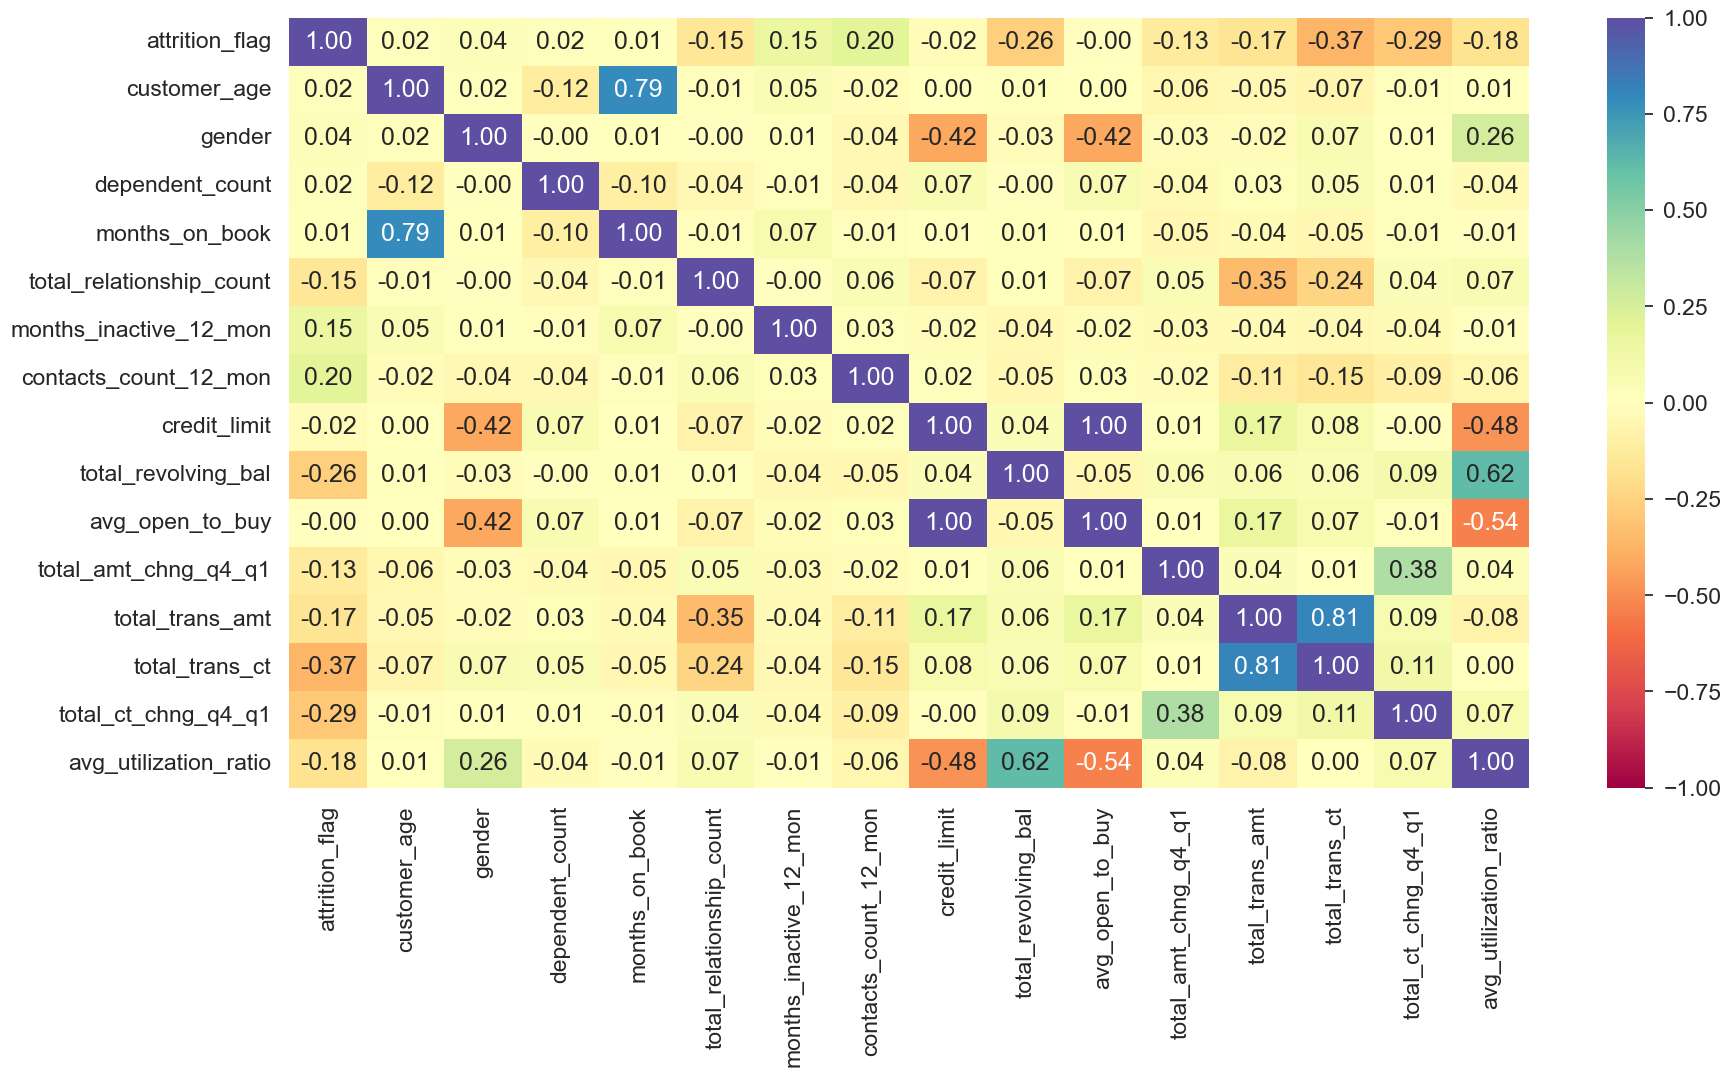

In [30]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();

**Используя шкалу Чеддока, можно сделать следующие выводы:**
* В приведенной выше матрице парных коэффициетов можно заметить сильную положительную корреляцию между "Months_on_book и Customer_Age", "Total_Trans_Amt и Total_Trans_Ct."
* Так же видно и умеренную отрицательную корреляцию между "Avg_Utilization_Ratio и Credit_Limit"

#### Выводы по корреляционному анализу
**1)** Высокая корреляция между переменными "Months_on_book и Customer_Age" говорить о том, что чем старше клиент, тем дольше он обслуживается в банке. Это может быть связано с разными факторами, например:

* Клиенты старшего возраста могут быть более консервативными и лояльными к одному банку, чем клиенты младшего возраста, которые могут чаще менять банки в поисках лучших условий или новых продуктов.
* Клиенты старшего возраста могут иметь больше финансовых потребностей и продуктов в одном банке, чем клиенты младшего возраста, которые могут иметь меньше доходов или активов. Это может увеличивать стоимость перехода к другому банку и снижать вероятность смены банка.
* Клиенты старшего возраста могут быть менее подвержены влиянию рекламы или конкуренции других банков, чем клиенты младшего возраста, которые могут быть более заинтересованы в новых технологиях или трендах.

**Давайте проверим значимость коэффициента корреляции для тех переменных, которые показали связь на тепловой карте**

In [31]:
def t_stats_corr(n: int, r: float) -> float:
    """
    Вычисляет t-статистику для проверки значимости коэффициента корреляции.

    Args:
    ----------
        n : int
            Размер выборки.
        r : float
            Коэффициент корреляции.

    Return:
    -------
        float
            Значение t-статистики.

    Raise:
    ------
        ValueError
            Если n меньше 3 или r не находится в диапазоне от -1 до 1.
    """
    
    # проверяем корректность входных параметров
    if n < 3:
        raise ValueError("n должно быть больше или равно 3")
    if r < -1 or r > 1:
        raise ValueError("r должно быть в диапазоне от -1 до 1")
    
    # вычисляем t-статистику по формуле
    t = (r * np.sqrt(n - 2)) / np.sqrt(1 - np.power(r, 2))

    return t


In [32]:
# Для начала проверим положительную корреляцию между переменными:
# "Months_on_book и Customer_Age", "Total_Trans_Amt и Total_Trans_Ct."

# получаем коэффициенты корреляции
r1 = data[['months_on_book', 'customer_age']].corr()['customer_age'][0]
r2 = data[['total_trans_amt', 'total_trans_ct']].corr()['total_trans_ct'][0]

# получаем t-статистики
t1 = t_stats_corr(n=data.shape[0], r=r1)
t2 = t_stats_corr(n=data.shape[0], r=r2)

# выводим результаты с форматированием
print(f"Значение t-статистики между Months_on_book и Customer_Age: {t1:.3f}")
print(f"Значение t-статистики между Total_Trans_Amt и Total_Trans_Ct: {t2:.3f}")


Значение t-статистики между Months_on_book и Customer_Age: 129.182
Значение t-статистики между Total_Trans_Amt и Total_Trans_Ct: 137.597


**По полученной статистике можно сделать следующие выводы:**

* Существует положительная линейная связь между Months_on_book и Customer_Age, то есть чем дольше клиент пользуется услугами банка, тем старше он в среднем.
* Существует положительная линейная связь между Total_Trans_Amt и Total_Trans_Ct, то есть чем больше транзакций совершает клиент, тем больше он тратит в сумме.
* Обе связи являются статистически значимыми, то есть не случайными, а обусловленными какими-то факторами. Для подтверждения этого можно сравнить значения t-статистик с критическими значениями при заданном уровне значимости (например, 0.05) и числе степеней свободы (n-2). Если модуль t-статистики больше критического значения, то нулевая гипотеза о равенстве нулю коэффициента корреляции отвергается в пользу альтернативной.

In [33]:
# Так же проверим корреялцию у следущих переменных:
#"Avg_Utilization_Ratio и Credit_Limit"

r1 = data[['avg_utilization_ratio', 'credit_limit']].corr()['credit_limit'][0]

# получаем t-статистики
t1 = t_stats_corr(n=data.shape[0], r=r1)

# выводим результаты с форматированием
print(f"Значение t-статистики между Avg_Utilization_Ratio и Credit_Limit: {t1:.3f}")


Значение t-статистики между Avg_Utilization_Ratio и Credit_Limit: -55.499


**По этой статистике можно сделать следующие выводы:**

* Существует отрицательная линейная связь между Avg_Utilization_Ratio и Credit_Limit, то есть чем больше кредитный лимит клиента, тем меньше он использует его в процентном соотношении.
* Связь между этими переменными является статистически значимой, то есть не случайной, а обусловленной какими-то факторами. Для подтверждения этого можно сравнить модуль t-статистики с критическим значением при заданном уровне значимости (например, 0.05) и числе степеней свободы (n-2). Если модуль t-статистики больше критического значения, то нулевая гипотеза о равенстве нулю коэффициента корреляции отвергается в пользу альтернативной. В данном случае, модуль t-статистики (-55.499) очень большой и сильно превышает любое критическое значение из таблицы Стьюдента, поэтому мы можем с уверенностью отвергнуть нулевую гипотезу и признать коэффициент корреляции значимым.

In [143]:
def plot_crosstab(
    data,
    var,
    target,
    color='coolwarm',
    stacked=False,
    figsize=(14, 7),
    rot=0,
    title=None,
    legend_loc="upper right"
) -> None:
    """
    Функция, которая строит таблицу сопряженности и столбчатый график для заданной переменной и целевой переменной.

    Args:
    -------
        data - датафрейм, содержащий данные для анализа.
        var - строка, название переменной, по которой нужно построить таблицу и график.
        target - строка, название целевой переменной.
        color - строка, название цветовой карты для таблицы.
        stacked - булево значение, указывающее, строить ли график с накоплением или без.
        figsize - кортеж из двух чисел, указывающий размер фигуры в дюймах.
        rot - число, указывающее угол поворота подписей категорий на оси x в градусах.
        title - строка, заголовок графика.
        legend_loc - строка, расположение легенды.

    Returns:
    -------
        None, но отображает таблицу и график на экране.
    """
    cm = sns.light_palette(color, as_cmap=True)
    
    # Строим таблицу сопряженности с нормализацией по строкам 
    crosstab = pd.crosstab(
        data[var],
        data[target],
        normalize=True
    )

    # Отображаем таблицу с градиентом цвета
    display(crosstab.style.bar(subset=[0, 1], cmap=cm))

    # Строим столбчатый график с разделением по целевой переменной
    ax = crosstab.plot(
        kind="bar",
        figsize=figsize,
        stacked=stacked,
        fontsize=10,
        rot=rot
    )

    plt.xlabel(f"{var}", fontsize=15)
    plt.ylabel(f"Доля {target}", fontsize=15)
    plt.grid(True)
    
    if title is not None:
        plt.title(title, fontsize=22)

    plt.legend(title=target, loc=legend_loc, fontsize=12)

    # Добавляем аннотации к столбцам
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.show();
    
    return None


### Рассмотрим 'marital_status' и 'attrition_flag'

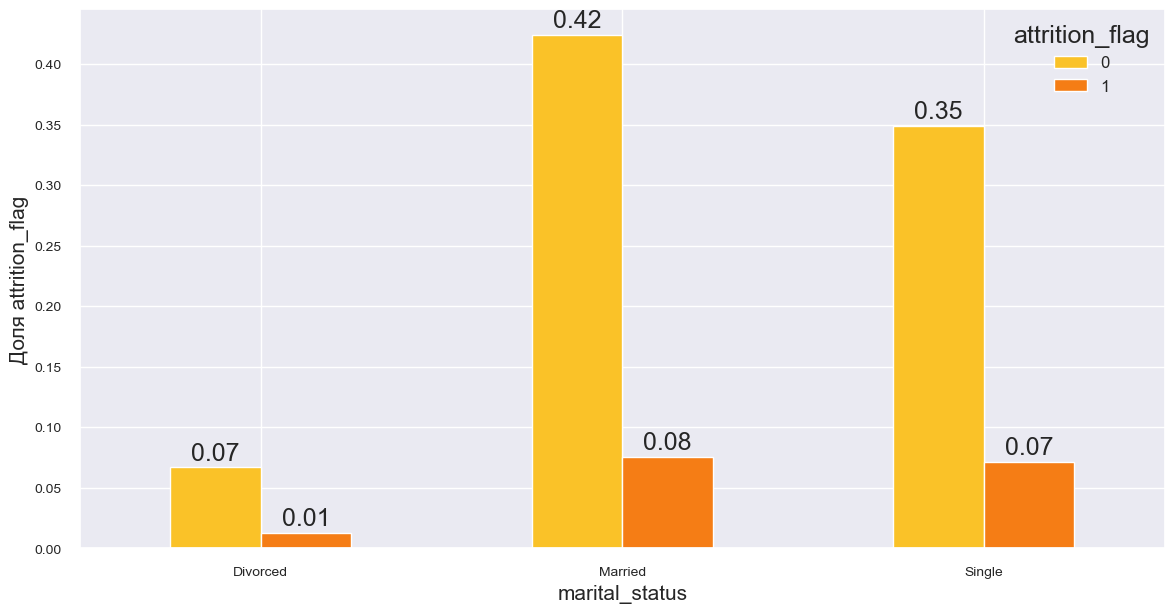

In [35]:
plot_crosstab(
    data=data,
    var="marital_status",
    target="attrition_flag",
    color="lightsalmon"
)

#### Выводы по семейному положению клиентов банка
* Больше всего прекращают сотрудничество с банком, женатые и еще не женатые клиенты
---
**Из графика можно сделать следующие выводы в контексте поставленной задачи:**

- Одинокие клиенты более склонны отказаться от кредитной карты, чем разведенные. Возможно, это связано с тем, что у одиноких клиентов меньше доходов, больше расходов или меньше стимулов для использования кредитной карты.
- Разведенные клиенты наиболее лояльны к банку и редко отказываются от кредитной карты. Возможно, это связано с тем, что у разведенных клиентов больше стабильности, опыта или доверия к банку.
- Женатые клиенты находятся в промежуточном положении между одинокими и разведенными. Они отказываются от кредитной карты чаще, чем разведенные, но реже, чем одинокие. Возможно, это связано с тем, что у женатых клиентов есть как преимущества, так и недостатки использования кредитной карты.


**На основании этих выводов можно предложить следующие рекомендации для банка:**

- Уделить больше внимания одиноким клиентам и предложить им более выгодные условия использования кредитной карты, например, снизить комиссии, повысить лимиты или предоставить дополнительные бонусы.
- Поддерживать связь с разведенными клиентами и поощрять их за их лояльность, например, предлагать им специальные акции, скидки или подарки.
- Исследовать потребности и предпочтения женатых клиентов и адаптировать свои услуги под их ожидания, например, учитывать семейный бюджет, планы или цели.

### Рассмотрим 'gender' и 'attrition_flag'

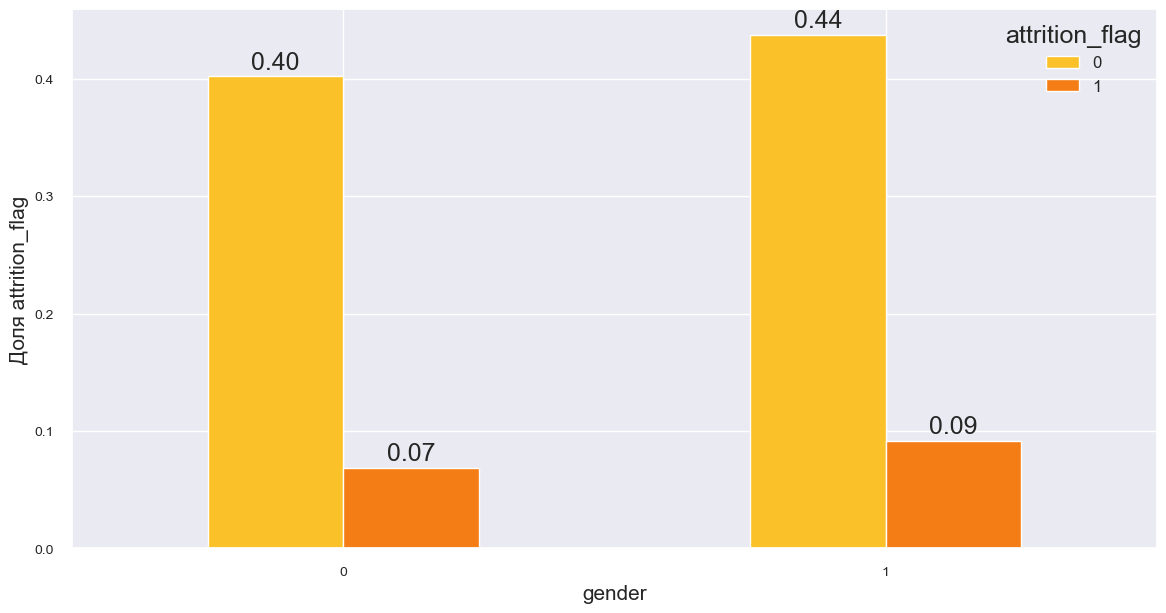

In [36]:
plot_crosstab(
    data=data,
    var="gender",
    target="attrition_flag",
    color="lightsalmon"
)

#### Выводы по полу клиентов банка
* Нет большой разницы между ушедшими клиентами из банка между мужчинами и женщинами

### Рассмотрим 'education_level' и 'attrition_flag'

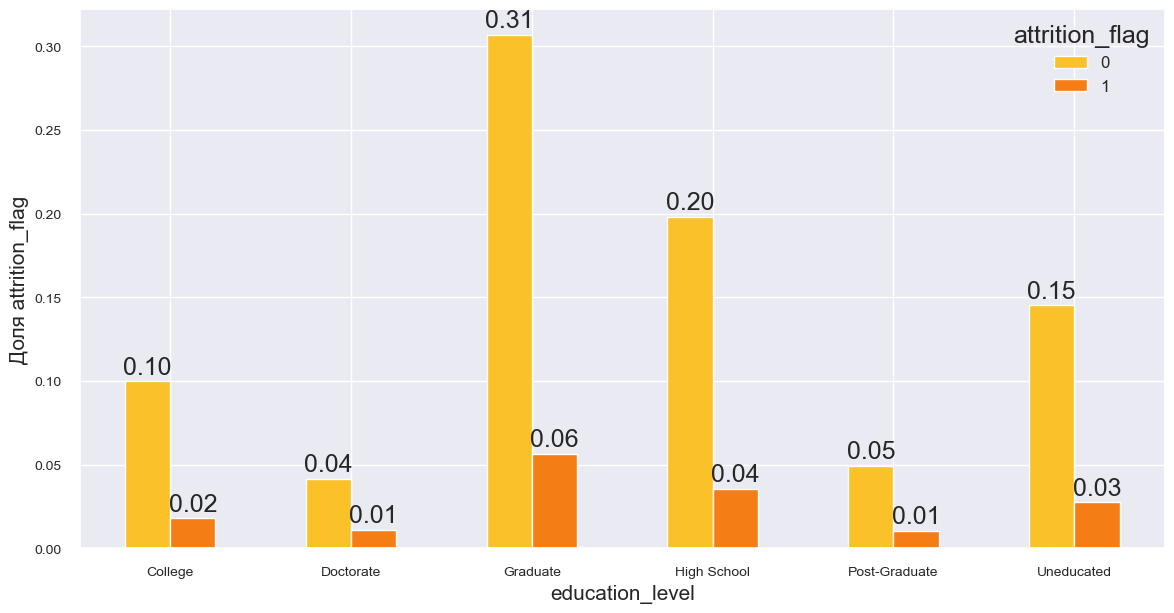

In [37]:
plot_crosstab(
    data=data,
    var="education_level",
    target="attrition_flag",
    color="lightsalmon"
)

#### Выводы по уровню обнразования клиентов банка
* ~50% клиентов банка имеют высшее образование


это знание может помочь банку, что бы тот стремился предложить клиентам с высшем образованием продукт, который соответствует их потребностям и жизненному стилю. Например, банк может предоставлять им льготные условия по кредиту, бонусы за покупки в интернет-магазинах или партнерских сетях, возможность управлять своими финансами онлайн и т.д.

### Рассмотрим 'income_category' и 'attrition_flag'

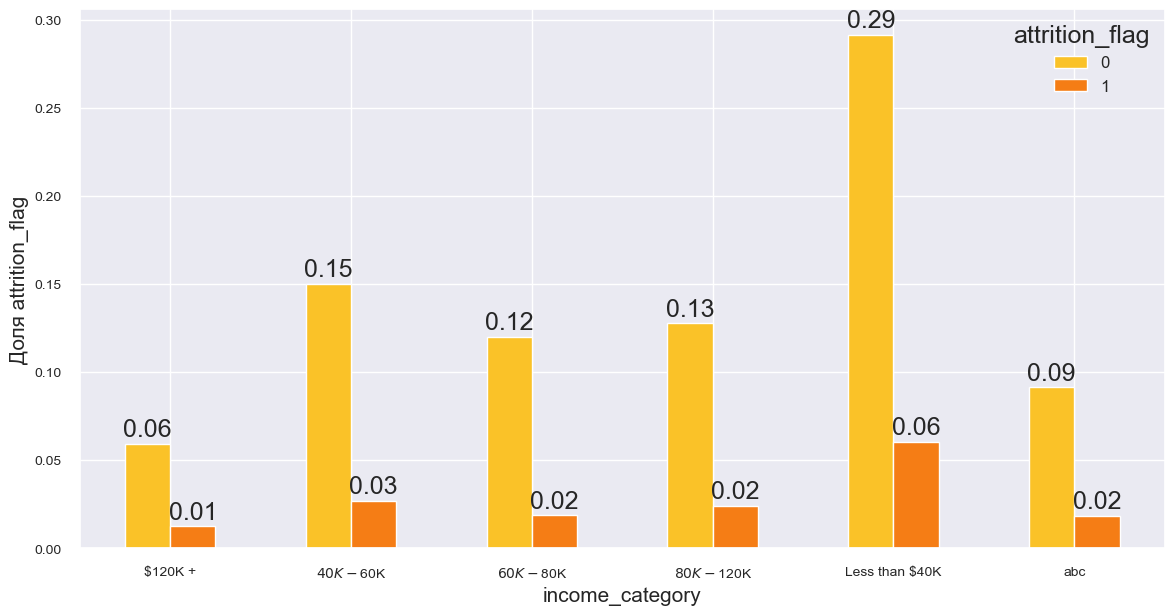

In [38]:
plot_crosstab(
    data=data,
    var="income_category",
    target="attrition_flag",
    color="lightsalmon"
)

**Напоминание** abc в Income_Category скорее всего является пропущеными значениями, либо конфидециальной информмацией пользователя
#### Выводы по годовому доходу клиентов банка
* Данные относительно равномерно рспредлены, но все равно есть группа людей с доходом меньше 40 тысяч в год которая выделяется на общем фоне


### Рассмотрим 'card_category' и 'attrition_flag'

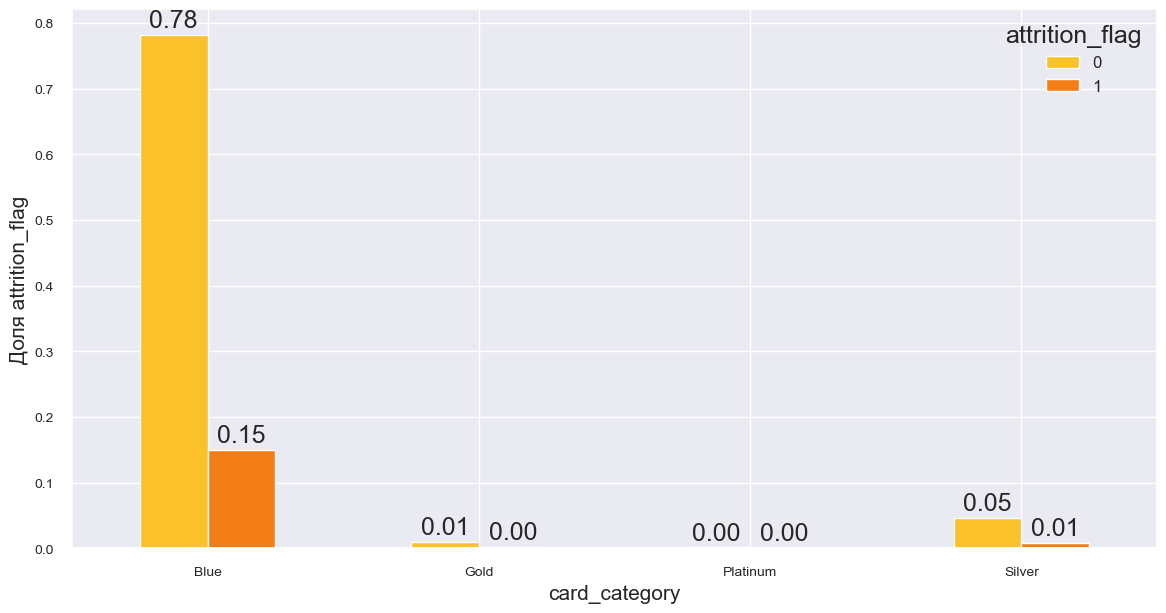

In [39]:
plot_crosstab(
    data=data,
    var="card_category",
    target="attrition_flag",
    color="lightsalmon"
)

#### Выводы по категории карты клиентов банка
* Основой доход банку приносят клиенты с голубыми картами, то есть самыми обычными

### Рассмотрим 'contacts_count_12_mon' и 'attrition_flag'

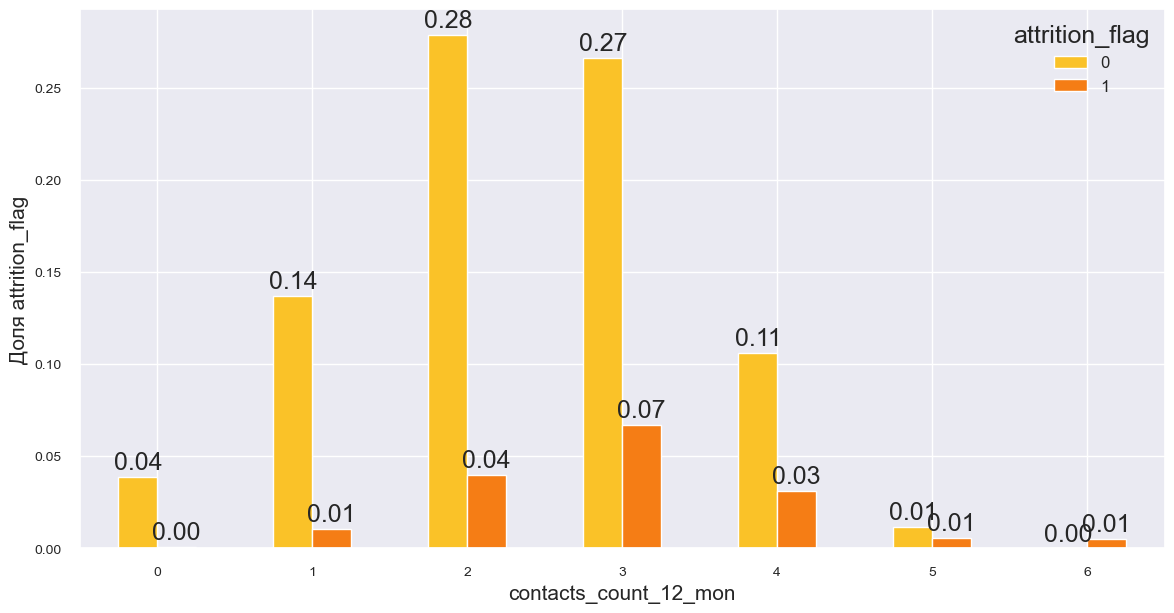

In [40]:
plot_crosstab(
    data=data,
    var="contacts_count_12_mon",
    target="attrition_flag",
    color="lightsalmon"
)

####  Выводы по обращению клиентов в банк за последние 12 месяцев
* Наибольший отток наблюдается среди клиентов, которые больше 1 раза взаимодействовали с банком. Это означает, что банк не в состоянии решить проблемы, с которыми сталкиваются клиенты, приводящие к оттоку клиентов банка


### Рассмотрим 'months_inactive_12_mon' и 'attrition_flag'

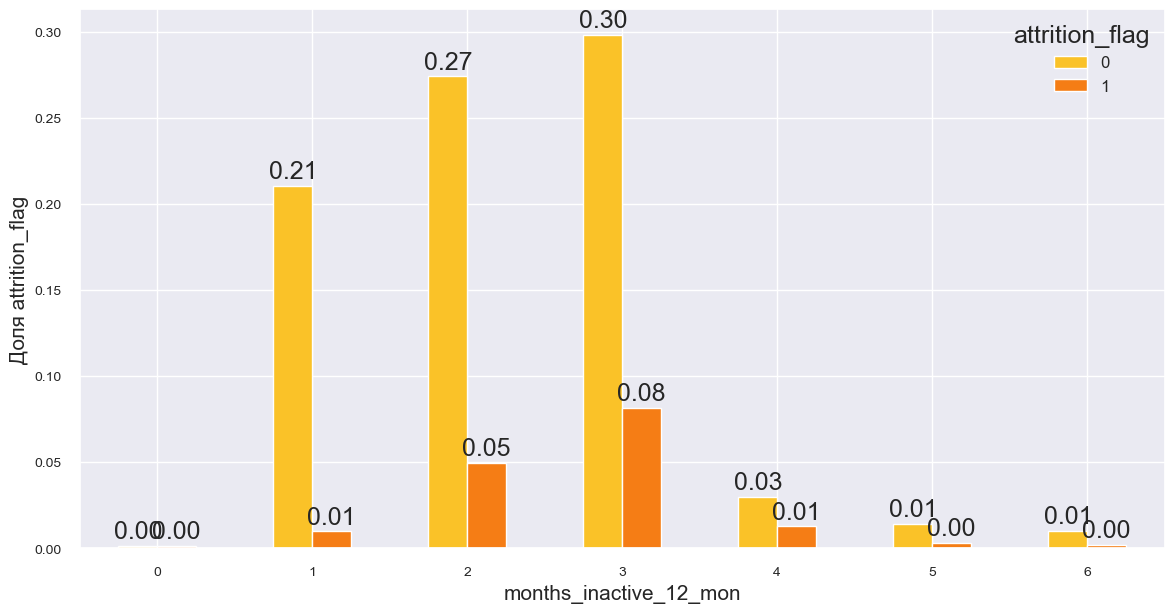

In [41]:
plot_crosstab(
    data=data,
    var="months_inactive_12_mon",
    target="attrition_flag",
    color="lightsalmon"
)

####  Выводы по количеству неактивных клиентов за последние 12 месяцев 
**1)** Основной отток клиентов виден спустя 2 месяца бездействий, скорее всего это связано с тем, что банк не смог поддержать интерес клиентов к своему продукту или услуге, не смог предложить им дополнительные выгоды или льготы, не смог решить их проблемы или жалобы или не смог адаптироваться к изменениям в их потребностях или жизненных обстоятельствах.

**2)** Видно что в процентном соотношении много клиентов разрывали отношения с банком спустя 2 месяца бездействий это может быть связано с тем,  что банк не смог предложить им подходящий продукт или услугу, не смог удовлетворить их ожидания или не смог завоевать их доверие. Также это может быть связано с тем, что клиенты получали кредитную карту по акции или в рамках зарплатного проекта и не планировали ею пользоваться. 

### Рассмотрим 'total_relationship_count' и 'attrition_flag'

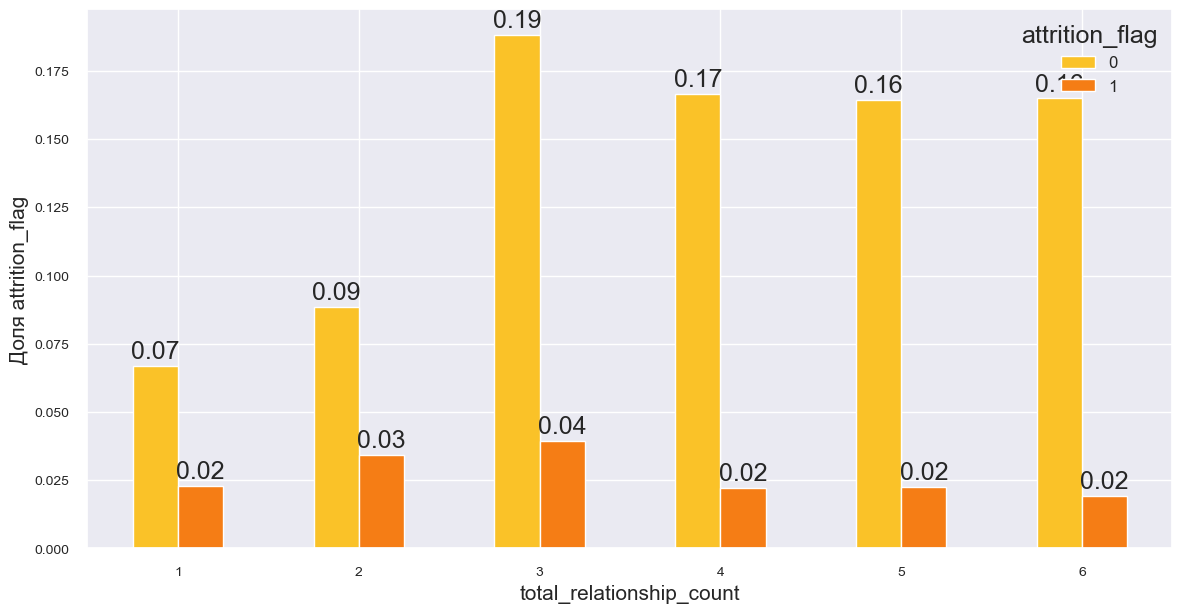

In [42]:
plot_crosstab(
    data=data,
    var="total_relationship_count",
    target="attrition_flag",
    color="lightsalmon"
)

#### Выводы по кол-ву продуктов банка которыми пользуется клиент банка
* В целом можно сказать, что кол-во продуктов банка которыми пользуется клиент не влияет на отток клиентов банка. Этому может быть несколько причин:
1) клиенту не важно сколько у него кредитных карт или вкладов в банке, если он не удволетворен условиями,обслуживанием, безопасностью, то он вероятно перестанет пользоваться услугами банка 
2) банк не смог сформировать чувство пренодлежности клиента к банку или не смог предложить им персонализированные или эксклюзивные предложения в зависимости от количества продуктов. То есть, клиент не видит разницы между тем, пользоваться ли он одним или несколькими продуктами банка.

### Рассмотрим 'dependent_count' и 'attrition_flag'

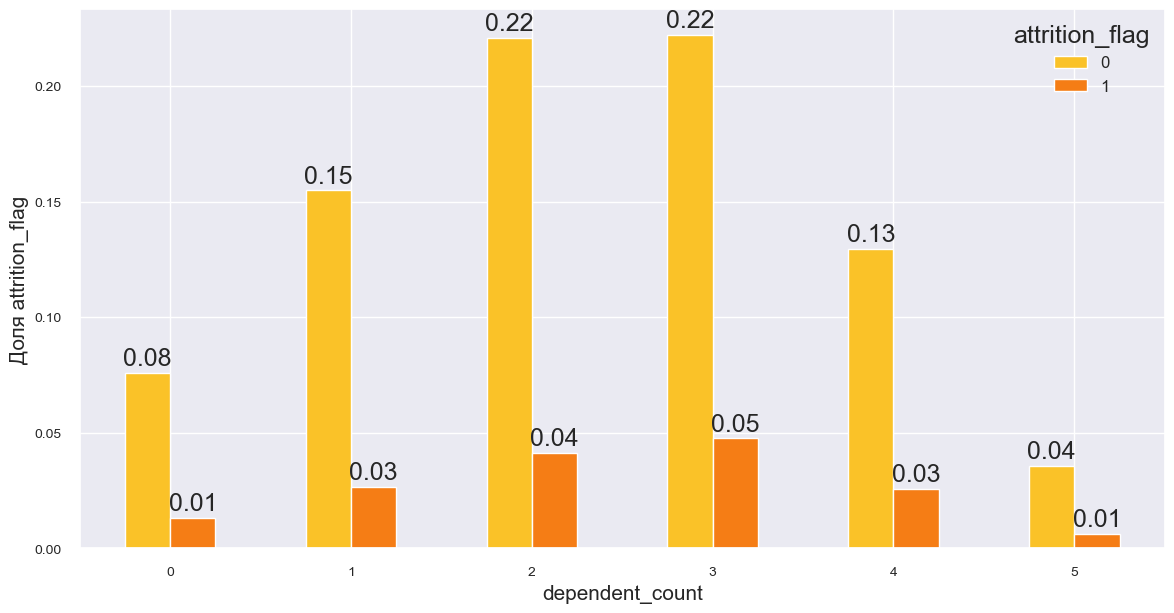

In [43]:
plot_crosstab(
    data=data,
    var="dependent_count",
    target="attrition_flag",
    color="lightsalmon"
)

#### Выводы по кол-ву членов семи клиента банка
* Видна тенденция, что при увиличении кол-во членов семьи, увеличивается отток пользователей банка, но не в процентном соотношении

Это может говорить о том, что банк не учитывает специфику и потребность семейных клиентов.
Например, банк может не предлагать им семейные тарифы, скидки, бонусы или другие льготы за совместное пользование продуктами банка. Также банк может не предоставлять им удобные способы управления семейным бюджетом, перевода денег между счетами или контроля расходов. То есть, банк не создает для семейных клиентов дополнительной ценности или преимуществ по сравнению с другими банками. 


Семейные клиенты могут быть более требовательными и чувствительными к качеству обслуживания, так как они несут ответственность не только за себя, но и за своих близких. Поэтому они могут легче менять банк, если он не удовлетворяет их потребностям или не вызывает доверия.

## Кластерный анализ 

### Обработка данных перед кластерным анализом

### Работа с выбросами и анамалиями


In [44]:
# Перед предобработкой значений нужно понять есть ли выбросы в наших данных и что мы будем с ними делать?
data_outlers = data.select_dtypes(include=["float64", "int64"])

# находим первый и третий квартили
Q1 = data_outlers.quantile(0.25)  
Q3 = data_outlers.quantile(0.75)

IQR = Q3 - Q1

# находим нижний и верхний пределы для выбросов
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Выбросы в данных:")

outliers = (
    (data_outlers < lower_limit)
    | (data_outlers > upper_limit)
)

print(outliers.sum() / len(data_outlers) * 100)

Выбросы в данных:
attrition_flag             16.0660
customer_age                0.0197
gender                      0.0000
dependent_count             0.0000
months_on_book              3.8116
total_relationship_count    0.0000
months_inactive_12_mon      3.2685
contacts_count_12_mon       6.2111
credit_limit                9.7166
total_revolving_bal         0.0000
avg_open_to_buy             9.5092
total_amt_chng_q4_q1        3.9103
total_trans_amt             8.8476
total_trans_ct              0.0197
total_ct_chng_q4_q1         3.8906
avg_utilization_ratio       0.0000
dtype: float64


In [45]:
# Так же можно оценить выбросы через Z-оценки

def z_score_method (df):
    """
     Принимает датафрейм df с признаками и возвращает список индексов, соответствующих наблюдениям, 
     содержащим более n выбросов по методу z-оценки.
    """
    outlier_list = []
    
    for col in df.columns:
        data_mean = df[col].mean()
        data_std = df[col].std()
        threshold = 3
        
        z_score = abs( (df[col] - data_mean) / data_std )
        
        outlier_list_column = df[z_score > threshold].index
        
        outlier_list.extend(outlier_list_column)
        
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items())
    
    df1 = df[z_score > threshold]
    print('Выбросы:', len(multiple_outliers))
    
    return multiple_outliers

multiple_outliers = z_score_method(data.select_dtypes(['int', 'float']))

Выбросы: 814


Для этой задачи я не считаю необходимым удалять выбросы, но я осведомлен о различных методах, которые можно использовать для обработки аномальных данных.


#### OrdinalEncoder 

In [46]:
# еще раз взгляем на наиш данные 
data.sample(10)
df = data.copy()

attrition_flag  customer_age  gender  dependent_count education_level  \
5317               0            54       1                2             NaN   
4146               0            48       0                4       Doctorate   
3554               0            43       0                3   Post-Graduate   
9997               0            49       0                3     High School   
6532               0            43       1                2             NaN   
8403               0            57       1                2        Graduate   
5274               1            43       1                4      Uneducated   
4235               0            49       0                4      Uneducated   
4983               1            45       0                2         College   
7526               0            51       1                3             NaN   

     marital_status income_category card_category  months_on_book  \
5317        Married  Less than $40K          Blue              46   
4146            NaN    $80K - $120K          Blue              40   
3554         Single     $60K - $80K          Blue              33   
9997        Married     $60K - $80K          Gold              42   
6532            NaN  Less than $40K          Blue              36   
8403        Married  Less than $40K          Blue              45   
5274         Single  Less than $40K          Blue              36   
4235        Married     $60K - $80K          Blue              34   
4983         Single     $60K - $80K          Blue              29   
7526            NaN  Less than $40K          Blue              36   

      total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
5317                         4                       3                      3   
4146                         3                       2                      2   
3554                         4                       3                      2   
9997                         3                       1                      4   
6532                         4                       3                      3   
8403                         1                       3                      3   
5274                         5                       3                      2   
4235                         5                       3                      2   
4983                         3                       2                      4   
7526                         5                       2                      2   

      credit_limit  total_revolving_bal  avg_open_to_buy  \
5317     2611.0000                 1573        1038.0000   
4146     3429.0000                 1268        2161.0000   
3554    16037.0000                    0       16037.0000   
9997    34516.0000                    0       34516.0000   
6532     1780.0000                 1541         239.0000   
8403     1860.0000                    0        1860.0000   
5274     2422.0000                 1014        1408.0000   
4235    12994.0000                  904       12090.0000   
4983     3841.0000                    0        3841.0000   
7526     2267.0000                 1357         910.0000   

      total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
5317                0.9020             4899              68   
4146                0.7030             4422              64   
3554                0.5580             3048              70   
9997                0.8380            15095             102   
6532                0.8390             5008              93   
8403                0.7780             5109              62   
5274                0.6880             2437              44   
4235                0.6270             3734              74   
4983                0.7940             2832              48   
7526                0.6970             4464              85   

      total_ct_chng_q4_q1  avg_utilization_ratio  
5317               0.5810                 0.6020  
4146               1.7830  

In [47]:
# Разберемся с пропущеными значениями в категориальных переменых 
df['education_level'] = df['education_level'].replace({np.NaN: 'miss'})
df['marital_status'] = df['marital_status'].replace({np.NaN: 'miss'})

label_encoder = LabelEncoder()
encoder = OrdinalEncoder(categories=[
        [
            'miss',
            'Uneducated',
            'High School',
            'College',
            'Graduate',
            'Post-Graduate',
            'Doctorate'
        ]
    ]
)


df['education_level_encoded'] = encoder.fit_transform(df[['education_level']])
df['marital_status_encode'] = label_encoder.fit_transform(df[['marital_status']])


In [48]:
# Обратная подстановка пустых значений для дальнейшего их заполнения
df['education_level_encoded'] = df['education_level_encoded'].replace({0: np.NaN})
df['marital_status_encode'] = df['marital_status_encode'].replace({0: np.NaN})


In [49]:
# Заполнили пропуски модой 
imputer = SimpleImputer(strategy='most_frequent')

# Обратная подстановка пустых значений для дальнейшего их заполнения
df['education_level_encoded'] = imputer.fit_transform(df[['education_level_encoded']])
df['marital_status_encode'] = imputer.fit_transform(df[['marital_status_encode']])



In [50]:
encoder = OrdinalEncoder(
    categories=[
        [
            'abc',
            'Less than $40K',
            '$40K - $60K',
            '$60K - $80K',
            '$80K - $120K',
            '$120K +'
        ]
    ]
)

df['income_category_encoded'] = encoder.fit_transform(df[['income_category']])

In [51]:
encoder = OrdinalEncoder(
    categories=[
        [
            'Blue',
            'Silver',
            'Gold',
            'Platinum'
        ]
    ]
)

df['card_category_encoded'] = encoder.fit_transform(df[['card_category']])

#### Теперь перейдем к OneHoteEncode


In [52]:
def one_hot_encode(df: pd.DataFrame, categorical_one_hot: List[str]) -> pd.DataFrame:
    """
    Функция для кодирования категориальных переменных в виде фиктивных переменных (dummy variables) с помощью OneHotEncoder.

    Args:
    ----------
        df:
            pandas.DataFrame. Датафрейм с данными, содержащими категориальные переменные.
        columns:
            list of str. Список имен столбцов, которые нужно закодировать.

    Returns:
    ----------
        result_df:
            pandas.DataFrame. Датафрейм с данными, в котором указанные столбцы закодированы с помощью OneHotEncoder и добавлены к исходным данным.
    """
    encoder = OneHotEncoder(sparse=False)
    encoded = encoder.fit_transform(df[categorical_one_hot])

    # получаем имена новых признаков
    feature_names = encoder.get_feature_names_out(input_features=categorical_one_hot)
    encoded_df = pd.DataFrame(encoded, columns=feature_names)

    # соединяем новый датафрейм с исходным по индексу
    df = df.join(encoded_df)
    
    return df


In [53]:
categorical_one_hot = [
    'gender',
    'dependent_count',
    'marital_status_encode',
    ]


continuous_variable = [
    'credit_limit',
    'avg_open_to_buy',      # при анализе не будем работать с этой переменной т к она вводит избыточность
    'total_amt_chng_q4_q1',
    'total_ct_chng_q4_q1',
    'avg_utilization_ratio' # это ( Avg_Open_To_Buy / Credit_Limit ) то есть тоже вносить избыточность 
    ]


df = one_hot_encode(df, categorical_one_hot)

#### После кодировки нужных нам переменных стоит финально очистить наш фрейм перед применением моделей машинного обучения

In [54]:
df

attrition_flag  customer_age  gender  dependent_count education_level  \
0                   0            45       0                3     High School   
1                   0            49       1                5        Graduate   
2                   0            51       0                3        Graduate   
3                   0            40       1                4     High School   
4                   0            40       0                3      Uneducated   
...               ...           ...     ...              ...             ...   
10122               0            50       0                2        Graduate   
10123               1            41       0                2            miss   
10124               1            44       1                1     High School   
10125               1            30       0                2        Graduate   
10126               1            43       1                2        Graduate   

      marital_status income_category card_category  months_on_book  \
0            Married     $60K - $80K          Blue              39   
1             Single  Less than $40K          Blue              44   
2            Married    $80K - $120K          Blue              36   
3               miss  Less than $40K          Blue              34   
4            Married     $60K - $80K          Blue              21   
...              ...             ...           ...             ...   
10122         Single     $40K - $60K          Blue              40   
10123       Divorced     $40K - $60K          Blue              25   
10124        Married  Less than $40K          Blue              36   
10125           miss     $40K - $60K          Blue              36   
10126        Married  Less than $40K        Silver              25   

       total_relationship_count  months_inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       contacts_count_12_mon  credit_limit  total_revolving_bal  \
0                          3    12691.0000                  777   
1                          2     8256.0000                  864   
2                          0     3418.0000                    0   
3                          1     3313.0000                 2517   
4                          0     4716.0000                    0   
...                      ...           ...                  ...   
10122                      3     4003.0000                 1851   
10123                      3     4277.0000                 2186   
10124                      4     5409.0000                    0   
10125                      3     5281.0000                    0   
10126                      4    10388.0000                 1961   

       avg_open_to_buy  total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
0           11914.0000                1.3350             1144              42   
1            7392.0000                1.5410             1291              33   
2            3418.0000                2.5940             1887              20   
3             796.0000                1.4050             1171              20   
4            4716.0000                2.1750              816              28   
...                ...                   ...              ...             ...   
10122        2152.0000                0.7030            15476             117   
10123        2091.0000                0.804

In [55]:
drop_columns = [
    'gender',                # остальные уже закодированны
    'dependent_count',
    'education_level',
    'marital_status',
    'income_category',
    'card_category',
    'avg_open_to_buy',       # для избежания мультиколлинеарностит 
    'avg_utilization_ratio'  # для избежания избыточности 
]

df = df.drop(drop_columns, axis=1)

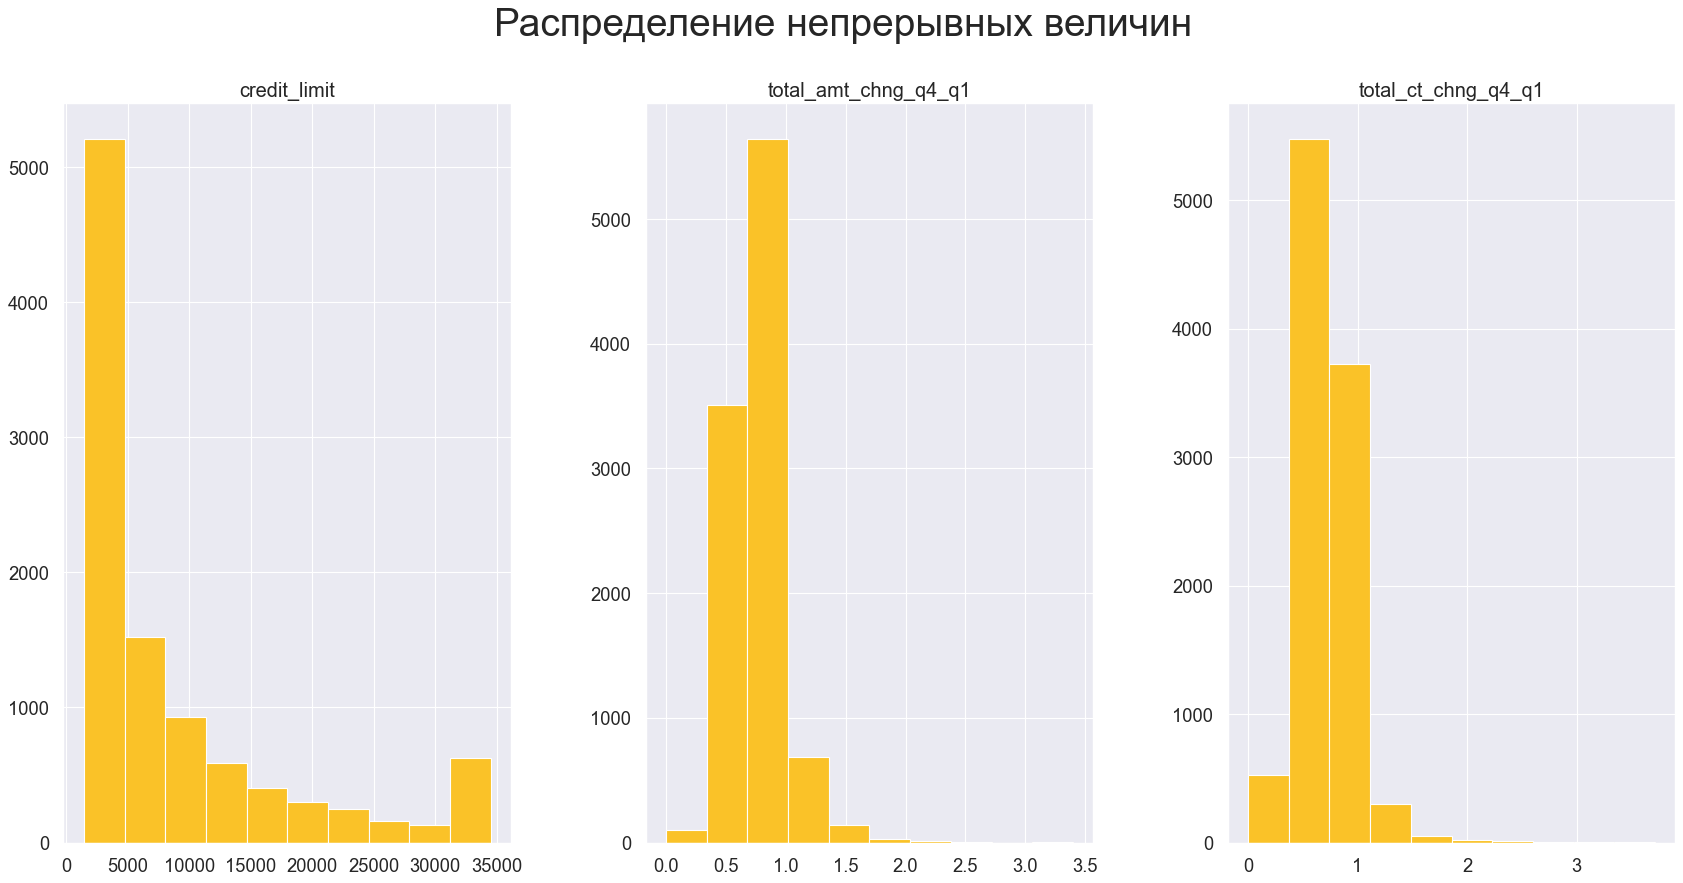

In [56]:
# перейдем к маштабированию непрерывных переменных
fig, ax = plt.subplots(1, 3, figsize=(26, 12), dpi=80, facecolor='w', edgecolor='k')

# устанавливаем заголовок для всей фигуры
fig.suptitle('Распределение непрерывных величин', fontsize=35)

ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]

ax1.set_title('First Plot')
ax2.set_title('Second Plot')
ax3.set_title('Third Plot')

df[
    [
        'credit_limit',
        'total_amt_chng_q4_q1',
        'total_ct_chng_q4_q1'
    ]
].hist(ax=ax);

plt.show();

* Маштабирование признаков с помощью StandardScaler подразумевает, что данные имеют приблизительно нормальное распределение, и приводит их к **нулевому среднему и единичному стандартному отклонению**. Это может быть полезно для алгоритмов, которые чувствительны к масштабу признаков или основаны на расстоянии между объектами, таких как PCA, кластеризация, логистическая регрессия, SVM, перцептроны, нейронные сети. Однако, если данные имеют сильные **выбросы** или **не имеют нормального распределения**, то StandardScaler может исказить их распределение и влияние на модель.
***
* Маштабирование признаков с помощью MinMaxScaler подразумевает, что данные имеют **ограниченный диапазон значений**, и приводит их к интервалу **[0, 1]** или любому другому заданному интервалу. Это может быть полезно для алгоритмов, которые ожидают такого диапазона или чувствительны к относительным изменениям признаков, таких как обработка изображений или нейронные сети. Однако, если данные имеют **выбросы** или **не имеют четких границ**, то MinMaxScaler может сократить разброс значений и потерять информацию или чувствительность модели.


#### У на все готово для кластеризации

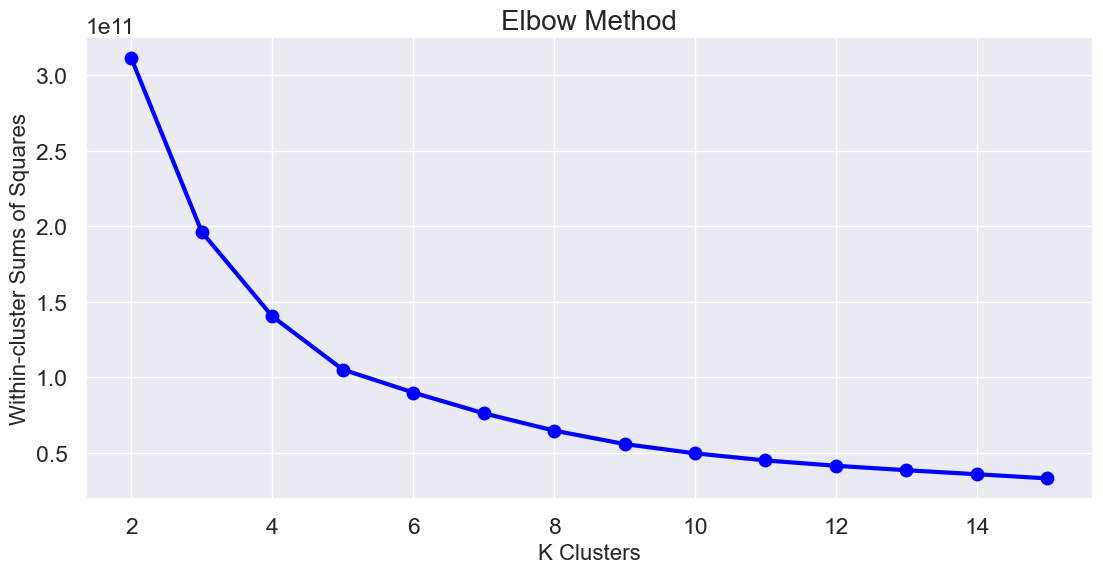

In [57]:
wcss = []

for i in range(2, 16):
    km = KMeans(
        n_clusters = i, 
        init = 'k-means++',
        max_iter = 500, 
        n_init = 10,
        random_state = rand
    )
    km.fit(df.iloc[:, 1:])
    wcss.append(km.inertia_)

fig = plt.figure(figsize=(13,6))
ax = plt.gca()

ax.plot(range(2,16), wcss, color='blue', linewidth=3, marker='o', markersize=10)

ax.set_title('Elbow Method', fontsize=20)
ax.set_xlabel('K Clusters', fontsize=16)
ax.set_ylabel('Within-cluster Sums of Squares', fontsize=16)

ax.grid(True)

# добавляем аннотации на локтевые точки
ax.annotate(
    'Possible elbow point',
    xy=(4, 1000),
    xytext=(6, 1500),
    arrowprops=dict(facecolor='black', shrink=0.05)
)

plt.show();


In [58]:
# Как показал нам график локтя, оптимальным количествомкластеров будет 4
n_clusters = 4
init_method = "k-means++" 
n_repeats = 100
max_iterations = 10000

kmeans = KMeans(
    n_clusters=n_clusters,
    init=init_method,
    n_init=n_repeats,
    max_iter=max_iterations,
    random_state=rand
)

X = df.iloc[:, 1:]

cluster_labels = kmeans.fit_predict(X)

# добавляем новую колонку в датафрейм df_combined с метками кластеров
df[f'CLUSTER_Kmeans{n_clusters}'] = cluster_labels

silhouette = silhouette_score(X, cluster_labels)
print(f'Silhouette score: {silhouette:.3f}')

Silhouette score: 0.590


#### Выберем кол-во компонент 

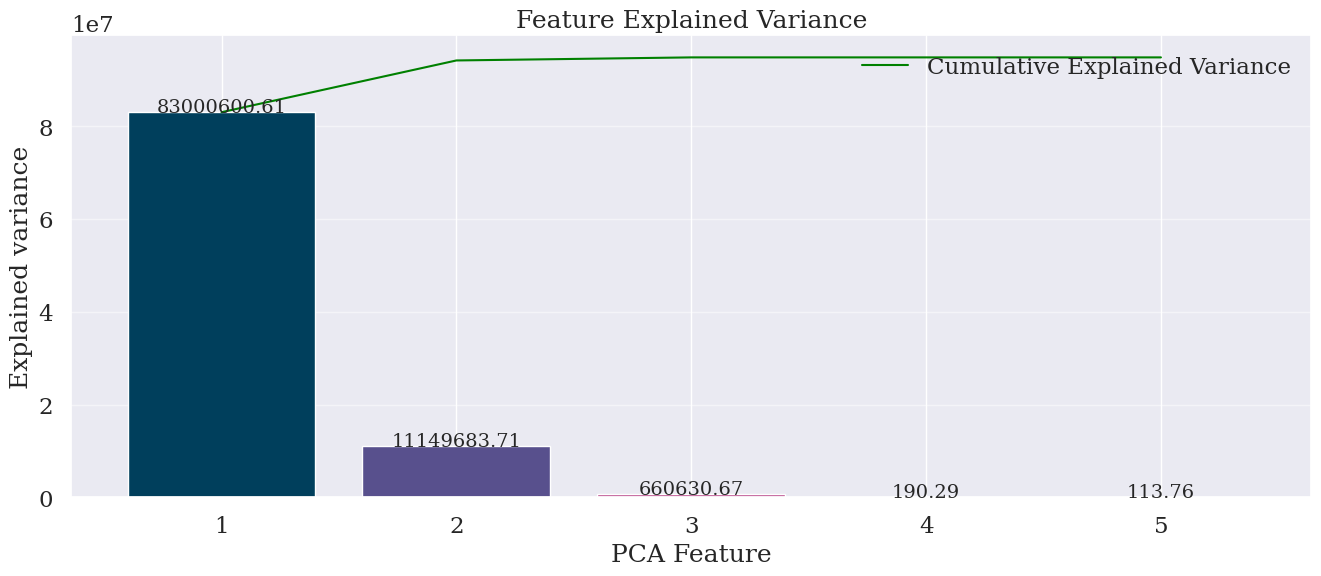

In [59]:
pca = PCA(n_components=5, random_state=rand)
 
pca.fit_transform(X)
 
plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 14, 'font.family': 'serif'})

plt.bar(
    range(1, len(pca.explained_variance_) + 1),
    pca.explained_variance_,
    color=['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600'])

plt.plot(
    range(1, len(pca.explained_variance_ ) + 1),
    np.cumsum(pca.explained_variance_),
    c='green',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper right')
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.grid(axis='y', alpha=0.5)

for i, v in enumerate(pca.explained_variance_):
    plt.text(i + 1, v + 1.1, f'{v:.2f}', ha='center')

plt.show();


*Занчение над каждой колонкой - это дисперсия, объясненная каждой компонентой PCA. Они показывают, насколько важна каждая компонента для описания данных. Чем больше значение, тем больше информации содержит компонента. Первая компонента объясняет больше 90% дисперсии данных, что говорит о том, что она очень сильно коррелирует с исходными признаками. Последняя компонента объясняет менее 0.001% дисперсии данных, что говорит о том, что она почти не несет информации и может быть отброшена.*

**Исходя из этого графика, мы можем использовать 2 компоненты для снижения размерности данных. Это означает, что мы можем представить данные в виде двух новых признаков, которые сохраняют большую часть информации из исходных данных.**

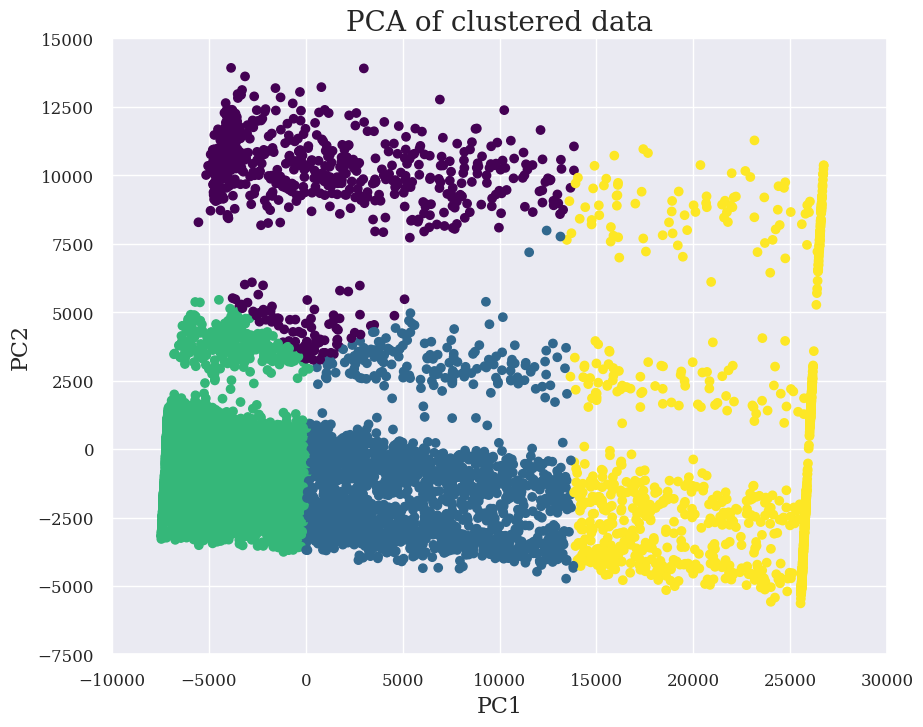

In [60]:
pca = PCA(n_components=2, random_state=rand)
X_pca = pca.fit_transform(X)
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')

ax.set_title('PCA of clustered data', fontsize=20)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)
ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12) 
ax.set_yticks(ax.get_yticks()) 
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12) 
plt.show();

### Немного факторного анализа

In [61]:
fac = Factor(X, n_factor=2)
res = fac.fit()
res.get_loadings_frame(threshold=0.3, color_max='green')

-  В данном случае, можно предположить, что первый фактор связан с уровнем дохода и кредитным лимитом клиентов банка, а второй фактор связан с семейным положением клиентов. Например, переменная gender_1 имеет отрицательный коэффициент -0.919331 для первого фактора, что означает, что женщины (gender_1 = 1) имеют более низкий доход и кредитный лимит, чем мужчины (gender_1 = 0). Переменная marital_status_encode_1.0 имеет положительный коэффициент 1.042302 для второго фактора, что означает, что женатые клиенты (marital_status_encode_1.0 = 1) имеют более высокий показатель этого фактора, чем одинокие или разведенные (marital_status_encode_1.0 = 0).

- Остальные переменные имеют низкие или отсутствующие коэффициенты нагрузки для обоих факторов, что означает, что они не имеют существенного влияния на вариацию данных и не вносят значимого вклада в интерпретацию факторов.

In [62]:
df_c = df[
        [
            'attrition_flag',
            'customer_age',
            'months_on_book',
            'total_relationship_count',
            'months_inactive_12_mon',
            'education_level_encoded',
            'card_category_encoded',
            'income_category_encoded',
            'CLUSTER_Kmeans4'
        ]
    ]


df_c1 = df_c[df_c['CLUSTER_Kmeans4'] == 0] 
df_c2 = df_c[df_c['CLUSTER_Kmeans4'] == 1]
df_c3 = df_c[df_c['CLUSTER_Kmeans4'] == 2]
df_c4 = df_c[df_c['CLUSTER_Kmeans4'] == 3]


In [63]:
# Определи функцию plot_clusters, которая принимает название колонки
def plot_clusters(column: str) -> None:
    """
    Функция, которая строит графики распределения заданной колонки для четырех кластеров клиентов банка.

    Args:
    column - строка, название колонки, по которой нужно построить графики.

    Returns:
    None, но отображает графики на экране.
    """

    fig, axs = plt.subplots(2, 2, figsize=(34, 15))
    ax1 = axs[0, 0]
    ax2 = axs[0, 1]
    ax3 = axs[1, 0]
    ax4 = axs[1, 1]

    colors = ['coral', 'gold', 'olive', 'brown'] 

    df_c1[column].value_counts().plot(kind='bar', rot=60, ax=ax1, label='cluster 1', color=colors[0])
    ax1.set_title(f'Распределение {column} в кластере 1')
    df_c2[column].value_counts().plot(kind='bar', rot=60, ax=ax2, label='cluster 2', color=colors[1])
    ax2.set_title(f'Распределение {column} в кластере 2')
    df_c3[column].value_counts().plot(kind='bar', rot=60, ax=ax3, label='cluster 3', color=colors[2])
    ax3.set_title(f'Распределение {column} в кластере 3')
    df_c4[column].value_counts().plot(kind='bar', rot=60, ax=ax4, label='cluster 4', color=colors[3])
    ax4.set_title(f'Распределение {column} в кластере 4')

    for ax in [ax1, ax2, ax3, ax4]:
        ax.grid()
        ax.legend()

    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    plt.rc('legend', fontsize=20)

    plt.legend()
    plt.show();
    
    return None

### Посмотрим на распределение оттока клиентов в кластерах 

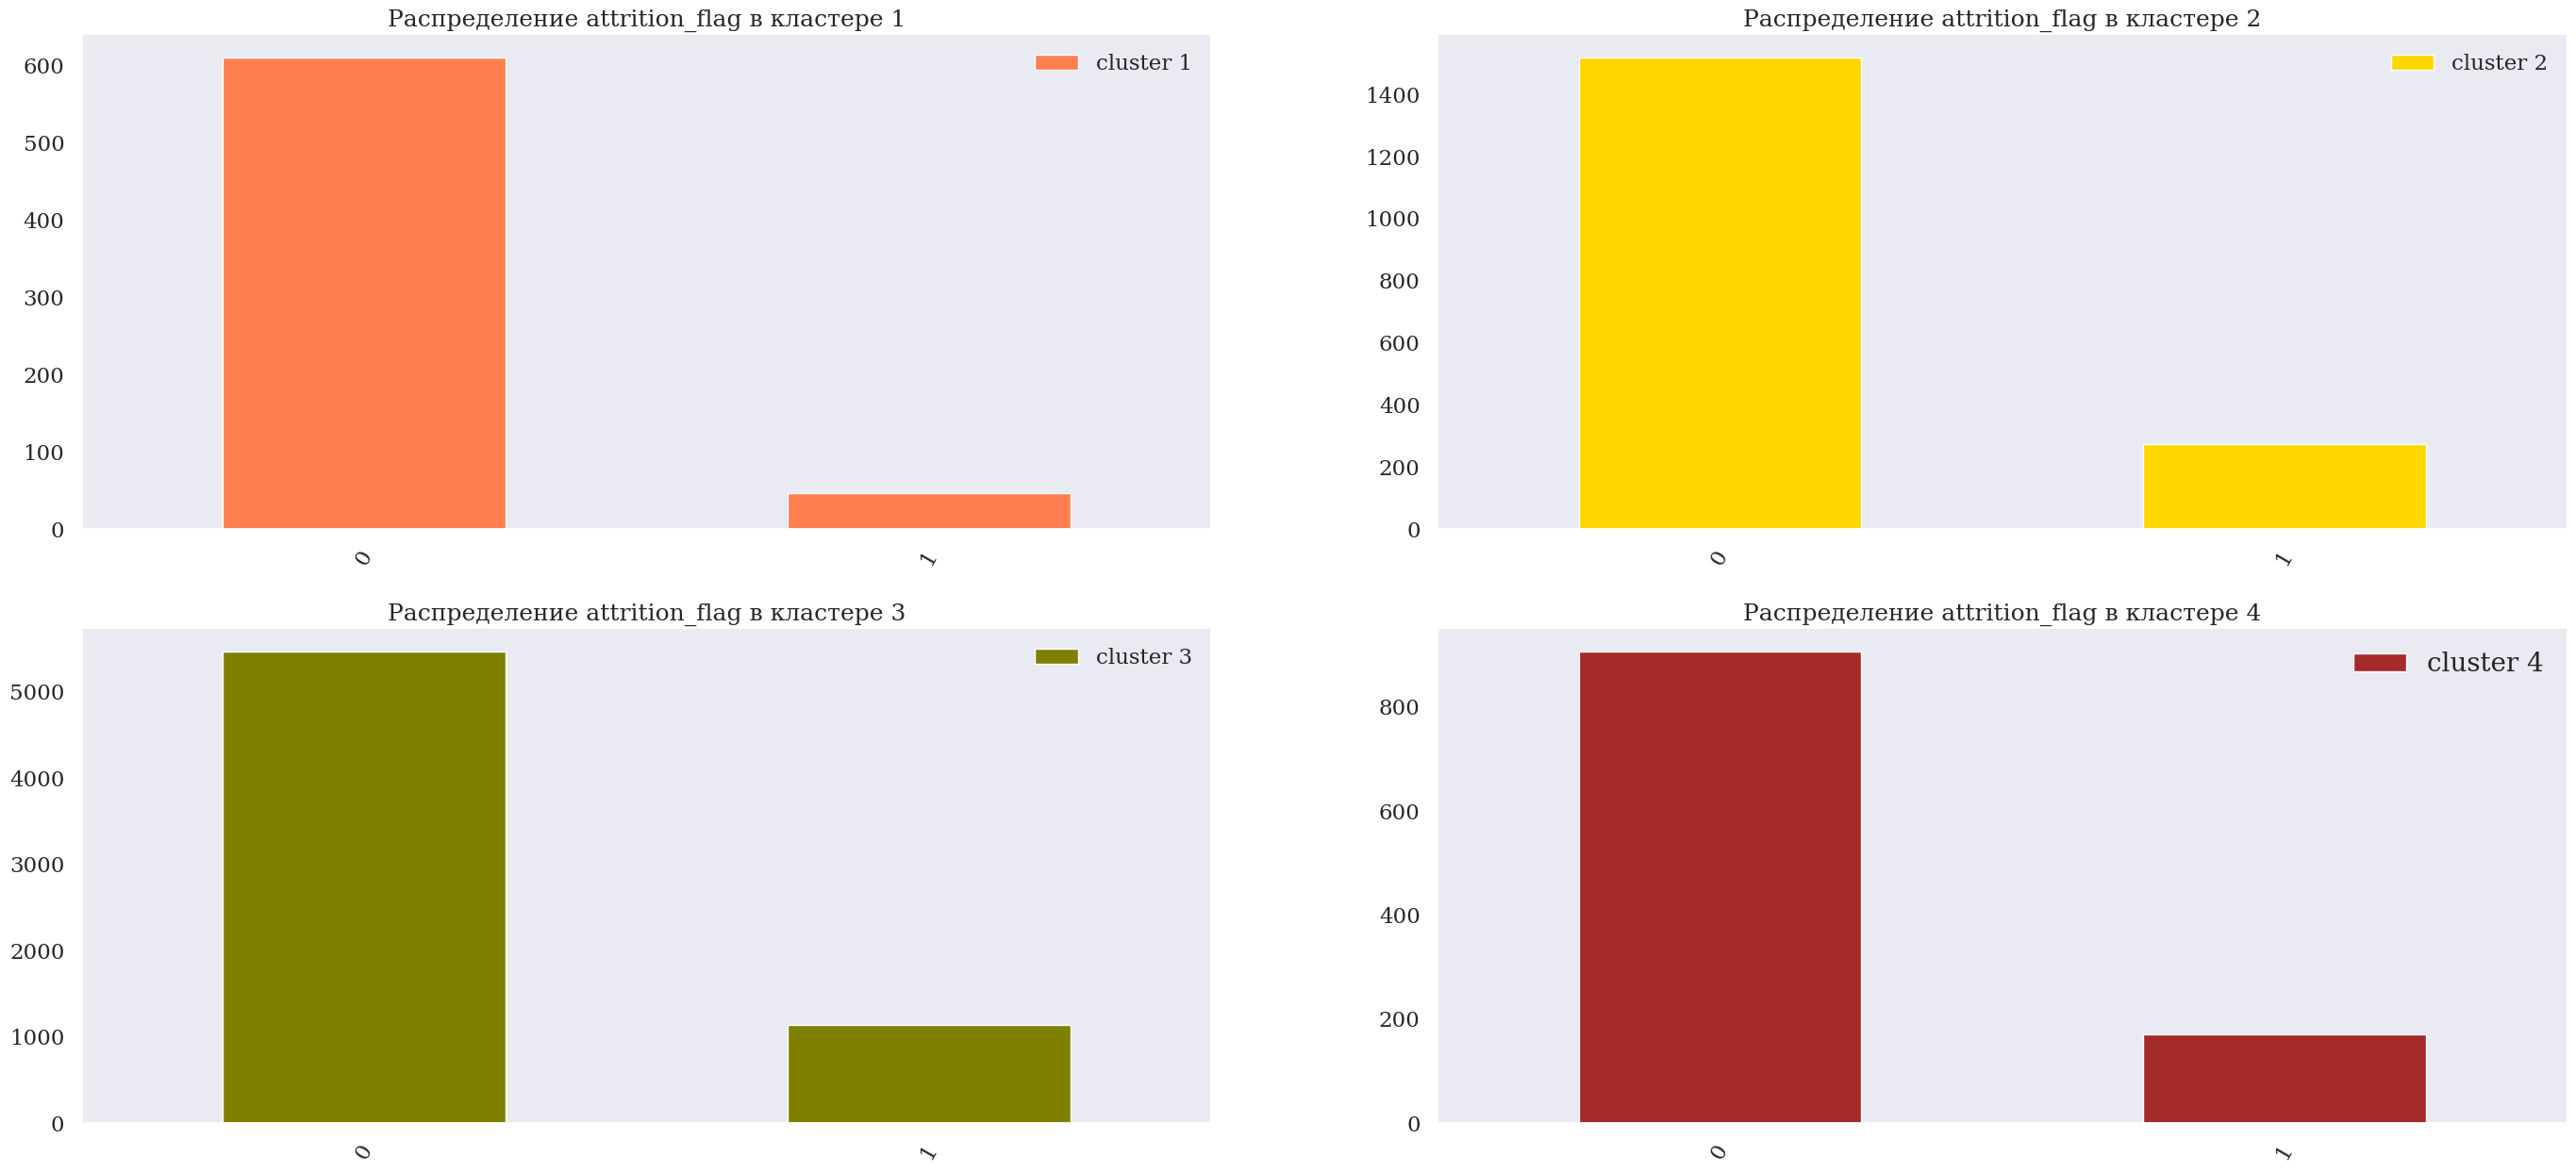

In [64]:
plot_clusters('attrition_flag')

*Как мы видим, в четвертом кластере малая чать клиентов покинуло банк. Нам нужно выявить паттерны поведения этого кластера, чтобы понять, что делает клиентов этого кластера более лояльными к банку. Возможно, это связано с их возрастом, доходом, продуктами, которыми они пользуются, или уровнем удовлетворенности от обслуживания. Мы можем использовать методы машинного обучения, такие как деревья решений или логистическая регрессия, чтобы определить наиболее значимые факторы и построить модель прогнозирования оттока клиентов.*

### Посмотрим на распредление возраста людей в кластерах 

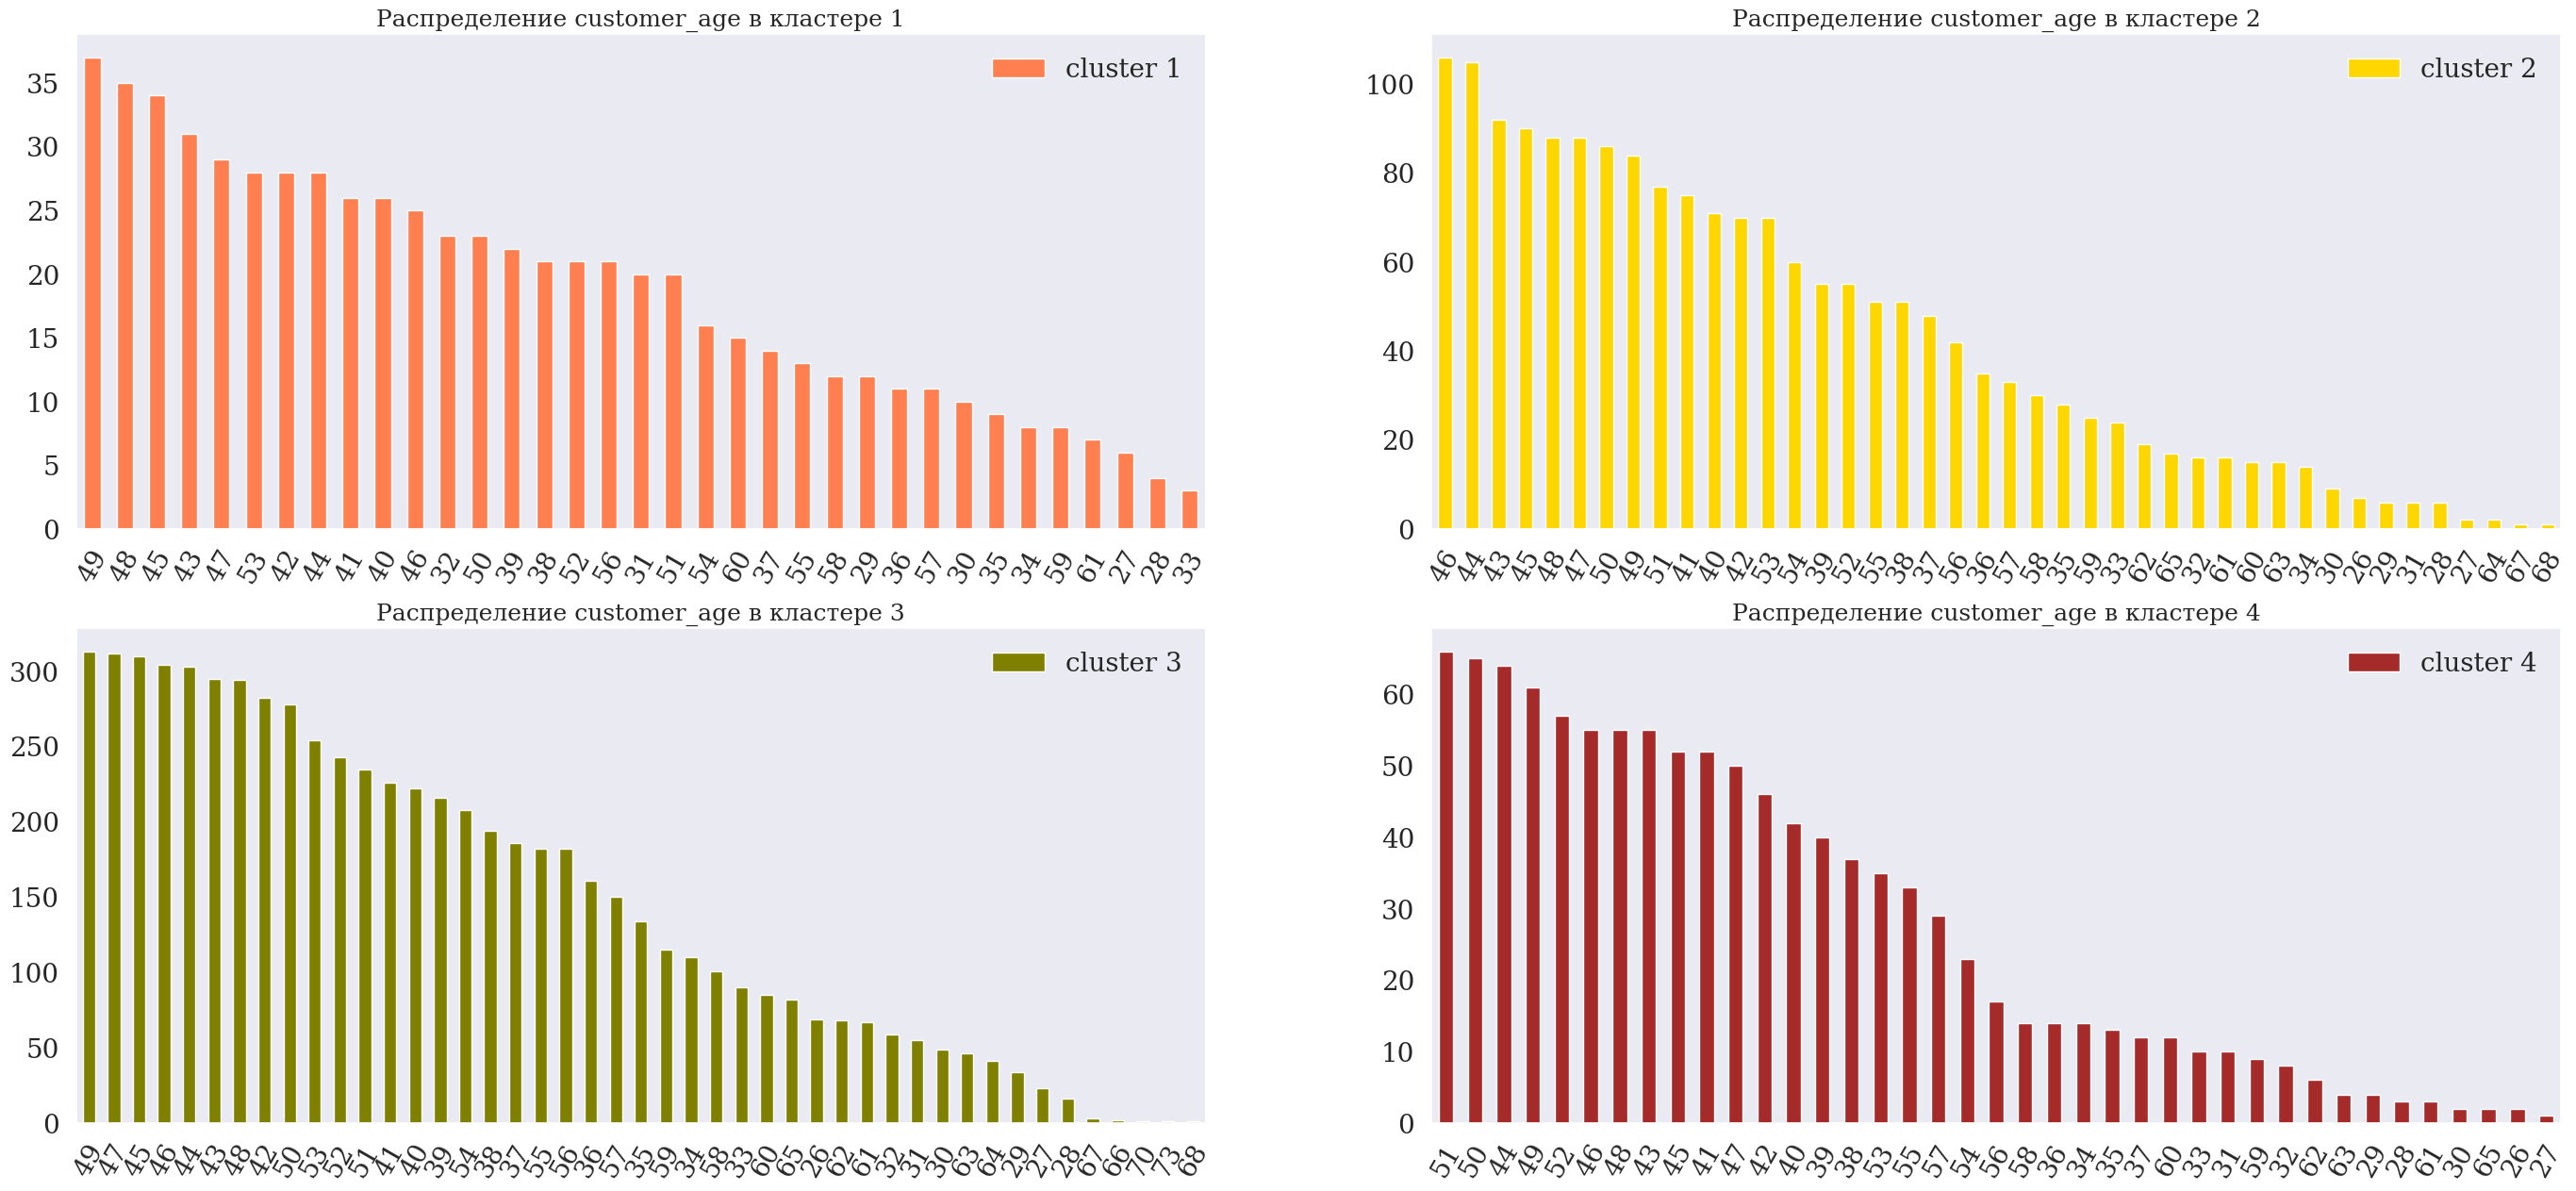

In [65]:
plot_clusters('customer_age')

*Распределение возрастов во всех кластерах приблизительно одинаковое так что возраст не имеет сильного влияния на принадлежность к тому или иному кластеру, или что мы не смогли выделить кластеры, которые бы отличались по возрасту.*

### Посмотрим на распредление периода взаимоотношения с банком в кластерах 

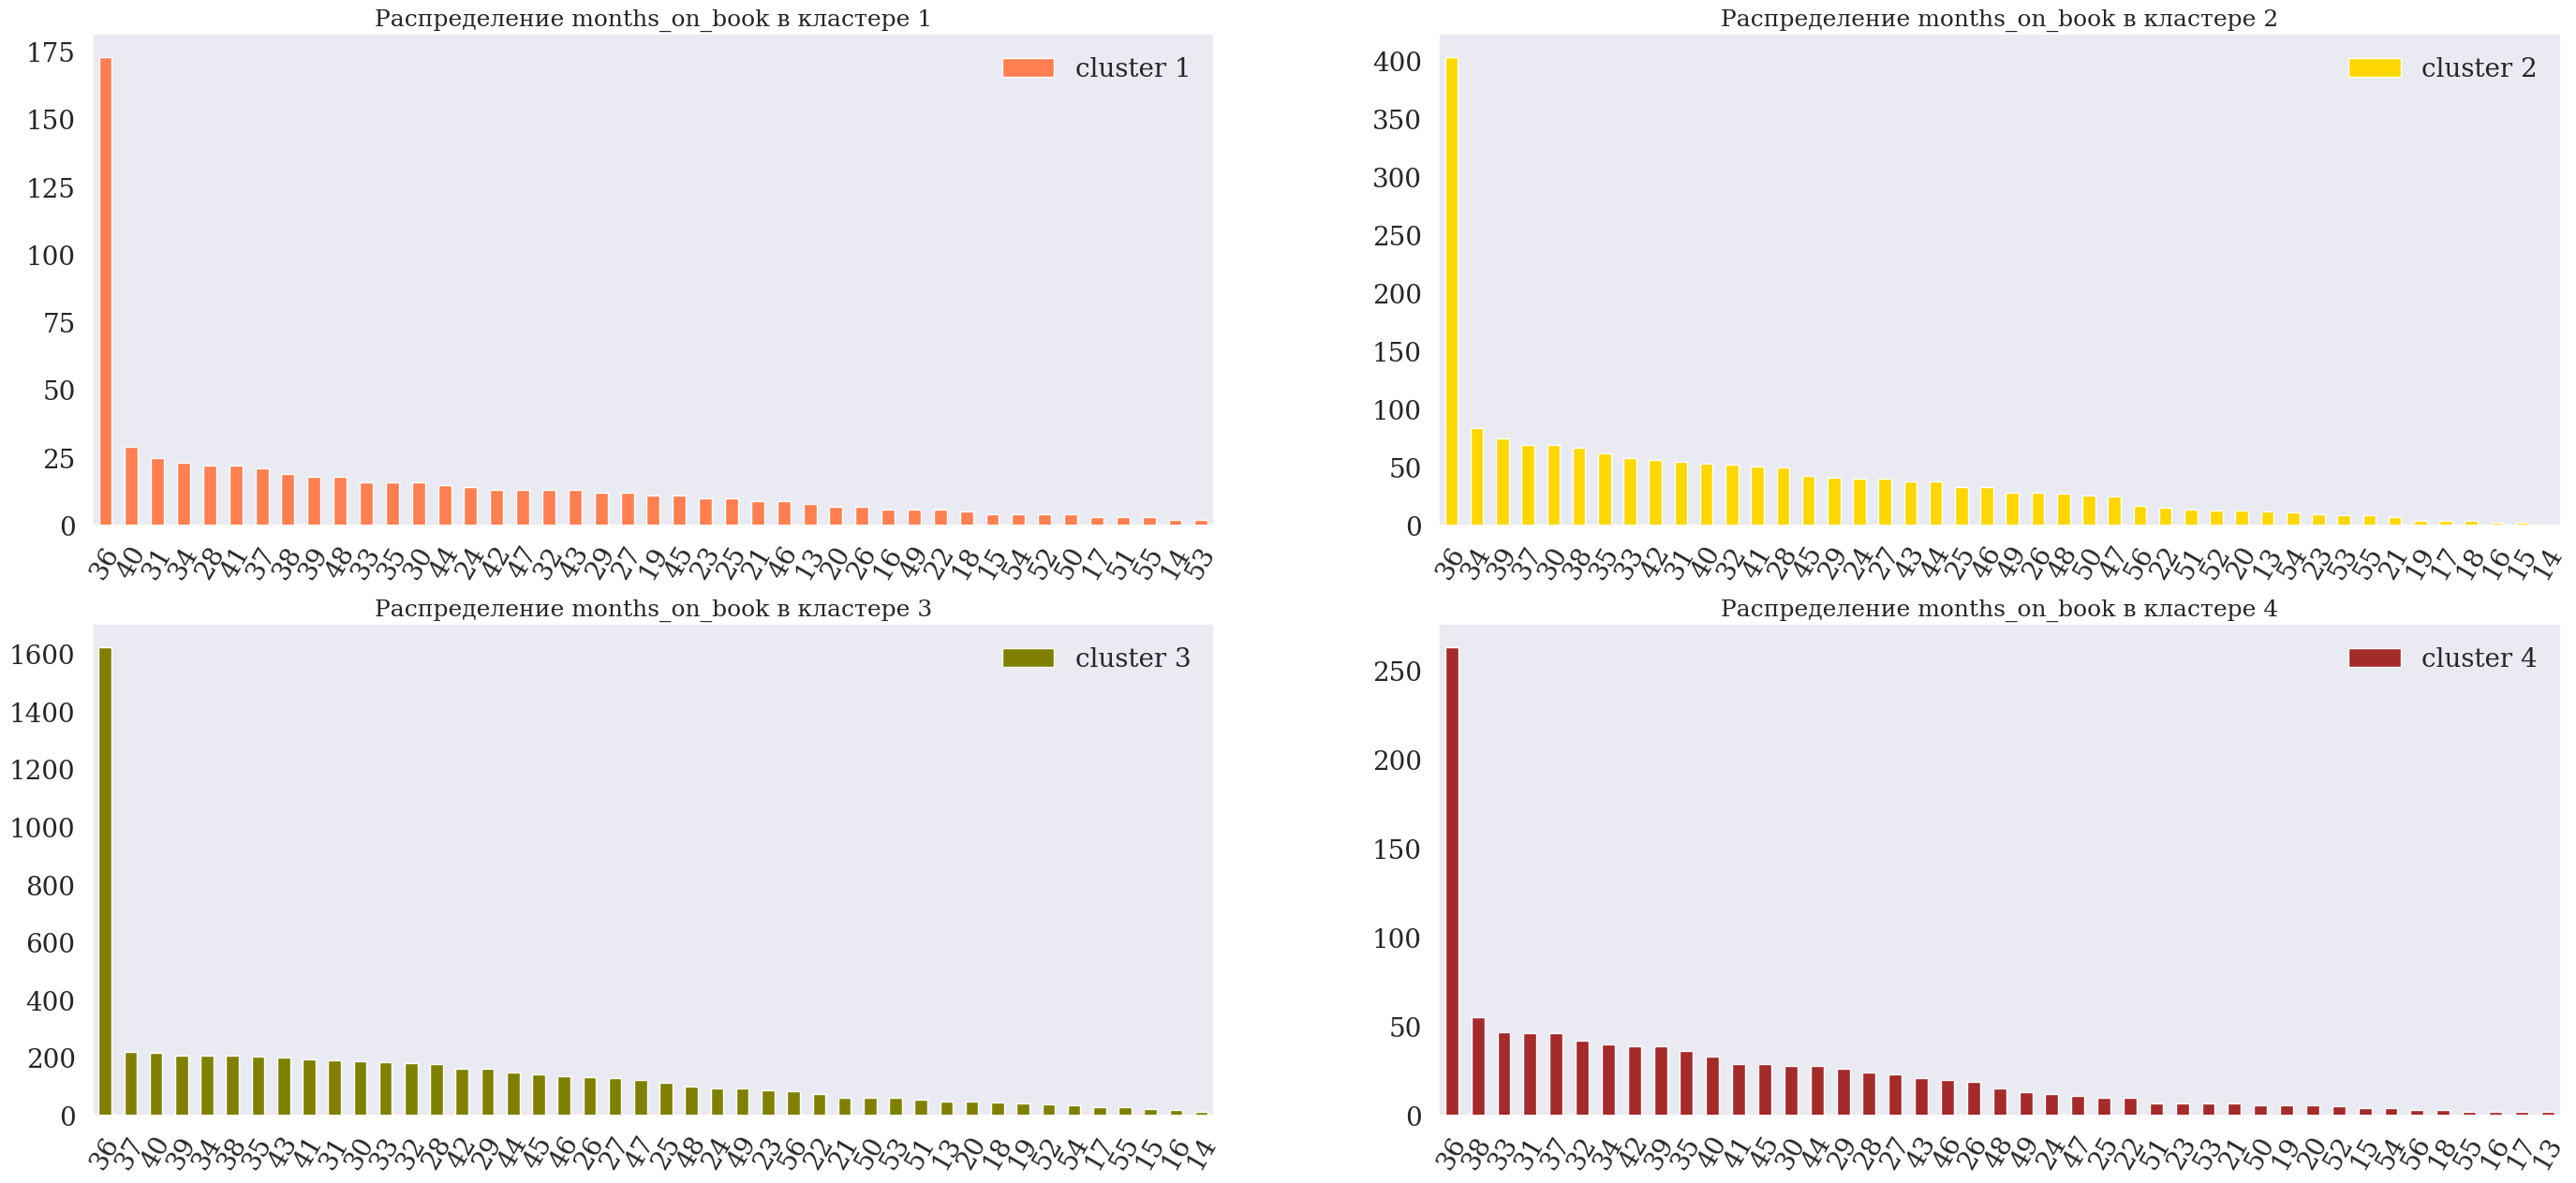

In [66]:
plot_clusters('months_on_book')

*Во всех кластерах +- одинаковое распределение периода взаимоотношений клиентов с банком*

### Посмотрим на распредление образования людей в кластерах

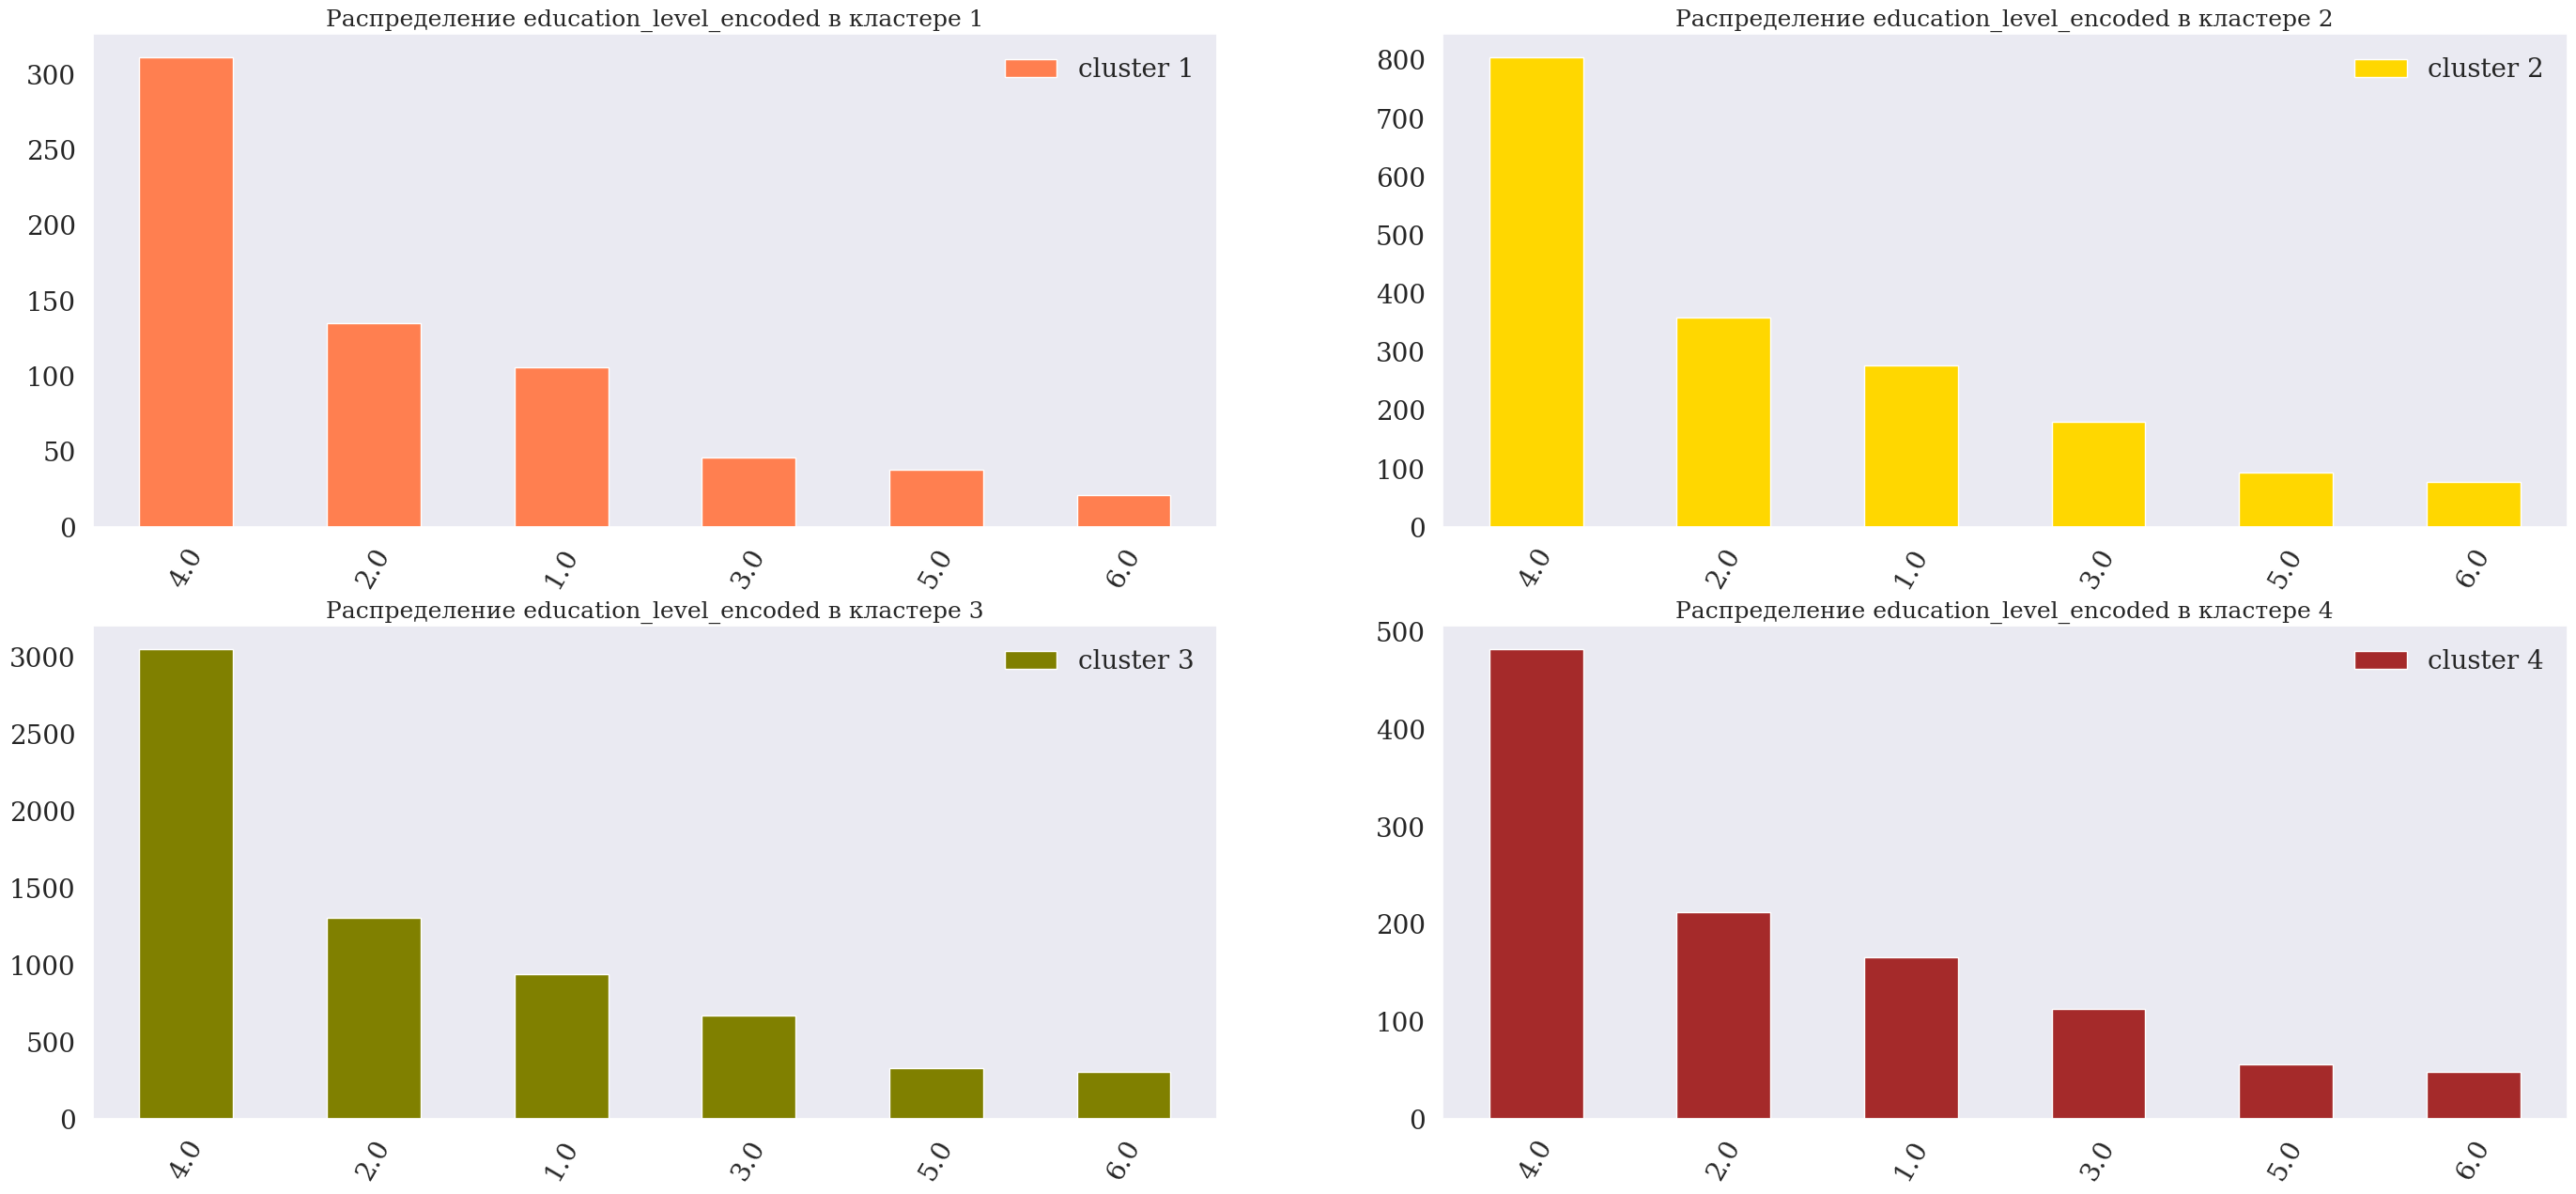

In [67]:
plot_clusters('education_level_encoded')

**Где:**
* 1 - Uneducated
* 2 - High School
* 3 - College
* 4 - Graduate
* 5 - Post-Graduate
* 6 - Doctorate

### Посмотрим на распредление звонков в банк с проблемами в кластерах

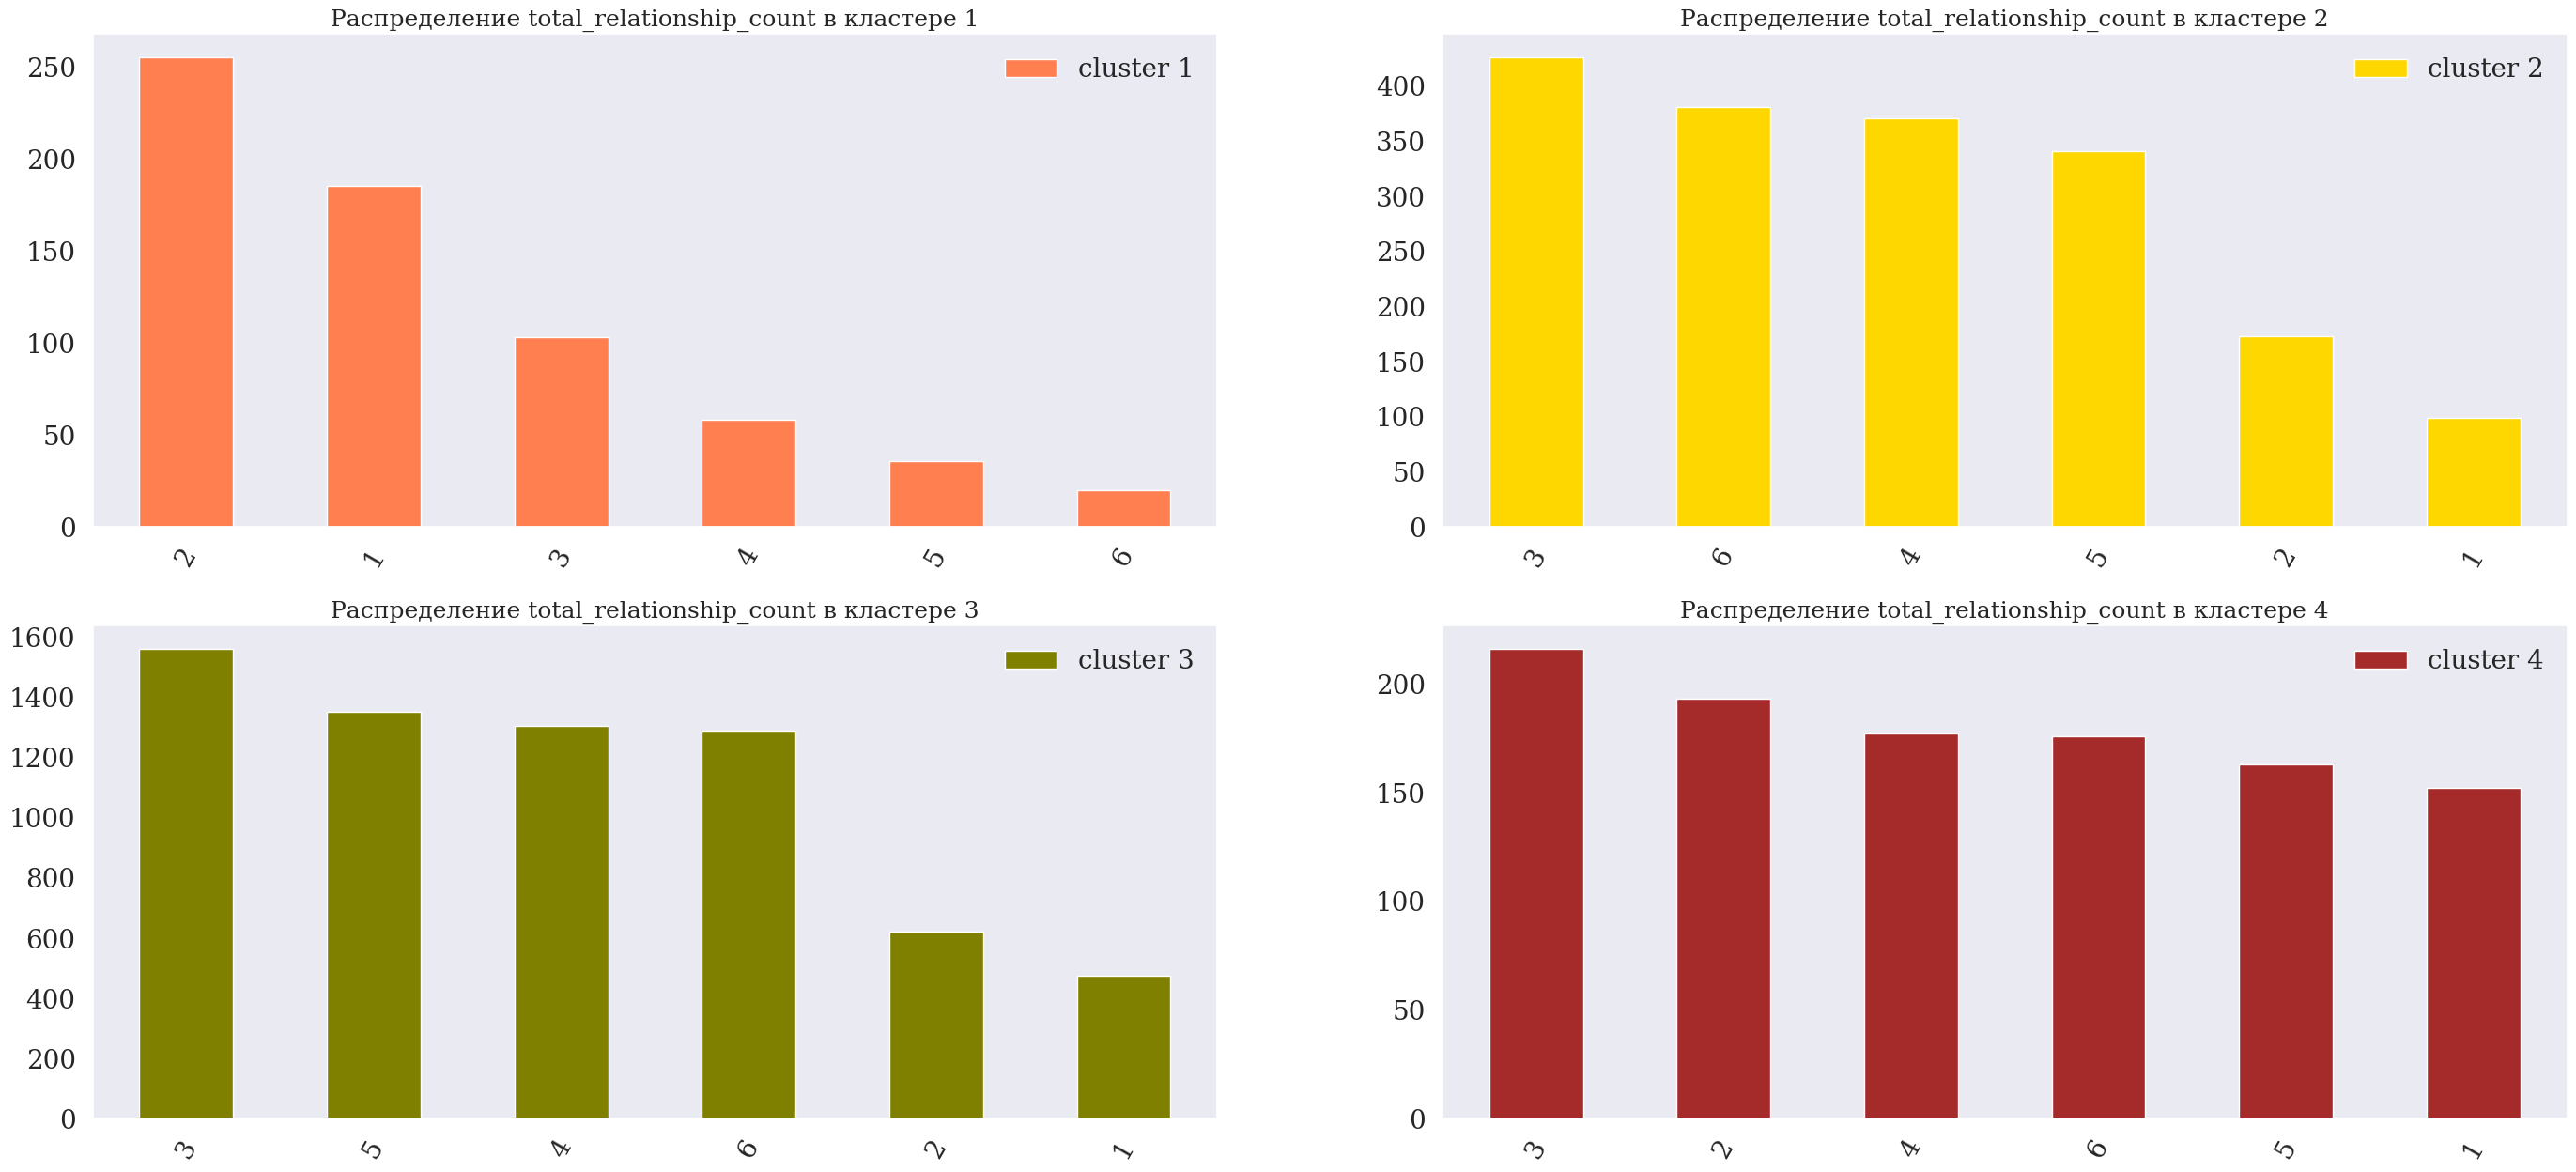

In [68]:
plot_clusters('total_relationship_count')

*Видно что в 4 кластере в основном с проблемами клиенты обращались в банк не больше двух раз*

### Посмотрим на распредление  Категория годового дохода владельца счета в кластерах

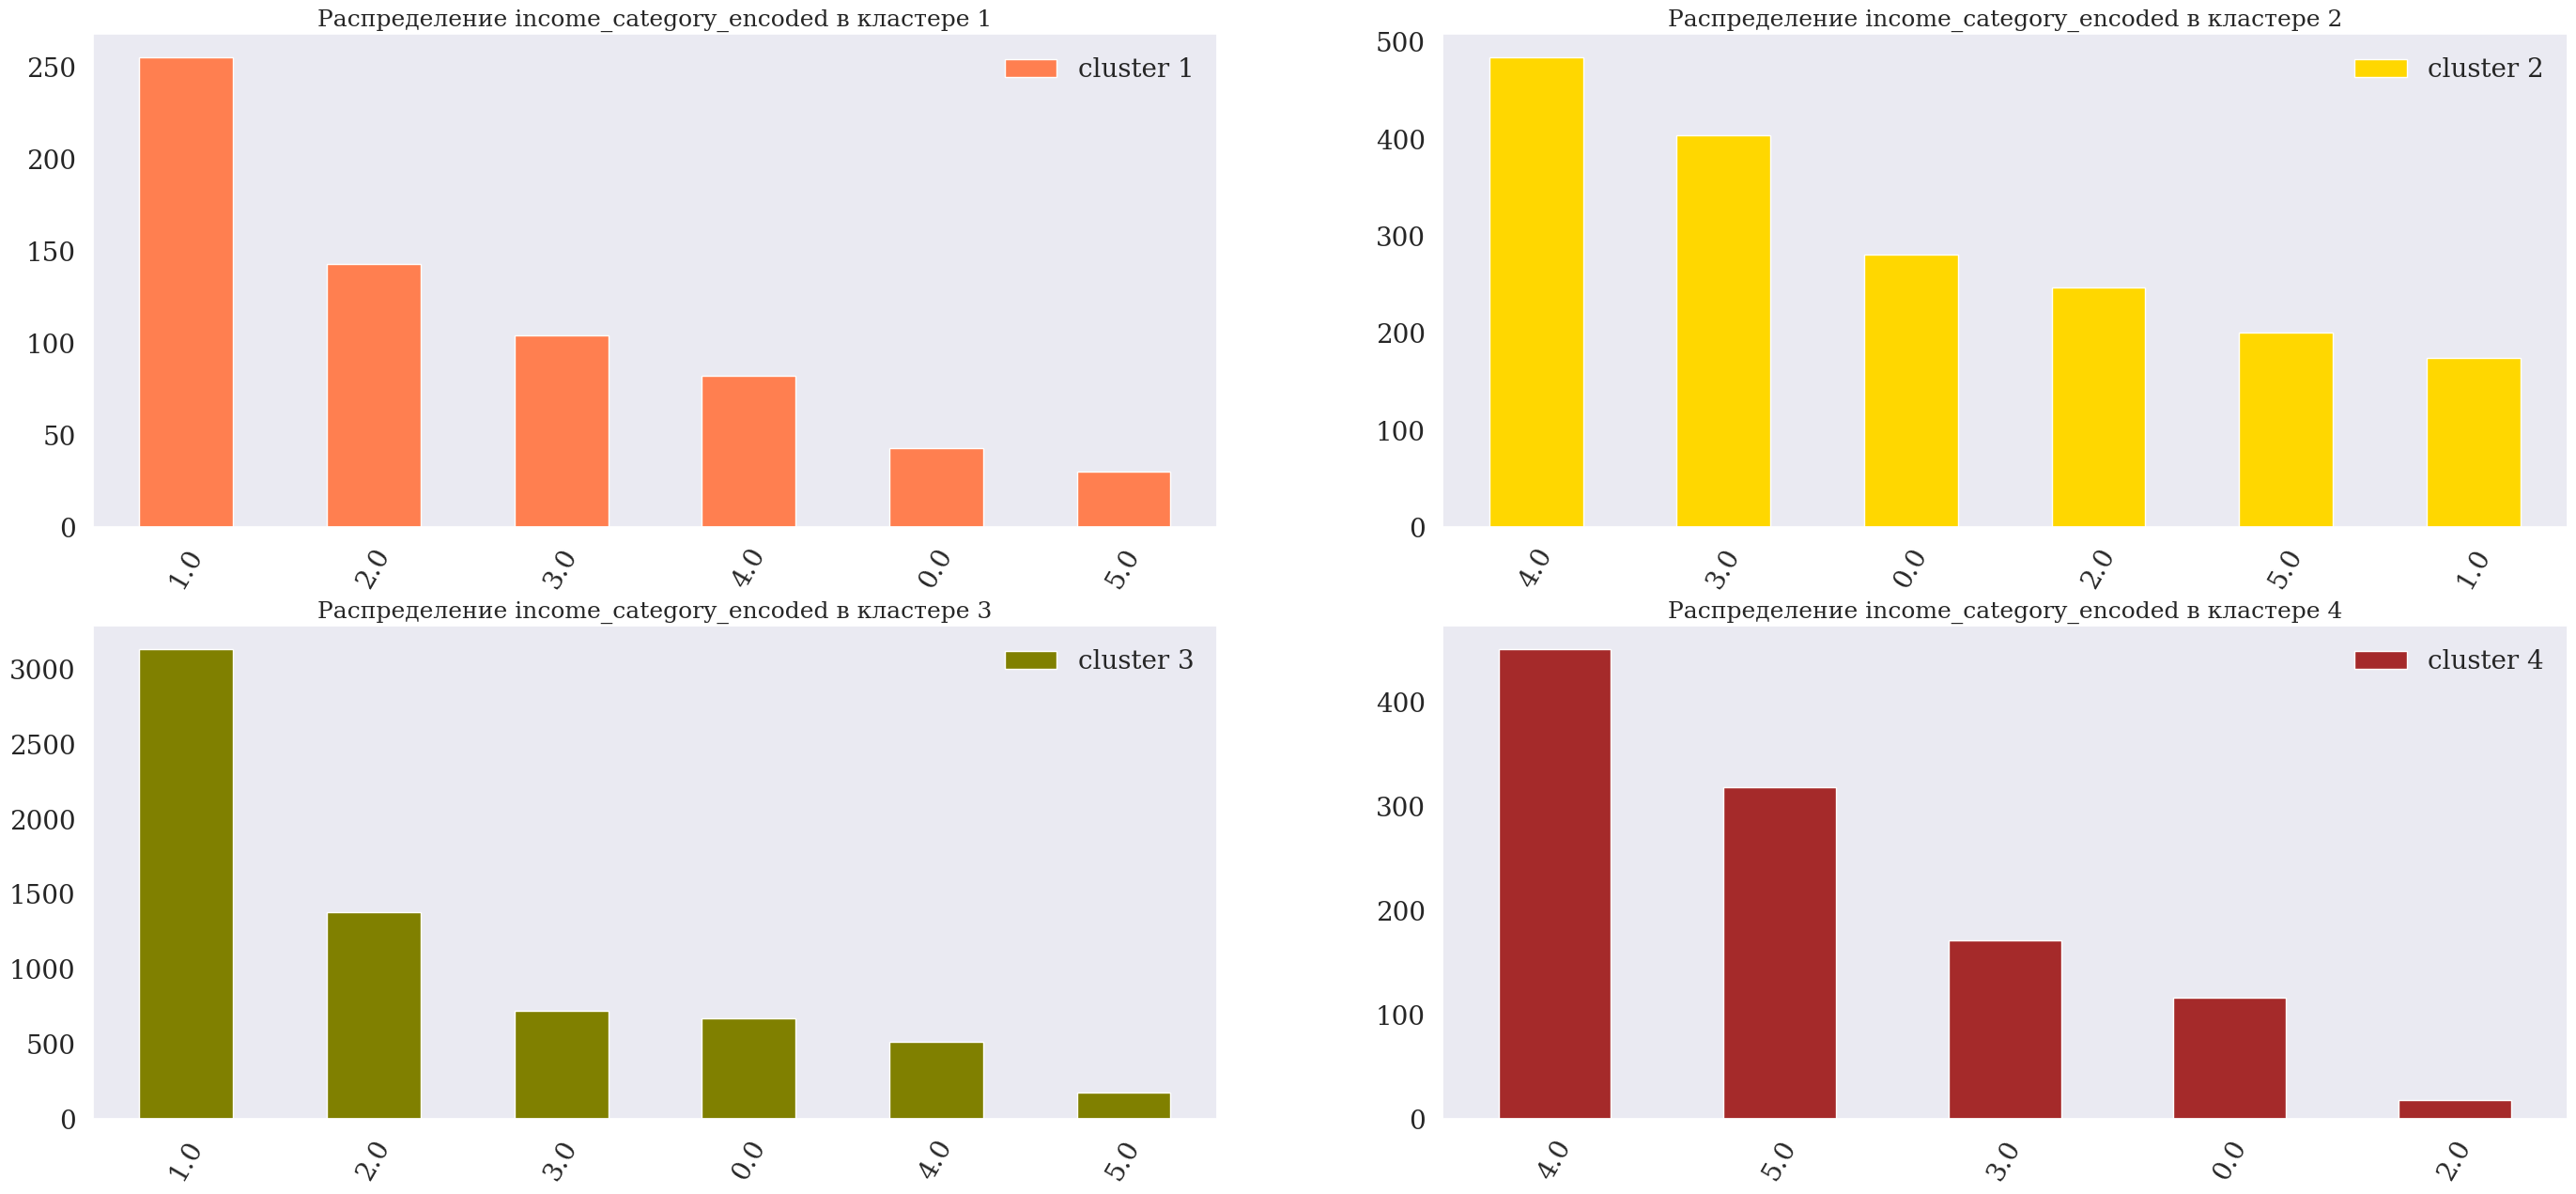

In [69]:
plot_clusters('income_category_encoded')

**Где:**

* 0 - abc (Не указывали)
* 1 - Less than $40K$

* 2 - $40K$ - $60K$ 
* 3 - $60K$ - $80K$
* 4 - $80K$ - $120K$
* 5 - $120K$ +

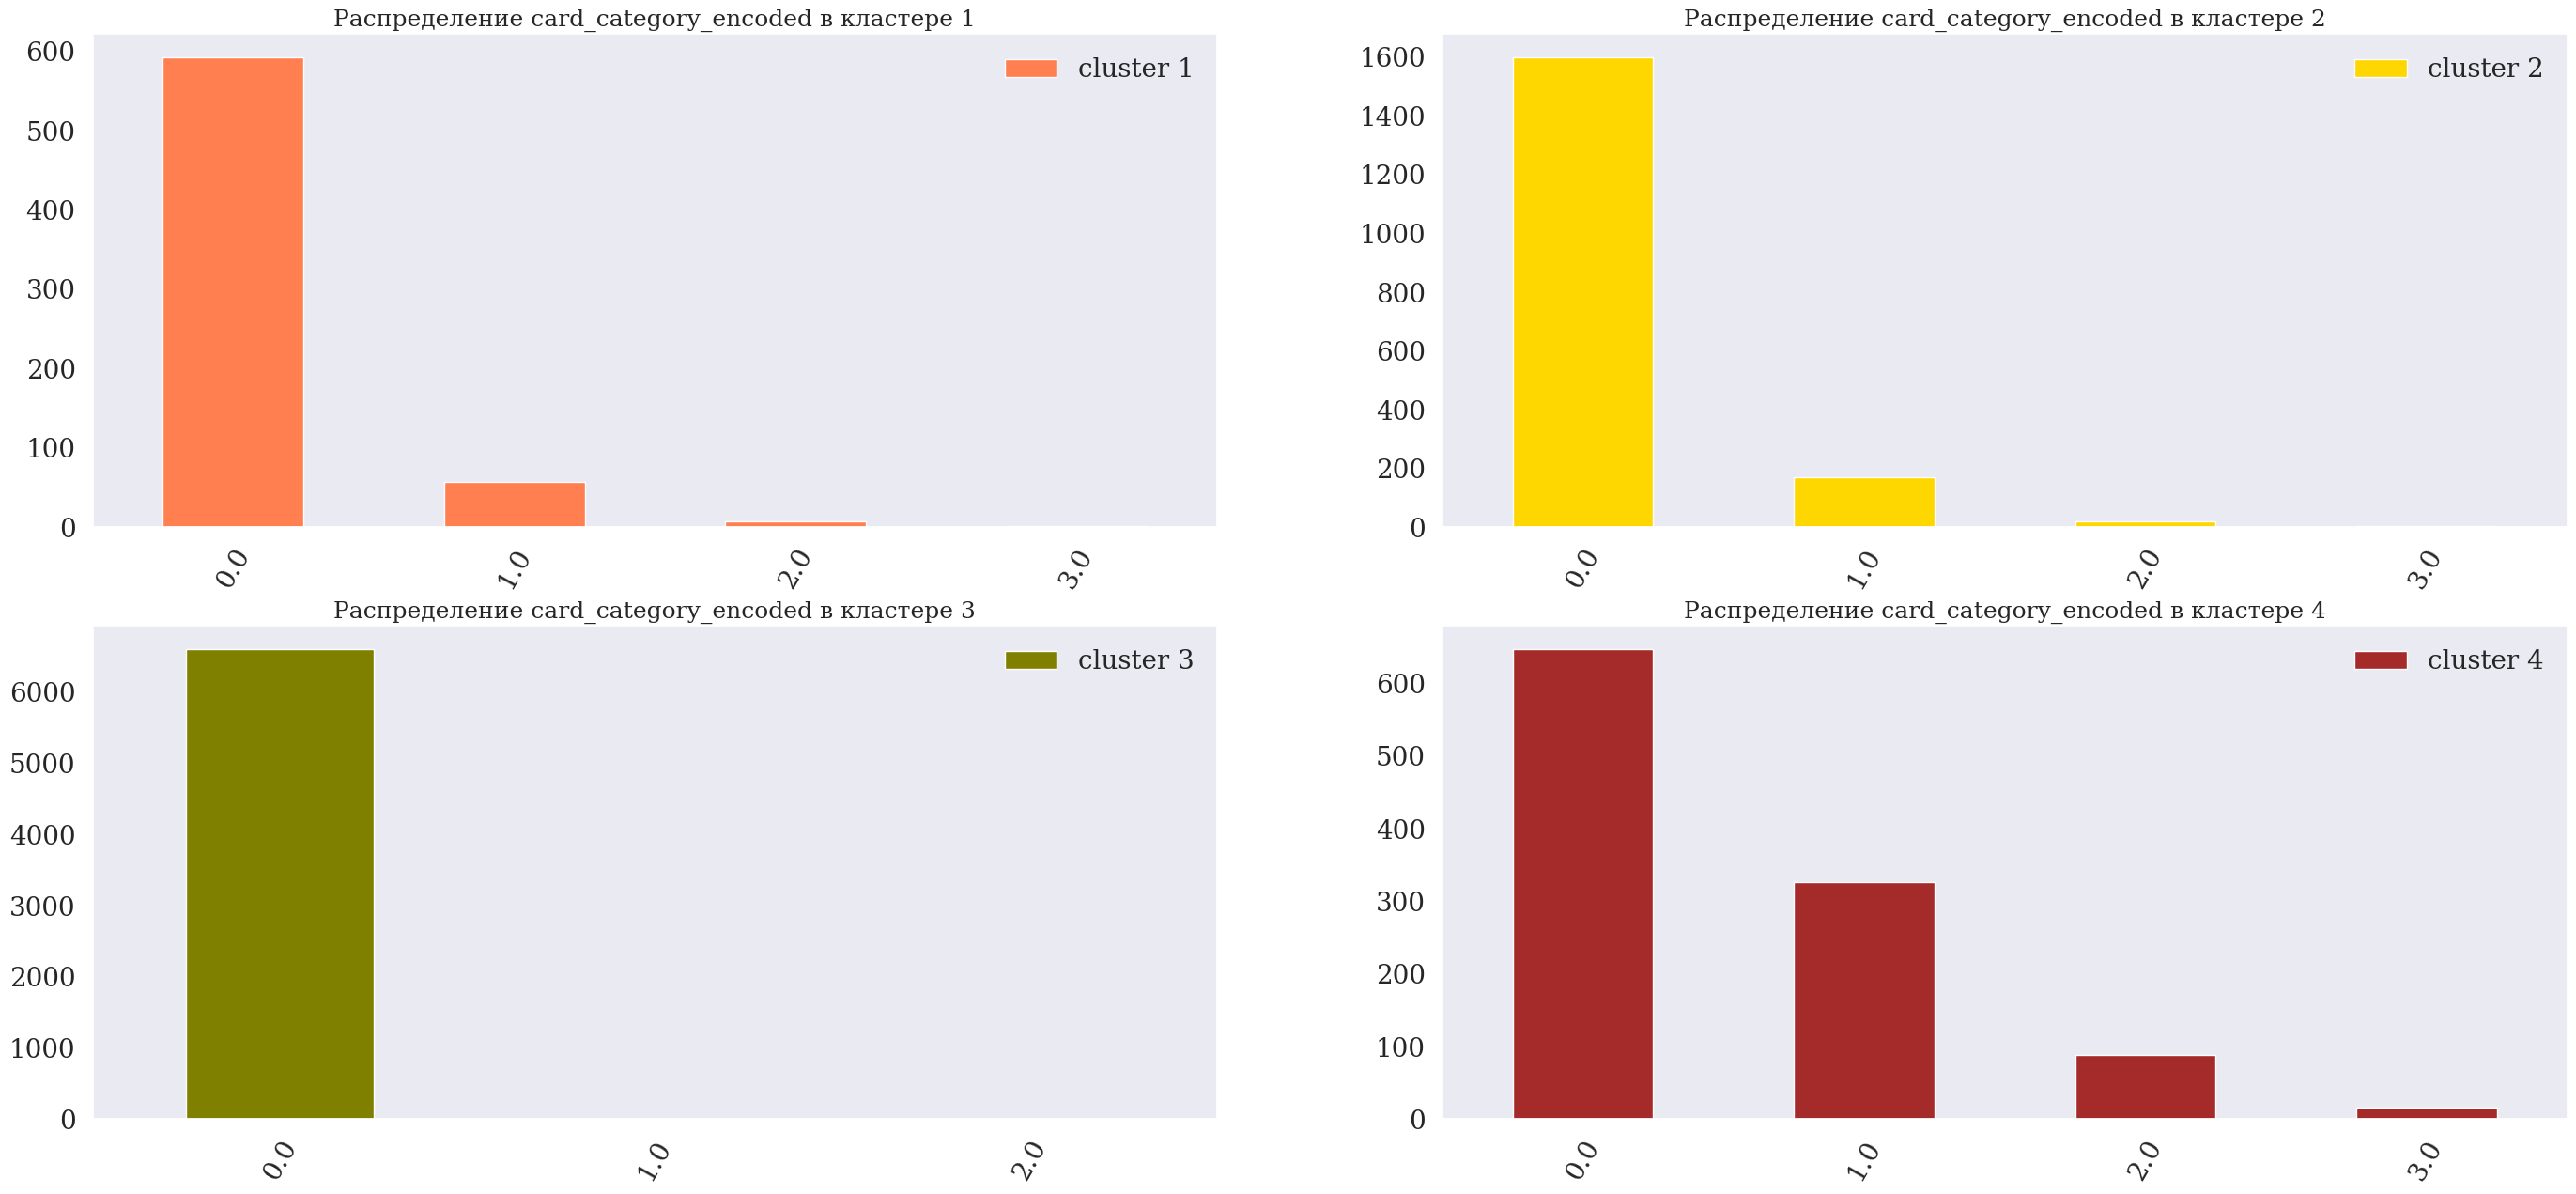

In [70]:
plot_clusters('card_category_encoded')

**Где:**
* 0 - Blue card
* 1 - Silver card
* 2 - Gold card
* 3 - Platinum card

### Выводы по кластерному анализу

**При анализе кластеров не было обнаружено значимых различий между группами клиентов, за исключением того, что в кластере 4 было очень мало случаев расторжения договора с банком.**


*Кластерный анализ - это метод разделения данных на группы (кластеры) по сходству характеристик. Это позволяет выявить определенные закономерности в поведении наших клиентов и выделить сегменты, которые имеют разный риск оттока. После проведения кластерного анализа мы можем перейти к созданию модели, которая будет прогнозировать вероятность оттока для каждого клиента*


---

## Построение модели машинного обучения

### Критерии оценки модели
#### Ситуации, когда модель дает неверные прогнозы

**Ложно-положительный:** модель считает, что клиент хочет уйти от банка, хотя на самом деле он не хочет.

**Ложно-отрицательный:** модель считает, что клиент не хочет уйти от банка, хотя на самом деле он хочет.

#### Какой сценарий более важен для банка?
Для банка более важен ложно-отрицательный сценарий, так как он означает утрату ценного клиента или актива, который мог бы приносить доход банку в дальнейшем.

####  Как уменьшить риск ложно-отрицательных прогнозов?
Банк заинтересован в том, чтобы иметь высокий уровень полноты (recall), который показывает, какая доля положительных случаев была правильно предсказана моделью. Чем выше полнота, тем меньше шанс пропустить клиента, который хочет уйти от банка. Поэтому банк должен стремиться к повышению полноты или уменьшению ложно-отрицательных прогнозов, то есть к определению истинно-положительных прогнозов (т.е. класс 1), чтобы банк мог удержать своих ценных клиентов, выявляя клиентов, которые находятся под риском ухода.

In [71]:
X = df.iloc[:, 1:-1]
y = df['attrition_flag']
y.value_counts(normalize=True) 

0   0.8393
1   0.1607
Name: attrition_flag, dtype: float64

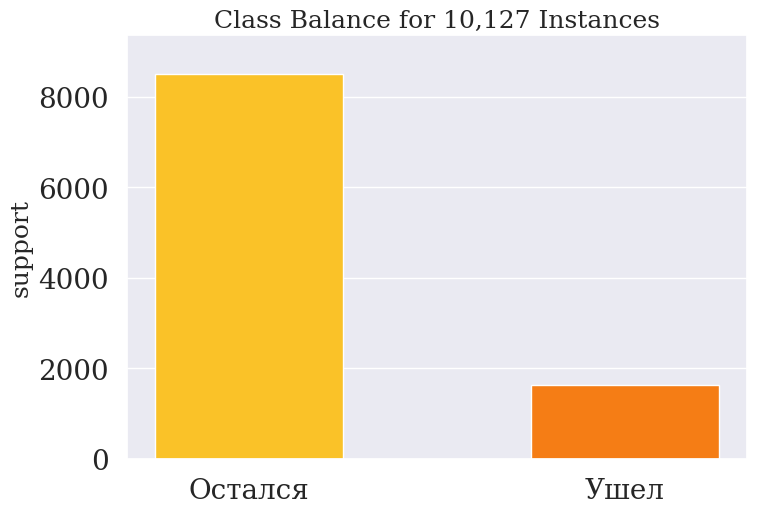

In [72]:
visualizer = ClassBalance(labels=['Остался', "Ушел"]).fit(y)
visualizer.show();

**у нас несбалансированные классы поэтому будем использовать стратификацию**

#### Hold-out
Метод hold-out представляет из себя простое разделение на train и test:

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    train_size=0.8,
    random_state=rand,
    shuffle=True,
    stratify=y,
)

# для подбора гиперпараметров 
X_train_set, X_val, y_train_set, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.1, 
    random_state=rand,
    shuffle=True,
    stratify=y_train
)

print(X_train_set.shape, X_val.shape, X_test.shape, X_test.shape)

(7290, 26) (811, 26) (2026, 26) (2026, 26)


### Данные готовы к построению модели
#### В качестве baseline выберем 

In [144]:
# Функция для вычисления и визуализации метрик классификации
def metrics_score(actual: List[int], predicted: List[int]) -> None:
    """
    Args:
    -------
        actual - список фактических меток классов
        predicted - список предсказанных меток классов
    
    Returns:
    -------
        None - функция ничего не возвращает, только выводит результаты на экран
    
    Пример использования:
    metrics_score(y_test, y_pred)
    """
    
    print(classification_report(actual, predicted))
    
    # Вычисляем матрицу ошибок, содержащую количество верных и неверных предсказаний для каждого класса
    skplt.metrics.plot_confusion_matrix(
        actual,
        predicted,
        figsize=(5, 4)
    )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    labels = ['Остается', "Ушел"]
    plt.xticks([0, 1], labels, rotation=0) 
    plt.yticks([0, 1], labels, rotation=0)
    
    plt.show()
    
    return None

In [145]:
def plot_curves(y_true: List[int], y_score: List[float]) -> None:
    """
    Рисует кривые точности-полноты, ROC-кривые и кривые точности-полноты и порога для бинарной классификационной.

    Args:
    -------
        y_true (list): Истинные бинарные метки тестового набора.
        y_score (list): Предсказанные вероятности пренадлижания к классу.

    Returns:
    --------
        None
    """

    # Вычисляем точки ROC-кривой и площадь под кривой (AUC)
    fpr, tpr, roc_thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    # Вычисляем точки кривой точности-полноты и площадь под кривой (AUC)
    precision, recall, pr_thresholds = precision_recall_curve(y_true, y_score)
    pr_auc = auc(recall, precision)

    fig, ax = plt.subplots(1, 3, figsize=(22, 12), dpi=80, facecolor='w', edgecolor='k')

    # Рисуем ROC-кривую на первой оси с помощью seaborn.lineplot
    sns.lineplot(x=fpr, y=tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', ax=ax[0])
    sns.lineplot(
        x=[0, 1], 
        y=[0, 1],
        linestyle='--',
        label='No skill',
        ax=ax[0]
    )
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('(ROC) Curve', fontsize=20)
    ax[0].legend(loc='upper left')

    # Рисуем кривую точности-полноты на второй оси с помощью seaborn.lineplot
    ax[1].step(
        recall,
        precision,
        color='b',
        alpha=1,
        where='post'
    )
    ax[1].fill_between(
        recall,
        precision,
        step='post',
        alpha=0.2,
        color='purple'
    )

    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Precision-Recall (PR) Curve', fontsize=20)
    ax[1].legend(['PR curve'])
    
    #Plot values of precisions, recalls, and thresholds
    ax[2].plot(pr_thresholds, precision[:-1], 'b--', label='precision')
    ax[2].plot(pr_thresholds, recall[:-1], 'g--', label = 'recall')
    ax[2].set_xlabel('Threshold')
    ax[2].set_title('(PR) and threshhold Curve', fontsize=20)
    ax[2].legend(loc='upper right')

    fig.suptitle('Кривые для бинарной классификации', fontsize=30)

    plt.show()
    
    return None
    

### Простая логистическая регресиия

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       681
           1       0.62      0.38      0.47       130

    accuracy                           0.86       811
   macro avg       0.75      0.67      0.70       811
weighted avg       0.85      0.86      0.85       811



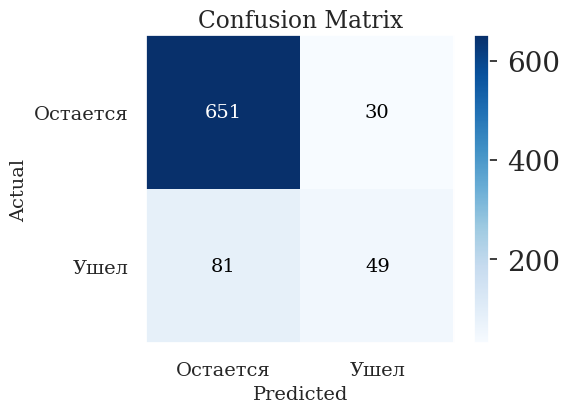

In [76]:
lg = LogisticRegression(random_state=rand)
lg.fit(X_train_set, y_train_set)

y_pred_proba = lg.predict_proba(X_val)
y_pred = lg.predict(X_val)
metrics_score(y_val, y_pred);

Это простая базовая модель с дефолтными параметрами
**Наблюдения:**

- Модель достигает точности 90% на валидационном наборе данных.
- Однако recall для этой модели составляет всего около 46% для класса 1.
- Поскольку полнота низкая, эта модель не будет хорошо работать при определении тех клиентов, которые склонны уходить из банка, что означает, что она не поможет эффективно снизить уровень оттока.
- Как мы видим из матрицы ошибок, эта модель не обнаруживает большинство клиентов, которые уйдут.


***
Так как самая простая модель выдала точность в районе 90% есть смылс докрутить модель до 100% 

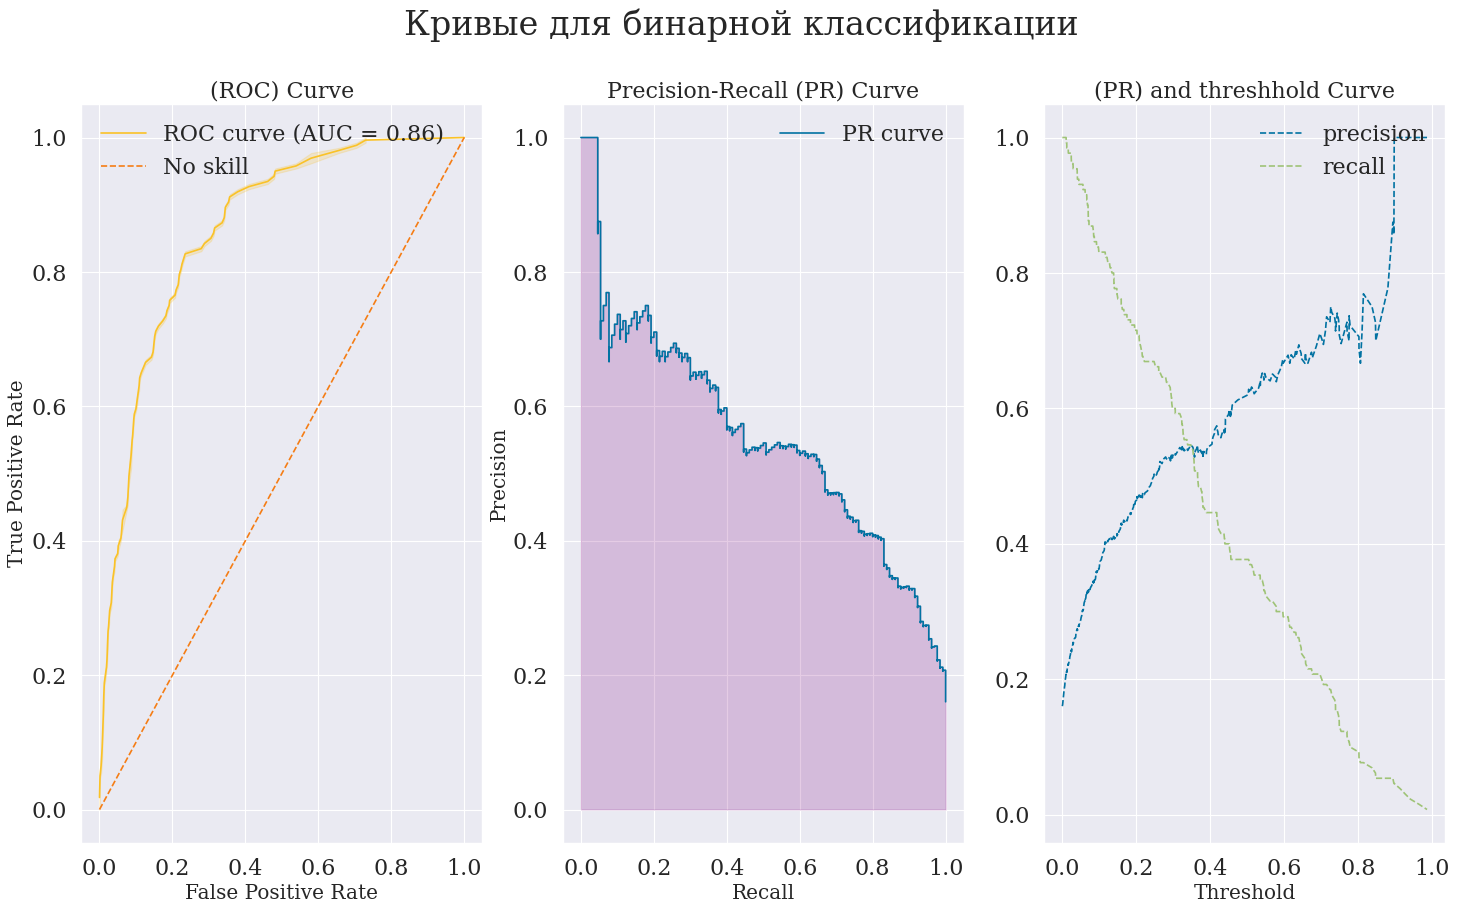

In [77]:
plot_curves(y_true=y_val, y_score=y_pred_proba[:, 1])

### tuning Log Reg

In [78]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.5, 0.1, 1.0, 5, 50, 10.0, 100.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=10
)

grid_search.fit(X_train_set, y_train_set)

In [79]:
print('Лучшие параметры:', grid_search.best_params_)
print('Лучшая оценка качества:', grid_search.best_score_)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       681
           1       0.68      0.50      0.58       130

    accuracy                           0.88       811
   macro avg       0.79      0.73      0.75       811
weighted avg       0.87      0.88      0.87       811



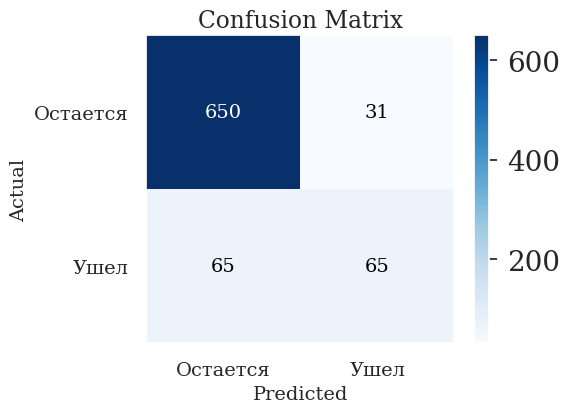

In [80]:
lg = LogisticRegression(penalty='l2', solver='newton-cg', l1_ratio=0, C=100)
lg.fit(X_train_set, y_train_set)

y_pred_proba = lg.predict_proba(X_val)
y_pred = lg.predict(X_val)
metrics_score(y_val, y_pred);

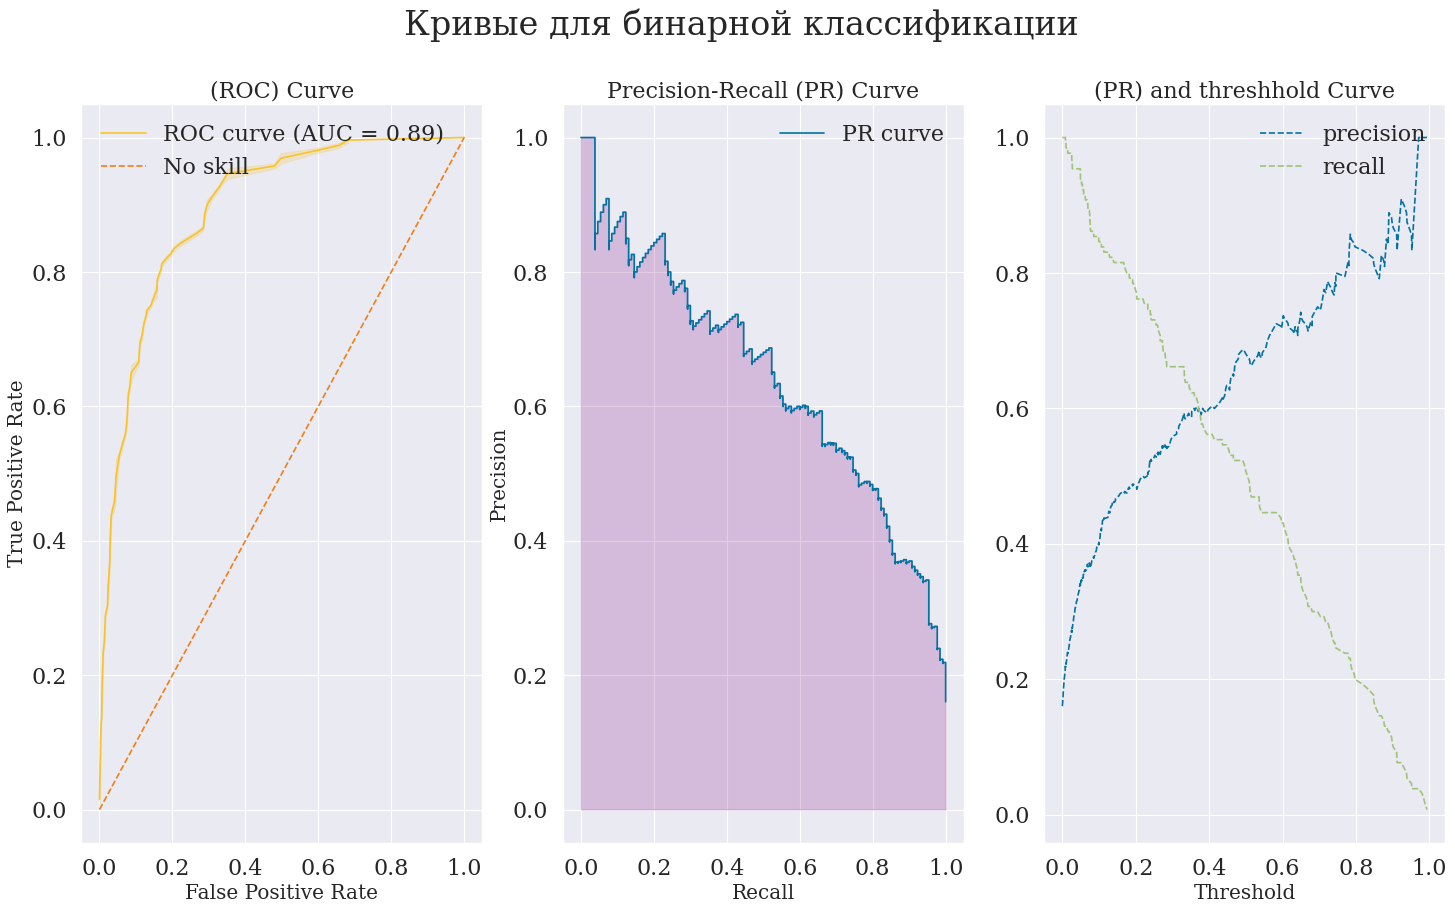

In [81]:
plot_curves(y_true=y_val, y_score=y_pred_proba[:, 1])


In [82]:
precision, recall, pr_thresholds = precision_recall_curve(y_val, y_pred_proba[:, 1])

for i in np.arange(len(pr_thresholds)):
    if precision[i] == recall[i]:
        print(f'Оптимальный порог принятия решения: {pr_thresholds[i]}')
         

Оптимальный порог принятия решения: 0.3712112392633981


### Калибровка модели логистической регрессии с порогом 0.337

Accuracy до каллибровки: 0.8988153998025666
Brier score до каллибровки: 0.0690469707220171
Accuracy после каллибровки: 0.9032576505429417
Brier score после каллибровки: 0.06998112463140088


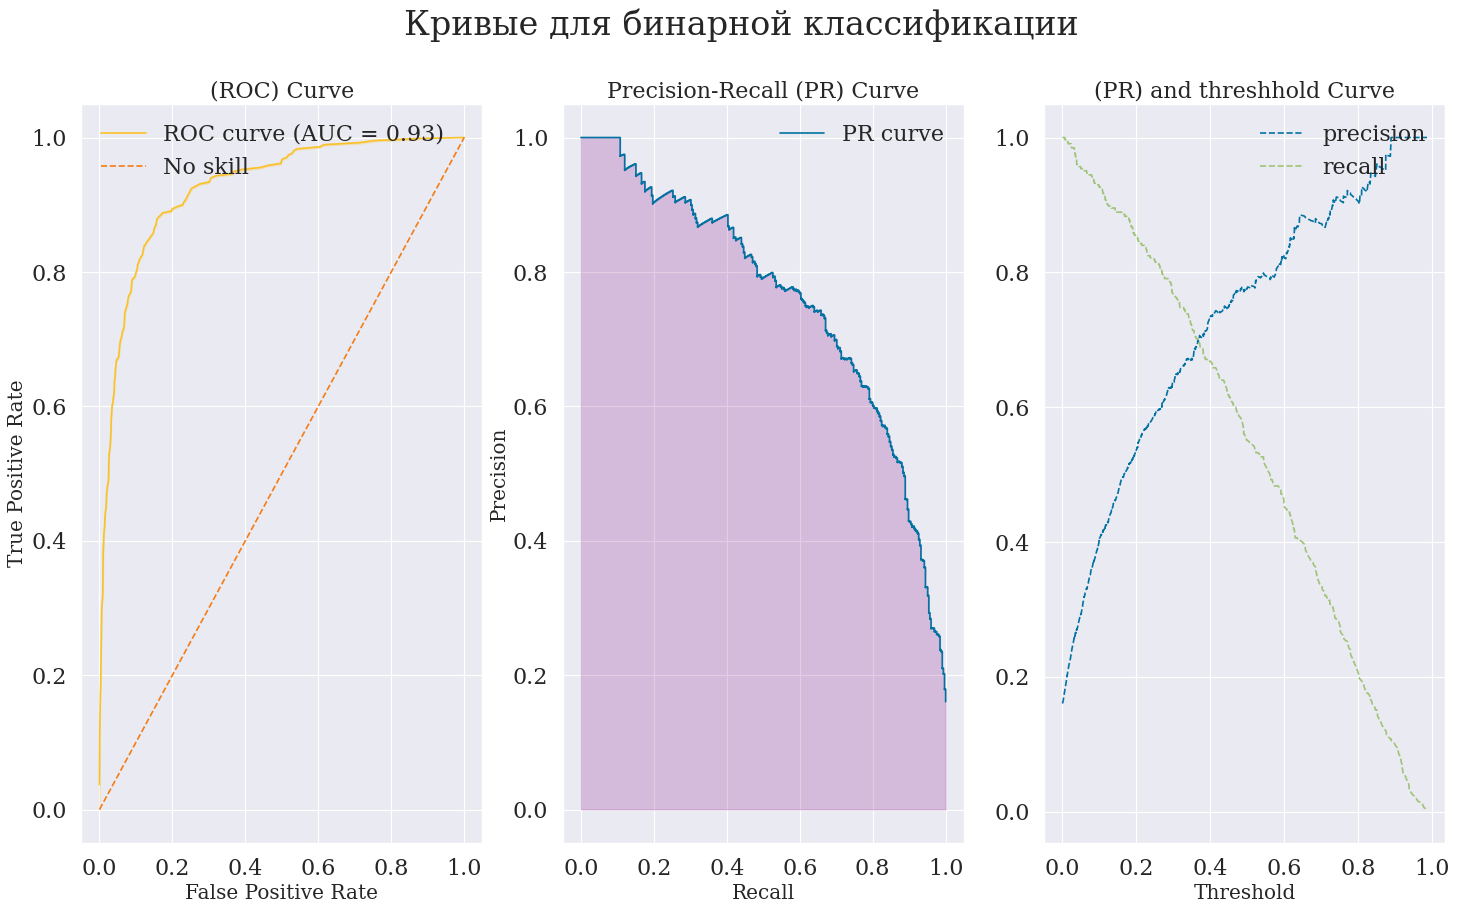

In [83]:
probs_calib = lg.predict_proba(X_val)[:, 1]
probs_test = lg.predict_proba(X_test)[:, 1]

# Вычисляем метрики качества до калибровки
accuracy_before = accuracy_score(y_test, probs_test > 0.337)
brier_before = brier_score_loss(y_test, probs_test)

# Создаем и обучаем объект калибровки с изотоническим методом
calibrator = CalibratedClassifierCV(lg, method="sigmoid", cv="prefit")
calibrator.fit(X_val, y_val)

# Получаем калиброванные вероятности на тестовых данных
probs_calibrated = calibrator.predict_proba(X_test)

# Вычисляем метрики качества после калибровки
accuracy_after = accuracy_score(y_test, probs_calibrated[:, 1] > 0.37)
brier_after = brier_score_loss(y_test, probs_calibrated[:, 1])

# Выводим результаты
print("Accuracy до каллибровки:", accuracy_before)
print("Brier score до каллибровки:", brier_before)
print("Accuracy после каллибровки:", accuracy_after)
print("Brier score после каллибровки:", brier_after)

plot_curves(y_true=y_test, y_score=probs_calibrated[:, 1]);

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.78      0.55      0.65       325

    accuracy                           0.90      2026
   macro avg       0.85      0.76      0.79      2026
weighted avg       0.90      0.90      0.90      2026



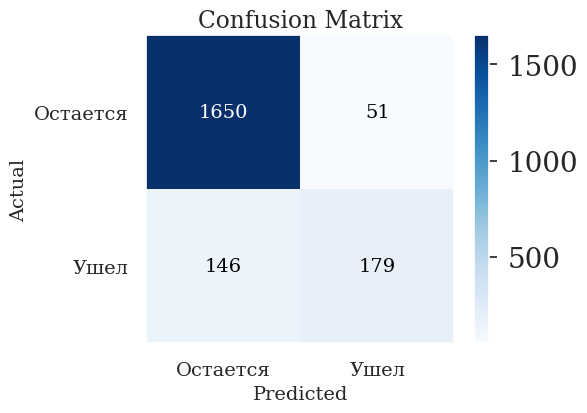

In [84]:
y_cal_pred = calibrator.predict(X_test)
metrics_score(actual=y_test, predicted=y_cal_pred)

### Выводы по логистической регрессии

**Мы продемонстрировали, как можно улучшить качество модели логистической регрессии с помощью поиска по сетке гиперпараметров и калибровки предсказанных вероятностей. По сравнению с первоначальной моделью, мы достигли более высокой точности и более низкого значения Brier score, что свидетельствует о более точных и калиброванных вероятностях.**

Ключевую метрику Recall и метрику AUC мы ощутимо подняли:
* Recall:
    `0.42 --> 0.59`
* AUC:
    `0.88 --> 0.93`
    
Дальнейшая настройка модели может считаться бесполезной и особого прироста прогноза нам не даст

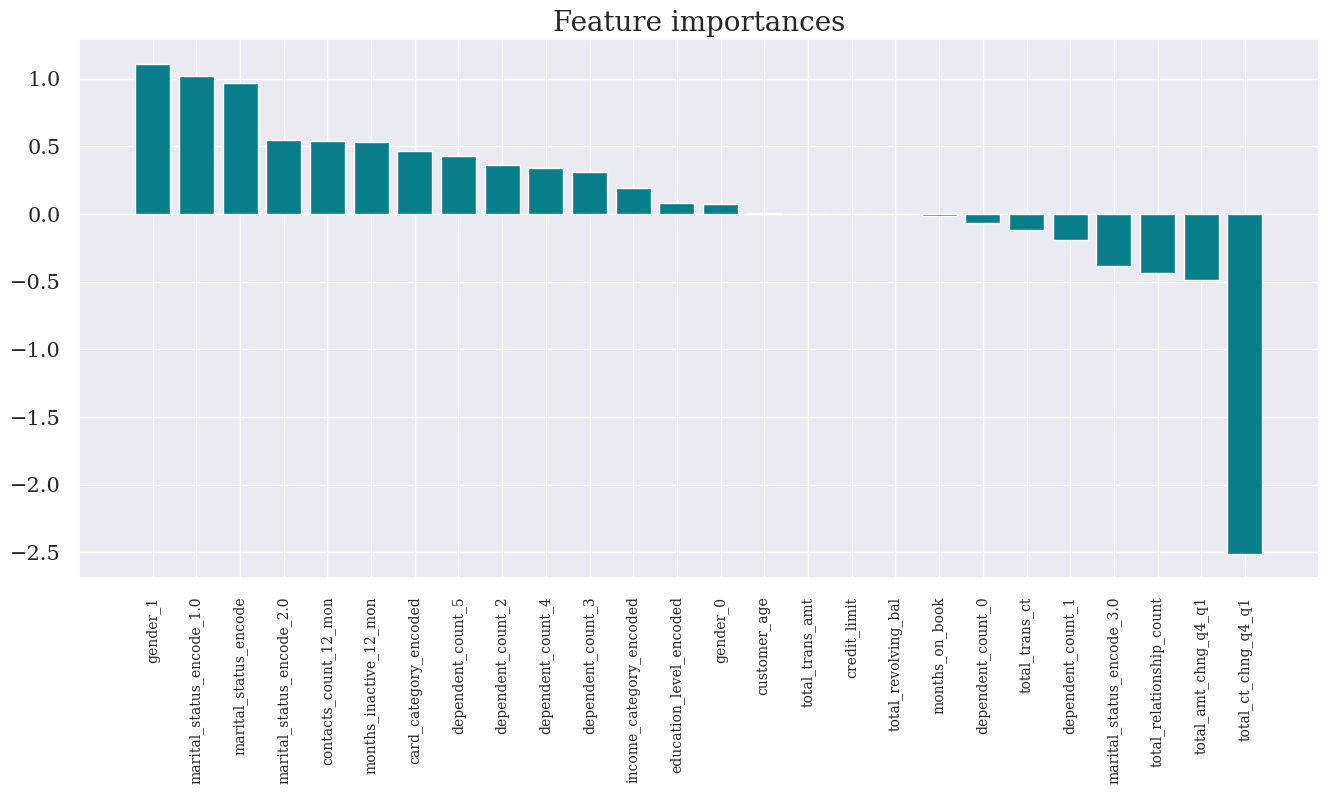

In [85]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lg.coef_[0]
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(16, 7))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(rotation='vertical', fontsize=10)
plt.yticks(fontsize=15)
plt.show();

In [86]:
cols=X_train_set.columns

coef_lg=lg.coef_

odds = np.exp(lg.coef_[0]) 
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

odds
gender_1                  3.0326
marital_status_encode_1.0 2.7738
marital_status_encode     2.6334
marital_status_encode_2.0 1.7326
contacts_count_12_mon     1.7116
months_inactive_12_mon    1.7045
card_category_encoded     1.5944
dependent_count_5         1.5389
dependent_count_2         1.4360
dependent_count_4         1.4026
dependent_count_3         1.3642
income_category_encoded   1.2123
education_level_encoded   1.0831
gender_0                  1.0797
customer_age              1.0111
total_trans_amt           1.0005
credit_limit              1.0000
total_revolving_bal       0.9990
months_on_book            0.9875
dependent_count_0         0.9360
total_trans_ct            0.8888
dependent_count_1         0.8272
marital_status_encode_3.0 0.6813
total_relationship_count  0.6444
total_amt_chng_q4_q1      0.6160
total_ct_chng_q4_q1       0.0813


**Наблюдения:**

**Признаки, которые положительно влияют на уровень оттока:**

- `gender_1`
- `marital_status_encode_1.0`
- `marital_status_encode`	
- `marital_status_encode_2.0`
- `contacts_count_12_mon`	
- `months_inactive_12_mon`

**Признаки, которые слабо влияют на уровень оттока:**

- `total_ct_chng_q4_q1`	
- `total_amt_chng_q4_q1`
- `total_relationship_count`
- `marital_status_encode_3.0`


**Наблюдения:**

- Признак **gender_1** имеет наибольший положительный коэффициент, что означает, что если клиент имеет значение 1 для этого признака (то есть является женщиной), то его шансы принадлежать к положительному классу (то есть быть ушедшим клиентом) увеличиваются в 3.03 раза по сравнению с клиентом, который имеет значение 0 для этого признака, при прочих равных условиях.
- Признак **marital_status_encode_1.0** имеет второй по величине положительный коэффициент, что означает, что если клиент имеет значение 1 для этого признака (то есть является холостым), то его шансы принадлежать к положительному классу увеличиваются в 2.77 раза по сравнению с клиентом, который имеет значение 0 для этого признака (то есть не является холостым), при прочих равных условиях.
- Признак **total_ct_chng_q4_q1** имеет наименьший коэффициент, что означает, что если клиент имеет большее значение для этого признака (то есть большее изменение количества транзакций в четвертом квартале по сравнению с первым), то его шансы принадлежать к положительному классу уменьшаются на 0.08 раза по сравнению с клиентом, который имеет меньшее значение для этого признака, при прочих равных условиях.
- Признак **total_relationship_count** имеет второй по величине наименьший коэффициент, что означает, что если клиент имеет большее значение для этого признака (то есть большее количество продуктов банка), то его шансы принадлежать к положительному классу уменьшаются в 0.64 раза по сравнению с клиентом, который имеет меньшее значение для этого признака, при прочих равных условиях. Такие клиенты могут быть более финансово стабильными и активно инвестировать в различные услуги, предоставляемые банком.
- Клиенты, принадлежащие к доходной группе - зарабатывающие менее 40 тысяч долларов, являются теми, кто больше всего уходит.


- Модель также отражает обратную связь между **Total_Relationship_Count и оттоком** - предполагая, что клиенты, которые используют больше количество продуктов от банка, являются теми, кто меньше всего уходит, такие клиенты могут быть более финансово стабильными и активно инвестировать в различные услуги, предоставляемые банком.
- **Клиенты, которые делают больше транзакций с банком, имеют меньший шанс на отток**, вывод, который имеет смысл, так как меньшее количество транзакций приводит к большему оттоку.
- Из **Total_Ct_Chng_Q4_Q1** и **Total_Amt_Chng_Q4_Q1 видно**, что клиенты, которые не ушли, показали меньшую изменчивость по сравнению с Q4 по Q1 по сравнению с теми, кто ушел.


### Decision tree classifier 

Перейдем к деревьям. В отличие от логистической регрессии, дерево решений способно обрабатывать категориальные данные и находить сложные нелинейные связи, поэтому мы переключаемся на него. Но у деревьев есть недостаток: из-за дисбаланса классов деревья могут давать смещенные оценки классам.

In [87]:
# Обучим базовую модель 
dt = DecisionTreeClassifier(random_state=rand)

dt.fit(X_train_set, y_train_set);

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       681
           1       0.78      0.81      0.79       130

    accuracy                           0.93       811
   macro avg       0.87      0.88      0.88       811
weighted avg       0.93      0.93      0.93       811



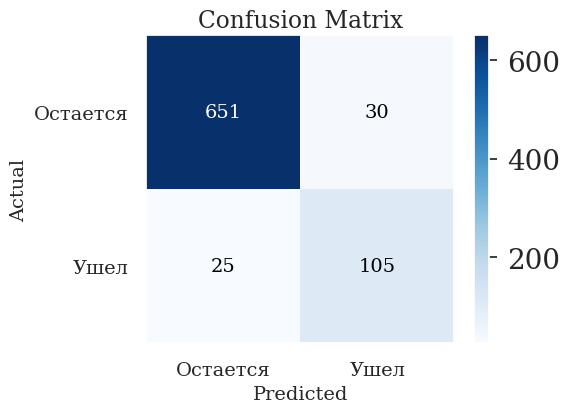

In [88]:
y_pred_proba = dt.predict_proba(X_val)
y_pred = dt.predict(X_val)
metrics_score(y_val, y_pred);

Даже с подбором гиперпараметров и откалиброванная логистическая регрессия плохо справляется с данными, в которых много категориальных признаков, в отличие от базового дерева. 

In [89]:
dt = DecisionTreeClassifier()


param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'splitter': ['best', 'random'], 
    'max_depth': randint(5, 30), 
    'min_samples_split': randint(50, 500), 
    'min_samples_leaf': randint(40, 500), 
    'max_features': ['auto', 'sqrt', 'log2', None], 
    'class_weight': ['balanced', None]
}

# Создаем экземпляр случайного поиска
random_search = RandomizedSearchCV(
    dt,
    param_distributions=param_dist, 
    n_iter=20000, 
    cv=5, 
    scoring='roc_auc',
    random_state=rand,
    verbose=10
)

# Запускаем поиск на данных
random_search.fit(X_train_set, y_train_set)

print('Лучшие параметры:', random_search.best_params_)
print('Лучшее качество:', random_search.best_score_)

In [130]:
@interact
def plot_tree(
    crit: str = ['gini', 'entropy', 'log_loss'],                                  # критерий качества разбиения
    split: str = ['best', 'random'],                                              # стратегия выбора разбиения
    depth: int = IntSlider(min=1, max=30, value=2, continuous_update=False),      # максимальная глубина дерева
    min_split: int = IntSlider(min=2, max=300, value=2, continuous_update=False), # минимальное число объектов для разбиения узла
    min_leaf: int = IntSlider(min=1, max=500, value=1, continuous_update=False)   # минимальное число объектов в листе
): 
    
    estimator = DecisionTreeClassifier(
        random_state=rand,
        criterion=crit, 
        splitter=split, 
        min_samples_split=min_split,
        max_depth=depth,
        min_samples_leaf=min_leaf
    )
    
    estimator.fit(X_train_set, y_train_set)
    y_predict_train = estimator.predict_proba(X_train_set)[:, 1]
    y_predict_test = estimator.predict_proba(X_test)[:, 1]
    
    print("Точность дерева решений на обучающих данных: {:.3f}".format(roc_auc_score(y_true=y_train_set, y_score=y_predict_train)))
    print("Точность дерева решений на тестовых данных: {:.3f}".format(roc_auc_score(y_true=y_test, y_score=y_predict_test)))
    
    graph = Source(
        export_graphviz(
            estimator,
            out_file=None,
            feature_names=X_train_set.columns,
            class_names=['stayed', 'quit'], 
            filled=True
        )
    )
    

    display(Image(data=graph.pipe(format='png')))

In [91]:
# Обучим после подбора гиперпараметров 

dt = DecisionTreeClassifier(
    criterion='log_loss',
    splitter='best',
    min_samples_leaf=40,
    min_samples_split=81,
    max_depth=22,
    class_weight='balanced',
    random_state=rand
)

dt.fit(X_train, y_train);

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1701
           1       0.65      0.92      0.76       325

    accuracy                           0.91      2026
   macro avg       0.82      0.91      0.85      2026
weighted avg       0.93      0.91      0.91      2026



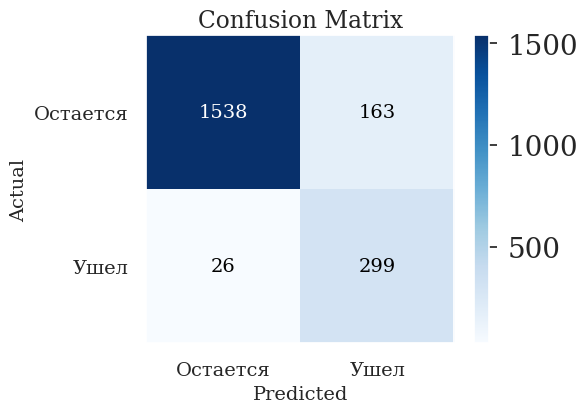

In [92]:
y_pred = dt.predict(X_test)
metrics_score(actual=y_test, predicted=y_pred)

Мы достигли значительного повышения recall на тестовых данных, с которыми модель не сталкивалась ранее. Однако есть небольшое переобучение в 2%, которое мы можем устранить с помощью **обрезки дерева по сложности**. Это метод, который позволяет контролировать размер дерева с помощью параметра **ccp_alpha**, который определяет меру стоимости-сложности дерева. Чем больше значение ccp_alpha, тем больше узлов обрезается. Это может немного увеличить ошибку на обучающих данных, но существенно снизить ошибку на тестовых данных, делая модель более адаптивной.


In [93]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

In [94]:
def evaluate_dt(mode_params):
    test_accuracies = []
    train_accuracies = []

    for ccp in mode_params:
        dt = DecisionTreeClassifier(
            criterion='log_loss',
            splitter='best',
            min_samples_leaf=40,
            min_samples_split=81,
            max_depth=22,
            ccp_alpha=ccp,
            class_weight='balanced',
            random_state=rand
        )

        dt.fit(X_train, y_train);

        # оцениваем обучающую выборку
        y_pred = dt.predict(X_train)
        train_accuracies.append(accuracy_score(y_train, y_pred))

        # оцениваем тестовую выборку
        y_pred_test = dt.predict(X_test)
        test_accuracies.append(accuracy_score(y_test, y_pred_test))

    return(test_accuracies, train_accuracies)  

In [95]:
test_accuracies, train_accuracies = evaluate_dt(ccp_alphas)

df_score = pd.DataFrame(
    {
        "test_accuracies": test_accuracies, 
        "train_accuracies": train_accuracies
    },
    index=ccp_alphas
)

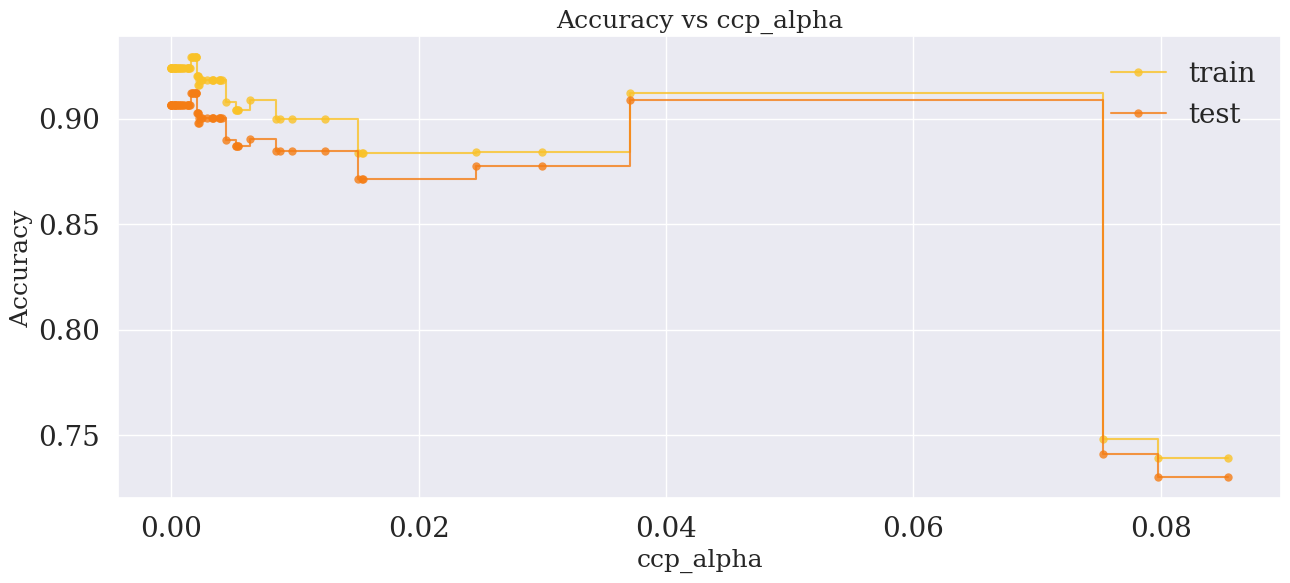

In [96]:
plt.figure(figsize=(15, 6))
plt.xlabel("ccp_alpha")
plt.ylabel("Аccuracy")
plt.title("Accuracy vs ccp_alpha")
plt.plot(ccp_alphas, train_accuracies, marker='o', label="train", drawstyle="steps-post", alpha=0.8)
plt.plot(ccp_alphas, test_accuracies, marker='o', label="test", drawstyle="steps-post", alpha=0.8)
plt.legend()
plt.show();

In [97]:
best_index = np.argmin(df_score['train_accuracies'] - df_score['test_accuracies'])
df_score.iloc[best_index]

test_accuracies    0.9087
train_accuracies   0.9120
Name: 0.03710044555831912, dtype: float64

Мы все еще страдаем от переобучения, но разница между обучающим и тестовым наборами данных сократилась до 0.01%, это дает существенный эффект но модель до этого не очень сильно переобучалась (3%). К тому же, общая точность модели уменьшилась на 8%. Возможно, эта обрезка не подходит для нашей задачи и мы можем оставить модель без нее. Поэтому оставляем все как есть

### Сравним результаты дерева и логистической регресии 

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1701
           1       0.65      0.92      0.76       325

    accuracy                           0.91      2026
   macro avg       0.82      0.91      0.85      2026
weighted avg       0.93      0.91      0.91      2026



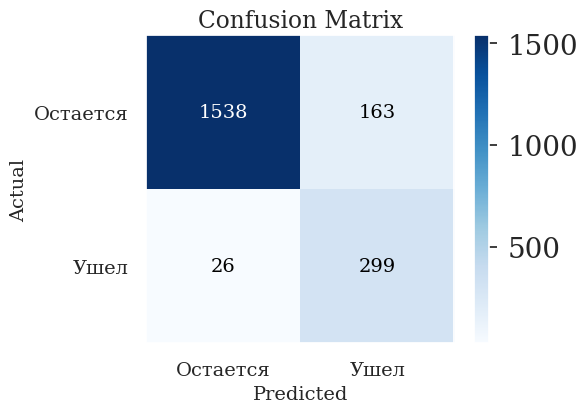

In [98]:
# DecisionTreeClassifier
metrics_score(actual=y_test, predicted=y_pred)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.78      0.55      0.65       325

    accuracy                           0.90      2026
   macro avg       0.85      0.76      0.79      2026
weighted avg       0.90      0.90      0.90      2026



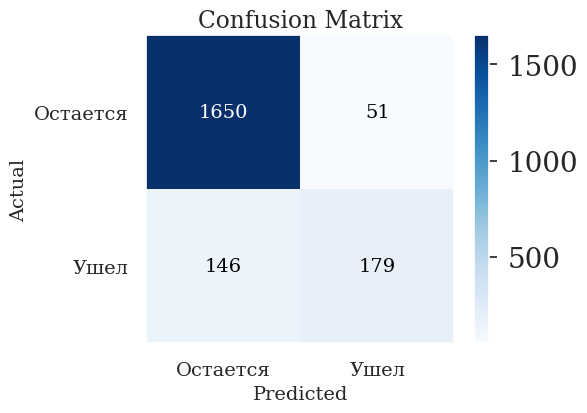

In [99]:
# LogisticRegression
metrics_score(actual=y_test, predicted=y_cal_pred)

как видим на тестовых данных результата сильно большого в плане точности мы не получили, зато существенно улучшили нашу ключевую метрику **Recall**  
`0.61 --> 0.91`

### Feature importances и Permutation feature importance

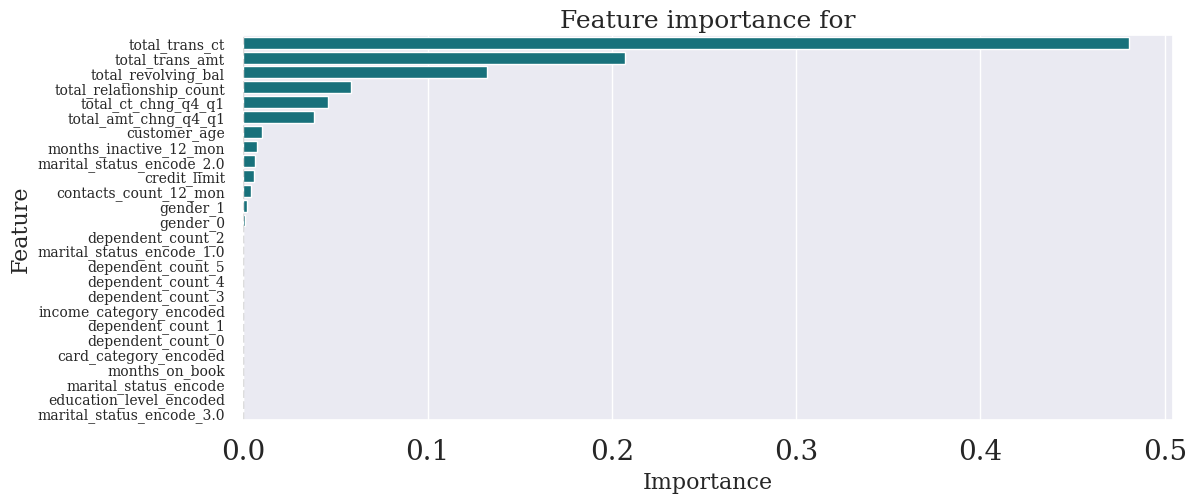

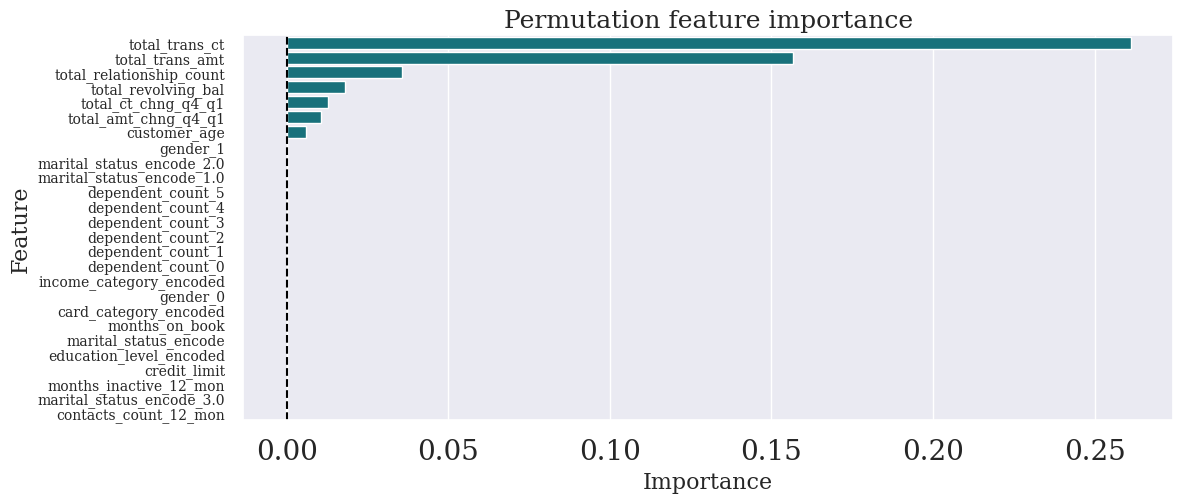

In [100]:
feature_names = dt.feature_names_in_
feature_importance = dt.feature_importances_

# Создаем датафрейм с важностью признаков и их названиями
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

plt.figure(figsize=(12, 5)) 
sns.barplot(data=importance_df, x='importance', y='feature', order=importance_df.sort_values('importance', ascending=False)['feature'], color='#087E8B')
plt.title('Feature importance for')
plt.yticks(fontsize=10)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature', fontsize=16) 
plt.axvline(x=0, color='black', linestyle='--') 
plt.show()

result = permutation_importance(dt, X_test, y_test, n_repeats=10, random_state=rand)

# Создаем датафрейм с перестановочной важностью признаков и их названиями
permutation_df = pd.DataFrame({'feature': feature_names, 'importance': result.importances_mean})

plt.figure(figsize=(12, 5)) 
sns.barplot(data=permutation_df, x='importance', y='feature', order=permutation_df.sort_values('importance', ascending=False)['feature'], color='#087E8B') 
plt.title('Permutation feature importance')
plt.yticks(fontsize=10)
plt.xlabel('Importance', fontsize=16) 
plt.ylabel('Feature', fontsize=16) 
plt.axvline(x=0, color='black', linestyle='--')
plt.show();

Итак, Total_Trans_Ct - самый важный признак, за которым следуют Total_Revolving_Bal и Total_Trans_Amt, что вполне логично. Клиенты, которые совершают больше транзакций с банком, имеют меньший шанс ухода.

---
на самом деле тяжело интерпретировать Feature importances и Permutation feature importance потому что:

- Они не учитывают взаимодействия между признаками, а только их индивидуальный вклад в модель. Это может привести к тому, что признаки, которые сами по себе не информативны, но в комбинации с другими признаками дают хороший результат, будут иметь низкую важность.
- Они не отражают влияние признаков на конкретные предсказания модели, а только на средний результат по всей выборке. Это может привести к тому, что признаки, которые важны для некоторых групп объектов или для решения определенных задач, будут иметь низкую важность.

## Наша цель не только повысить recall, но и улучшить общую производительность нашей модели
### Для этого мы будем использовать градиентный бустинг

In [101]:
train_pool = Pool(data=X_train_set, label=y_train_set)
val_pool = Pool(data=X_val, label=y_val) 
test_pool = Pool(data=X_test, label=y_test)

### Обучим базовый бустинг 

In [102]:
base_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.05,
    custom_loss=[metrics.AUC(), metrics.Accuracy()],
    random_seed=rand,
    early_stopping_rounds=20,
    logging_level='Silent',
    train_dir = "base_model"
)
base_model.fit(
    train_pool,
    eval_set=val_pool,
    plot=False
);

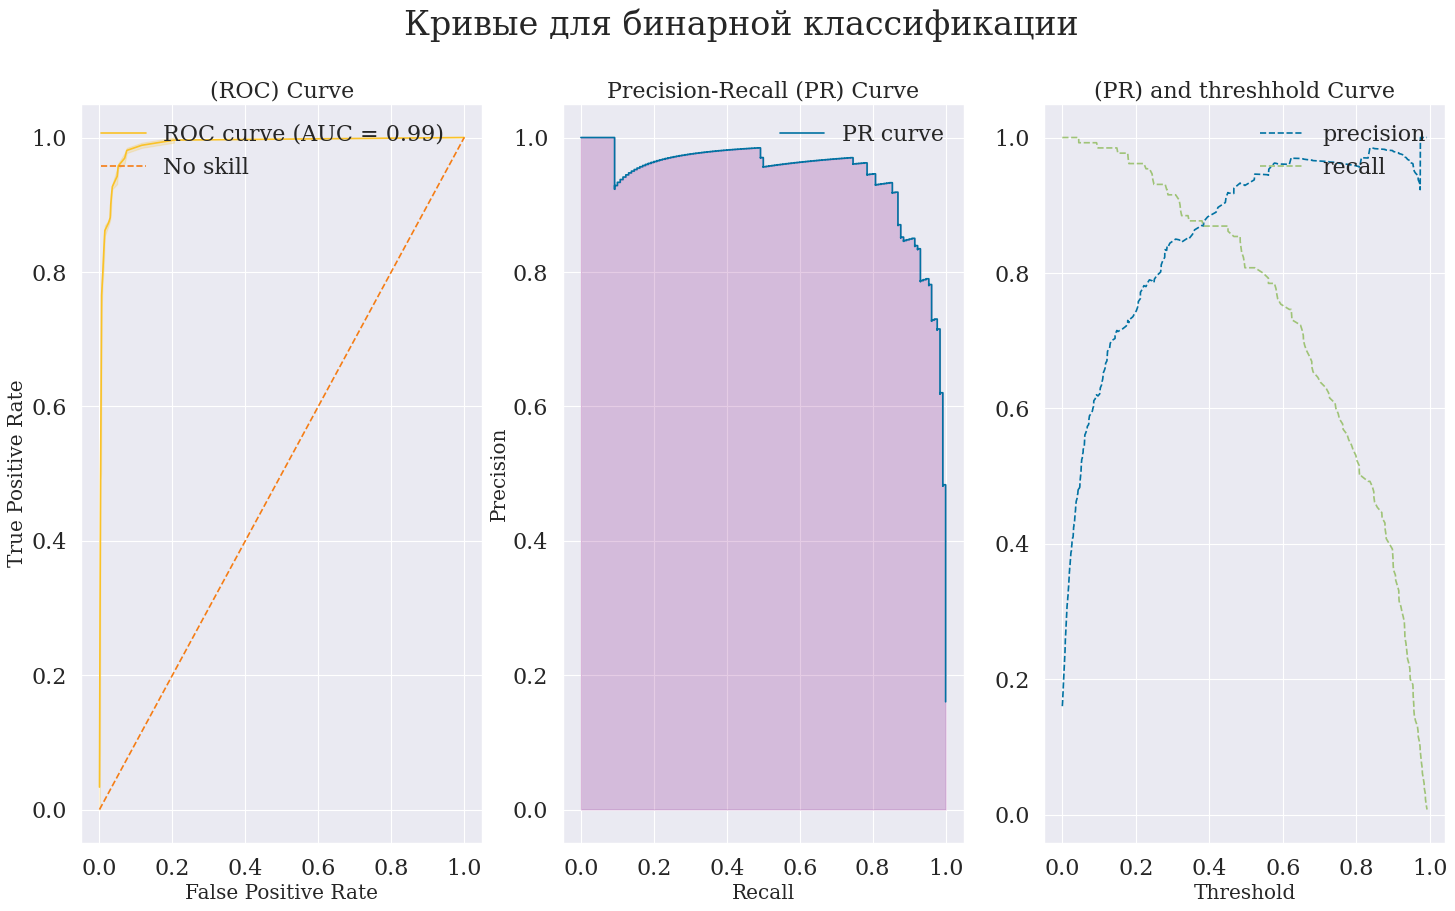

In [103]:
y_pred = base_model.predict(val_pool)
y_pred_proba = base_model.predict_proba(val_pool)
plot_curves(y_true=val_pool.get_label(), y_score=y_pred_proba[:, 1])

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       681
           1       0.94      0.81      0.87       130

    accuracy                           0.96       811
   macro avg       0.95      0.90      0.92       811
weighted avg       0.96      0.96      0.96       811



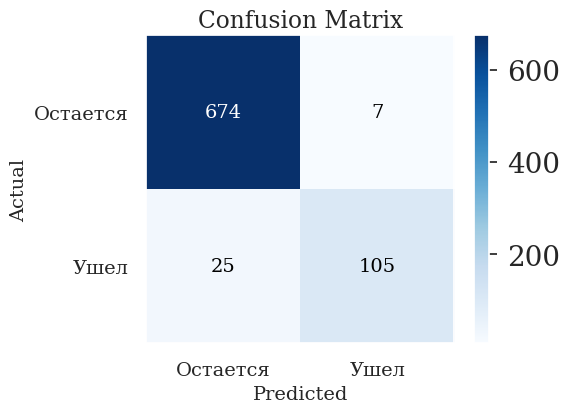

In [104]:
metrics_score(actual=val_pool.get_label(), predicted=y_pred)

Также проведем независимую оценку нашей модели при помощи кросс-валидации (cross validation). Кросс-валидация — это метод оценки качества модели, при котором данные разбиваются на несколько частей, и модель обучается и тестируется на разных комбинациях этих частей. Таким образом, мы можем получить более надежную оценку того, как модель будет работать на новых данных, которые она не видела при обучении. дели при помощи Cross validation

In [105]:
cv_params = base_model.get_params()
cv_params.update({
    'loss_function': metrics.Logloss()
})

cv_data = cv(
    pool=val_pool, # Валидационный сет 
    fold_count=10,
    seed=rand,
    params=cv_params,
    shuffle=True,
    stratified=True,
    plot=False
)

In [106]:
cv_data.tail()

iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
95          95             0.1653            0.0275              0.0701   
96          96             0.1648            0.0276              0.0694   
97          97             0.1645            0.0274              0.0685   
98          98             0.1638            0.0274              0.0676   
99          99             0.1634            0.0278              0.0667   

    train-Logloss-std  test-AUC-mean  test-AUC-std  test-Accuracy-mean  \
95             0.0015         0.9751        0.0199              0.9309   
96             0.0014         0.9749        0.0200              0.9309   
97             0.0016         0.9751        0.0198              0.9309   
98             0.0015         0.9752        0.0195              0.9309   
99             0.0014         0.9759        0.0190              0.9309   

    test-Accuracy-std  train-Accuracy-mean  train-Accuracy-std  
95             0.0187               0.9942              0.0019  
96             0.0187               0.9944              0.0016  
97             0.0187               0.9945              0.0018  
98             0.0187               0.9945              0.0018  
99             0.0187               0.9947              0.0020

In [107]:
print('Лучшая оценка на валидации: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-AUC-mean']),
    cv_data['test-AUC-std'][np.argmax(cv_data['test-AUC-mean'])],
    np.argmax(cv_data['test-AUC-mean'])
    )
)

Лучшая оценка на валидации: 0.98±0.02 on step 99


Напомню, что любая метрика (в том числе ROC-AUC) – это случайная величина (или иначе, статистика), которая зависит от выборки, на которой мы её считаем. В данном случае, выборкой являются пользователи, которые включены в нашу тестовую выборку. Время идёт, их признаки меняются, меняются и клиенты. Завтра это будут другие клиенты с другими признаками – и ROC-AUC будет другим. 

In [108]:
def roc_auc_ci(
    classifier: ClassifierMixin,
    X: np.ndarray,
    y: np.ndarray,
    conf: float = 0.95,
    n_bootstraps: int = 10000,
) -> Tuple[float, float]:
    """
    Вычисляет доверительный интервал для AUC с помощью бутстрепа.

    Args:
    ----------
        classifier : ClassifierMixin
            Обученная модель классификации.
        X : np.ndarray
            Признаки для тестового набора данных.
        y : np.ndarray
            Истинные метки классов для тестового набора данных.
        conf : float, optional
            Уровень доверия для доверительного интервала. По умолчанию 0.95.
        n_bootstraps : int, optional
            Количество бутстреп-подвыборок. По умолчанию 10000.

    Return:
    -------
        Tuple[float, float]
            Нижняя и верхняя границы доверительного интервала для AUC.
    """
    
    # Лушая оценка
    auc = roc_auc_score(y, classifier.predict_proba(X)[:, 1])
    bootstrapped_aucs = []
    
    for _ in range(n_bootstraps):
        idx = resample(range(len(y)), replace=True, random_state=None)
        X_boot = X[idx]
        y_boot = y[idx]
        bootstrapped_aucs.append(roc_auc_score(y_boot, classifier.predict_proba(X_boot)[:, 1]))
        
    # Преобразуем список в массив numpy для удобства
    bootstrapped_aucs = np.array(bootstrapped_aucs)
    
    # Границы доверительного интервала
    alpha = 1 - conf
    lower = np.quantile(bootstrapped_aucs, alpha / 2)
    upper = np.quantile(bootstrapped_aucs, 1 - alpha / 2)

    return lower, upper



In [109]:
roc_auc_ci(base_model, X=val_pool.get_features(), y=val_pool.get_label())

(0.9833157554546942, 0.9946702957890432)

Optuna — это алгоритм SOTA для тонкой настройки моделей машинного обучения и глубокого обучения. Это зависит от байесовской техники тонкой настройки. Он отсекает бесперспективные испытания, которые еще больше не улучшают наш результат, и пробует только ту комбинацию, которая улучшает наш результат в целом.

In [110]:
def objective(trial, eval_param='standart'):
    
    param = {
        'iterations': trial.suggest_int('iterations', 500, 4000),
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss', "CrossEntropy"]),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 10.0),
        'max_bin': trial.suggest_int('max_bin', 20, 500),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 2, 16),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 300),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS', 'No']),
        'grow_policy': trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
        'leaf_estimation_method': trial.suggest_categorical("leaf_estimation_method", ["Newton", "Gradient"]),
        
        'eval_metric': 'Accuracy'
    }
    
    # Создаем объект CatBoostClassifier с заданными параметрами
    model = CatBoostClassifier(**param, random_state=rand)  
    
    model.fit(
        X=train_pool, 
        eval_set=val_pool, 
        early_stopping_rounds=200,
        verbose=False
    )
    
    # Получаем предсказания модели и вычисляем метрику accuracy
    if eval_param == 'standart':
        preds = model.predict(val_pool)
        accuracy = accuracy_score(y_val, preds)
        
        return accuracy
    
    elif eval_param == 'cross_val':
        cv_params = model.get_params()
        cv_params.update({
            'loss_function': metrics.Logloss()
        })

        cv_data = cv(
            pool=val_pool, # Валидационный сет 
            fold_count=10,
            seed=rand,
            params=cv_params,
            shuffle=True,
            stratified=True,
            plot=False
        )
        
        return np.max(cv_data['test-Accuracy-mean'])

In [111]:
# Создаем объект study с именем "catboost_opt" и направлением "maximize"
study = optuna.create_study(study_name="tuning_model", direction="maximize", sampler=TPESampler())

# Запускаем оптимизацию с 100 испытаниями
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

In [112]:
print(study.best_value)


In [113]:
plot_optimization_history(study)




Это история лучшего результата, синяя точка - это результат одного испытания, а оранжевая линия показывает лучший результат.

In [114]:
plot_param_importances(study) 


Показывает важность гиперпараметров для оптимизации функции

In [115]:
plot_parallel_coordinate(study)


На графике можно наблюдать какие параметры модели получили максимальную точность на валидации

In [116]:
plot_slice(study)


 Высокие значения отмечены более темными точками они были подобраны уже под конец обучения

In [118]:
# передаем параметры полученые при отптимизации модели
tuning = base_model.get_params().copy()
tuning.update(study.best_params)
tuning['train_dir'] = "tuning_model"

tuning_model = CatBoostClassifier(
    **tuning, 
    logging_level='Silent',
    custom_loss=[metrics.AUC(), metrics.Accuracy()],
    random_state=rand
)

tuning_model.fit(  
    train_pool,
    eval_set=val_pool,
    plot=False
);


In [ ]:
MetricVisualizer(['base_model', "tuning_model"]).start()

 ### После подбора гипер параметров оценим получившуюся модель на невидимой ранее выборке 

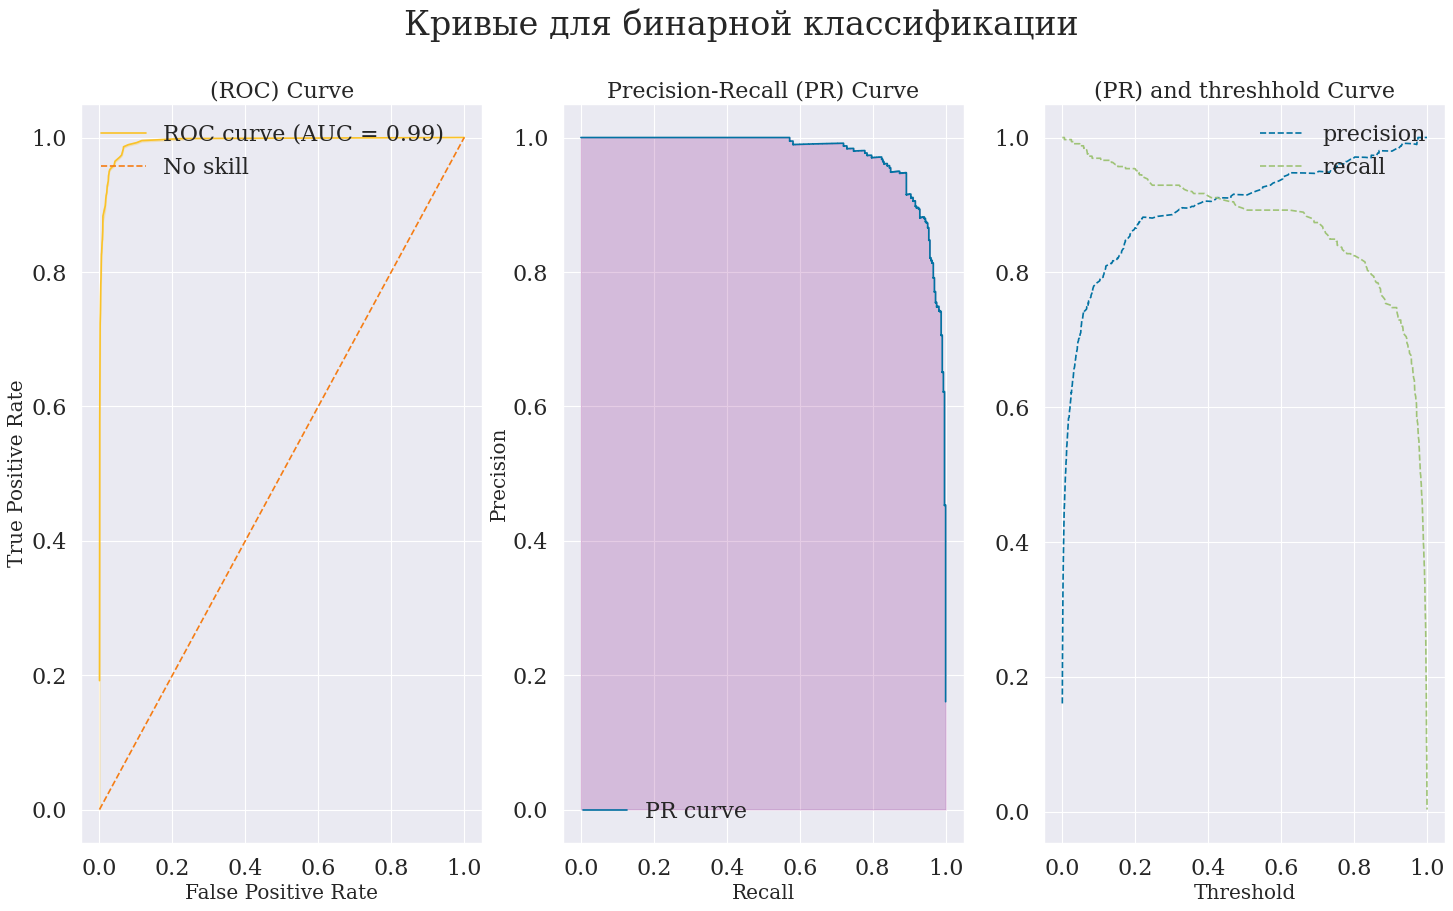

In [119]:
y_pred =  tuning_model.predict(test_pool)
y_pred_proba = tuning_model.predict_proba(test_pool)
plot_curves(y_true=test_pool.get_label(), y_score=y_pred_proba[:, 1])

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.91      0.89      0.90       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026



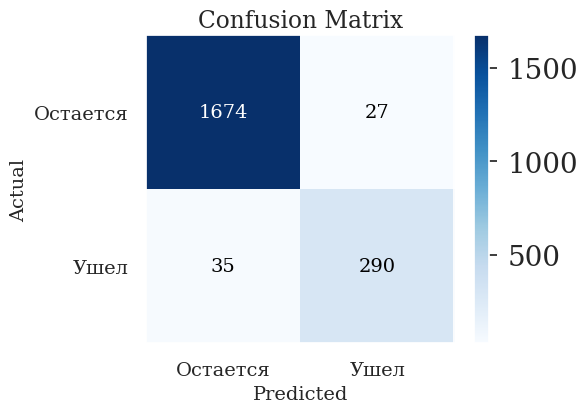

In [120]:
metrics_score(actual=test_pool.get_label(), predicted=y_pred)

   Модель хорошо обучилась и видим что на тестовом сете у нас даже выше показатель точности, чем на валидации

#### Немного страдает recall поэтому откалибруем модель для лучших пердсказаний

In [121]:
y_pred_test = tuning_model.predict(test_pool)
y_pred_proba_test = tuning_model.predict_proba(test_pool)

precision, recall, pr_thresholds = precision_recall_curve(test_pool.get_label(), y_pred_proba_test[:, 1])

for i in np.arange(len(pr_thresholds)):
    if precision[i] == recall[i]:
        print(f'Оптимальный порог принятия решения: {pr_thresholds[i]}')
        

Оптимальный порог принятия решения: 0.42385904234393834


### Поскольку наша цель - повысить recall, мы можем снизить порог классификации, чтобы уменьшить количество ложно отрицательных прогнозов, то есть уйдет ли от нас клиент или нет.

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1701
           1       0.87      0.95      0.91       325

    accuracy                           0.97      2026
   macro avg       0.93      0.96      0.94      2026
weighted avg       0.97      0.97      0.97      2026



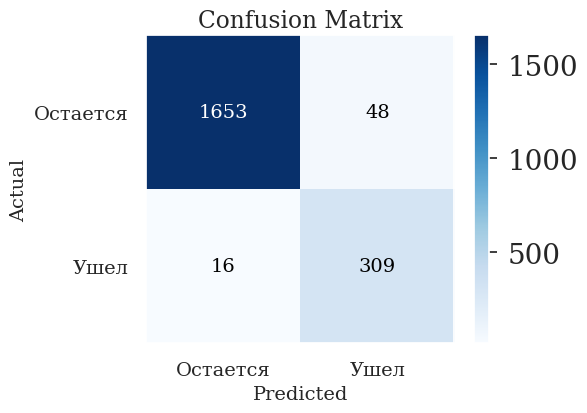

In [123]:
y_pred_proba = tuning_model.predict_proba(test_pool)
y_pred = (y_pred_proba[:, 1] > 0.2).astype(int)
metrics_score(actual=test_pool.get_label(), predicted=y_pred)


**Еще раз напомню, что любая метрика (в том числе ROC-AUC) – это случайная величина (или иначе, статистика), которая зависит от выборки, на которой мы её считаем. В данном случае, выборкой являются пользователи, которые включены в нашу тестовую выборку. Время идёт, их признаки меняются, меняются и клиенты. Завтра это будут другие клиенты с другими признаками – и ROC-AUC будет другим.** 

Поэтому так важно расчитать доверительный интервал для уверености нашей модели 

In [ ]:
roc_auc_ci(tuning_model, X=test_pool.get_features(), y=test_pool.get_label())

## Выводы по моделям 
Мы построили и сравнили три разных модели для нашей задачи классификации и улучшили их качество с помощью калибровки и подбора гиперпараметров. Наша первая модель - логистическая регрессия показала достаточно высокую точность (0.9), но низкий recall, то есть часто пропускала положительные объекты. После калибровки мы смогли повысить Recall и AUC

Мы подняли:
* Recall:
    `0.42 --> 0.59`
* AUC:
    `0.88 --> 0.93`
    
Наша вторая модель - дерево решений - показала еще более высокую точность (0.92) и recall (0.86), но после калибровки recall увеличился только до 0.92, что означает, что дерево не очень хорошо калибруется. 
Мы подняли:
* Recall:
    `0.86 --> 0.92`


Наша третья модель - градиентный бустинг показала наилучший результат с точностью около 0.97 и recall 0.95 на тестовых данных. Кроме того, AUC этой модели составил 0.99, что свидетельствует о ее высокой способности разделять классы. Таким образом, мы продемонстрировали, как можно использовать разные модели и методы для улучшения прогнозов в задаче классификации.
Мы подняли:
* Recall:
    `0.82 --> 0.95`
* AUC:
    `0.98 --> 0.99`

## Перейдем к интерпритации градиентного бустинга ведь нам нужно получить стратегии и рекомендациии для бизнеса

### SHAP 

In [124]:
explainer = shap.Explainer(tuning_model, seed=rand, feature_names=test_pool.get_feature_names())
shap_values = explainer(test_pool.get_features(), y=test_pool.get_label())
shap.initjs()

#### Waterfall - эта диаграмма позволит нам визуализировать индивидуальные SHAP-значения каждого образца в наборе данных.

8.87093384975598e-05


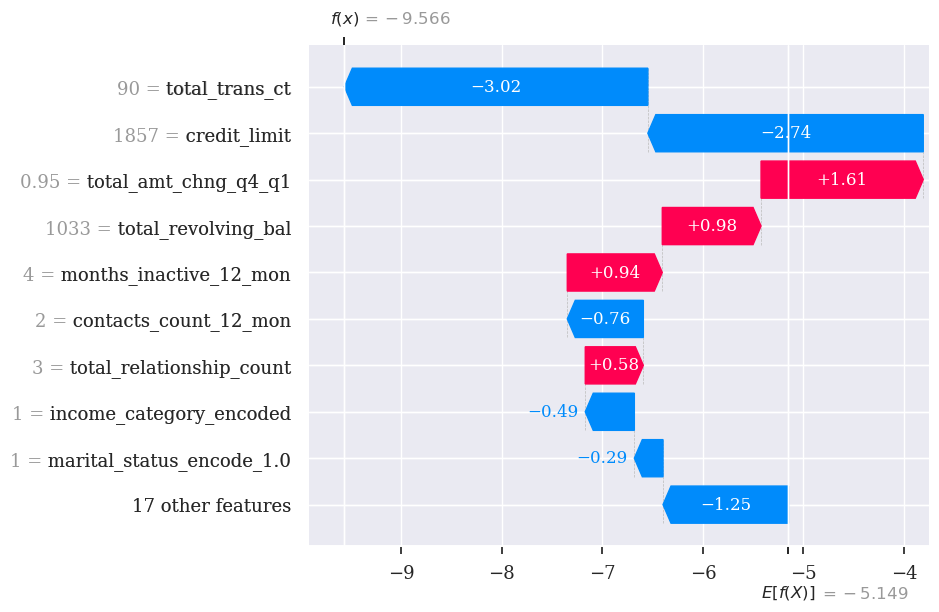

In [133]:
y_pred = tuning_model.predict_proba(test_pool.get_features())[:, 1]
print(y_pred[0])
shap.plots.waterfall(shap_values[0])

- Данный клиент имеет высокую вероятность принадлежности к 0 классу, потому что он часто пользуется своей кредитной картой для небольших покупок, имеет низкий кредитный лимит и относится к категории "семейный человек".

- Самый важный признак для определения принадлежности к 0 классу - это количество транзакций в этом году, потому что он имеет самый большой положительный вклад в прогноз модели.

- Самый незначительный признак для определения принадлежности к 0 классу - это доходная категория клиента, потому что он имеет самый маленький отрицательный вклад в прогноз модели.

#### Ещё один способ визуализации интересующих нас значений — это диаграмма типа shap.plots.force.
По сути это тот же waterfall, но уже стакнутый 

In [140]:
shap.plots.force(shap_values[4])

Рассмотри другого клиента: 

* на графике force видно, что клиент был недоволен обслуживанием в банке, потому что его проблема не была решена даже после 6 обращений. Он решил сменить банк.

#### Для того чтобы определить то, какие признаки, в целом, являются наиболее важными для прогнозов, выдаваемых моделью, можно использовать столбчатую диаграмму (shap.plots.bar), отражающую результаты усреднения SHAP‑значений по всем наблюдениям. Расчёт среднего на основании абсолютных значений показателей позволяет добиться того, чтобы положительные и отрицательные значения не уничтожали бы друг друга.

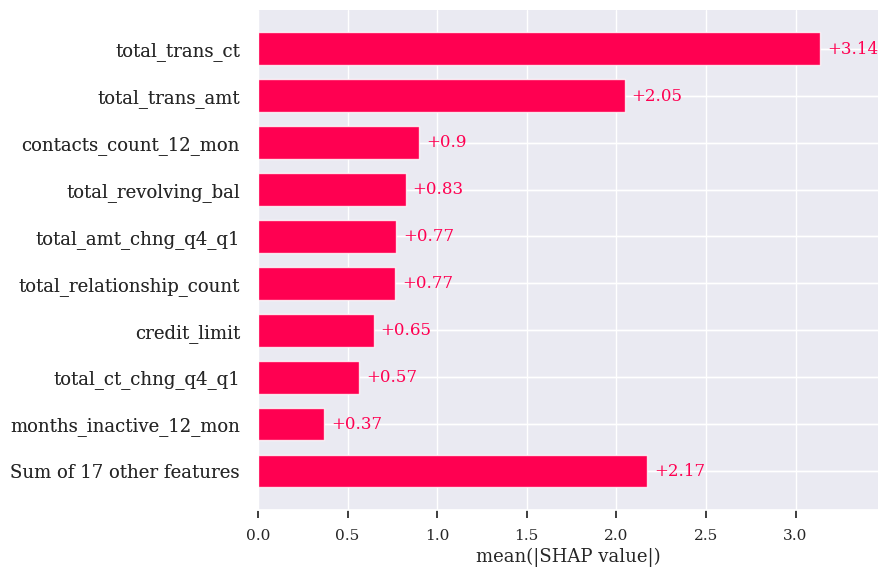

In [127]:
shap.plots.bar(shap_values)

Диаграмма bar plot из пакета SHAP демонстрирует, какой признак в среднем вносит наибольший вклад в прогноз модели. Например, признак total_trans_ct (Кол-во транзакций по карте в год) имеет самое большое среднее SHAP-значение, что означает, что он сильнее всего воздействует на прогнозы модели. Это поможет нам определить, какие признаки наиболее значимы для модели при принятии решений.

#### Диаграммa shap.plots.beeswarm является одним из способов визуализации SHAP-значений для модели. SHAP-значения показывают, как каждый признак влияет на прогноз модели для конкретного наблюдения. Диаграмма shap.plots.beeswarm отображает все SHAP-значения для каждого признака в виде точек, расположенных по оси x.

Эта диаграмма позволяет увидеть, какие признаки наиболее важны для модели в среднем и для отдельных наблюдений, а также какие значения признаков увеличивают или уменьшают прогноз модели. Поэтому эта диаграмма является одним из самых мощных инструментов для анализа black box моделей

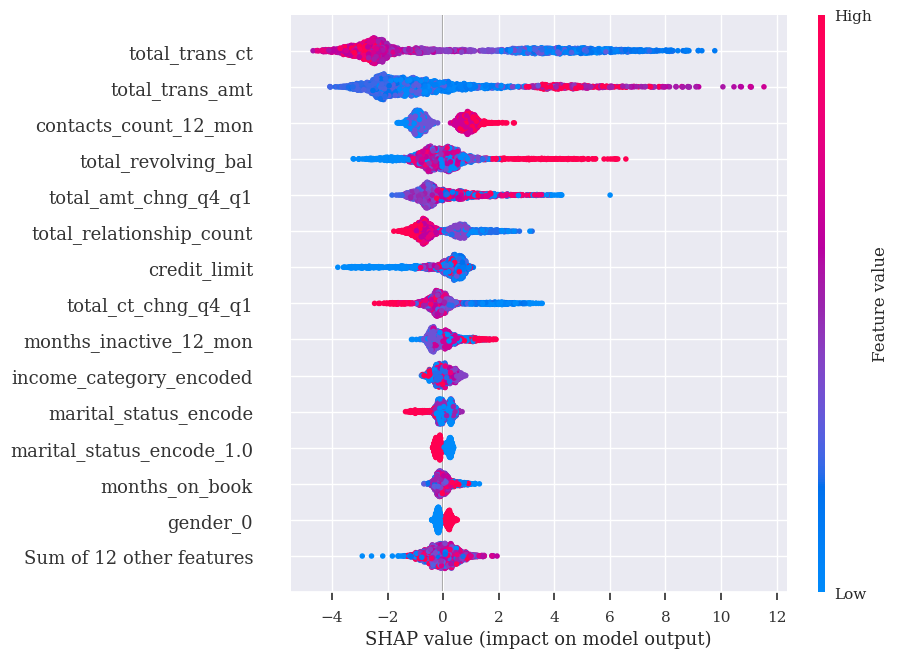

In [142]:
shap.plots.beeswarm(shap_values, max_display=15)

Диаграмма shap.plots.beeswarm позволяет сравнить, какие признаки и их значения определяют принадлежность к первому или второму классу. Например:
- По признаку total_trans_ct можно заметить, что малое количество транзакций в этом году повышает вероятность ухода клиента из банка, а большое количество транзакций - понижает.

- Также по признаку contacts_count_12_mon можно заметить, что частые обращения в банк увеличивают вероятность ухода клиента.

- А по признаку total_relationship_count можно заметить, что большое количество продуктов банка у клиента понижает вероятность ухода.


В целом видно что модель хорошо и достоточно объективно оценивает отток клиентов из банка, модель также позволяет выявить, какие признаки наиболее важны для прогнозирования оттока клиентов из банка, и какие значения этих признаков способствуют удержанию или уходу клиентов. Это может помочь банку определить, какие аспекты своего обслуживания и продуктов нужно улучшить или изменить, чтобы повысить лояльность и удовлетворенность клиентов. Например, банк может предложить клиентам с низким кредитным лимитом или малым количеством транзакций в этом году специальные условия или бонусы за использование кредитной карты. Также банк может снизить количество обращений в банк, предоставляя клиентам более удобные и доступные каналы связи и решения их проблем. А еще банк может стимулировать клиентов пользоваться большим количеством продуктов банка, предлагая им персонализированные рекомендации и скидки.

## Рекомендации

* Мы смогли построить прогностическую модель:

  а) этот банк может внедрить эту модель для выявления клиентов, которые подвержены риску оттока средств.
  
  б) которые банк может использовать для выявления ключевых причин, приводящих к истощению. 
  
  в) исходя из того, какой банк может предпринять соответствующие действия для построения более эффективной политики удержания клиентов.
  
 ---

* Факторы, определяющие уход клиента - total_trans_ct, total_revolving_bal, total_trans_amt, total_relationship_count, contacts_count_12_mon

* total_trans_ct: Меньшее количество транзакций в год приводит к оттоку клиентов - для увеличения использования карт банк может предоставлять такие предложения, как кэшбэк, специальные скидки на покупку чего-либо и т.д., чтобы клиенты чувствовали мотивацию пользоваться своими картами.

* total_revolving_bal: Высокие значения признака Total_Revolving_Bal могут свидетельствовать о том, что клиенты неудовлетворены своими кредитными картами и хотят избавиться от долга и процентов. Такие клиенты могут искать другие способы финансирования или другие банки, которые предлагают лучшие условия или бонусы. Таким образом, низкие значения total_revolving_bal могут свидетельствовать о том, что клиенты удовлетворены своими кредитными картами и не склонны к оттоку из банка. Однако это не значит, что банк не должен предлагать своим клиентам с низкими значениями total_revolving_bal какие-то стимулы или бонусы за использование кредитных карт. Например, банк может предложить таким клиентам повысить их кредитный лимит или дать им скидку на определенные товары или услуги. Это может помочь банку увеличить лояльность и активность своих клиентов.

* total_trans_amt: Меньшее количество транзакций может привести к уменьшению суммы транзакции и, в конечном итоге, к оттоку клиентов - Банк может предоставлять предложения по покупке более дорогих товаров, что, в свою очередь, принесет пользу как клиентам, так и банку.

* total_relationship_count: показывает, сколько продуктов банка использует клиент. Чем меньше продуктов, тем больше вероятность, что клиент уйдет из банка. Банк может попытаться удержать таких клиентов, предлагая им персонализированные рекомендации и скидки на другие продукты, которые могут быть полезны для них.

* contacts_count_12_mon: Наибольший отток наблюдается среди клиентов, которые больше всего взаимодействовали с банком, это указывает на то, что банк не в состоянии решить проблемы, с которыми сталкиваются клиенты, приводящие к оттоку - может быть настроена система сбора отзывов, чтобы проверить, удовлетворены ли клиенты предоставленным решением, если нет, банк должен действовать в соответствии с этим соответствующим образом.

* Также видно, что женщины более лояльны к банку, чем мужчины, потому что они совершают больше и больших по сумме транзакций по кредитным картам. Это может означать, что женщины больше доверяют банку и его продуктам, или что они больше нуждаются в кредитном финансировании. Банк может использовать эту информацию, чтобы разработать специальные предложения или маркетинговые кампании, направленные на женскую аудиторию. Вдальнейшем эту гипотезу лучше проверить


